In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime
import ast
import time
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
plt.style.use('ggplot')

# Άνοιγμα του ΝεαΔημοκρατια_Doc

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
Nd_df =pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/nea-dimokratia.tsv", sep='\t')
Nd_df

Unnamed: 0                                              Title  \
0              0  Μια ανασκόπηση όσων διαδραματίστηκαν την εβδομ...   
1              1                Ασκήσεις μικροπολιτικής ετοιμότητος   
2              2  "Μύλος": ΔΑΠ διαψεύδει ΔΑΠ Νομικής για την ανα...   
3              3  Το ρίσκο Μητσοτάκη και νέα σενάρια ανασχηματισμού   
4              4  ΔΑΠ κατά Κεραμέως για τις φοιτητικές εκλογές: ...   
...          ...                                                ...   
1955        1955  Η επικοινωνιακή "τριάδα" του Μητσοτάκη και το ...   
1956        1956  Η ακτινογραφία της κυβέρνησης Μητσοτάκη: Τεχνο...   
1957        1957  Τα νέα πρόσωπα στις κοινοβουλευτικές ομάδες τη...   
1958        1958  Συγχαρητήριο μήνυμα State Department στη νέα κ...   
1959        1959  Γιώργος Ζαββός, ο νέος Υφυπουργός αρμόδιος για...   

                   Datetime  \
0     09 Ιουλίου 2022 08:17   
1     08 Ιουλίου 2022 11:54   
2     08 Ιουλίου 2022 09:41   
3     08 Ιουλίου 2022 06:15   
4     07 Ιουλίου 2022 22:01   
...                     ...   
1955  09 Ιουλίου 2019 07:17   
1956  09 Ιουλίου 2019 07:11   
1957  08 Ιουλίου 2019 23:34   
1958  08 Ιουλίου 2019 22:16   
1959  08 Ιουλίου 2019 21:15   

                                                   Href  \
0     https://www.news247.gr/politiki/mia-anaskopisi...   
1     https://www.news247.gr/gnomes/giannhs-trianths...   
2     https://www.news247.gr/paideia/mylos-dap-diaps...   
3     https://www.news247.gr/politiki/to-risko-mitso...   
4     https://www.news247.gr/politiki/dap-kata-keram...   
...                                                 ...   
1955  https://www.news247.gr/politiki/to-epikoinonia...   
1956  https://www.news247.gr/politiki/i-aktinografia...   
1957  https://www.news247.gr/ekloges/nea-prosopa-koi...   
1958  https://www.news247.gr/politiki/sygcharitirio-...   
1959  https://www.news247.gr/politiki/giorgos-zavvos...   

                                               Leadtext                  Tag  \
0     Ποια καίρια ζητήματα έθιξαν τα κόμματα αυτή τη...                ΒΟΥΛΗ   
1     Δεν πείθει η επιχείρηση του πρωθυπουργού να συ...  ΚΥΡΙΑΚΟΣ ΜΗΤΣΟΤΑΚΗΣ   
2     Εμφύλιος στην φοιτητική παράταξη της Νέας Δημο...       ΝΕΑ ΔΗΜΟΚΡΑΤΙΑ   
3     Ο πρωθυπουργός χθες "έκαψε" ουσιαστικά τις πρό...  ΚΥΡΙΑΚΟΣ ΜΗΤΣΟΤΑΚΗΣ   
4     Δριμεία επίθεση ΔΑΠ-ΝΔΦΚ Νομικής Αθηνών κατά τ...       ΝΕΑ ΔΗΜΟΚΡΑΤΙΑ   
...                                                 ...                  ...   
1955  Πέτσας, Ζούλας και Κάπη στην επικοινωνιακή ομά...       ΝΕΑ ΔΗΜΟΚΡΑΤΙΑ   
1956  Είκοσι ένα εξωκοινοβουλευτικά μέλη έχει το νέο...         ΕΚΛΟΓΕΣ 2019   
1957  Στην κοινοβουλευτική ομάδα της ΝΔ ο αριθμός τω...                ΒΟΥΛΗ   
1958  "Θα συνεχίσουμε να εμβαθύνουμε τη συνεργασία μ...                  ΗΠΑ   
1959  Ο έμπειρος Γιώργος Ζαββός θα αναλάβει το δύσκο...       ΝΕΑ ΔΗΜΟΚΡΑΤΙΑ   

      Year    Month  Day   Time                 Date  
0     2022  Ιουλίου    9  08:17  2022-07-09 08:17:00  
1     2022  Ιουλίου    8  11:54  2022-07-08 11:54:00  
2     2022  Ιουλίου    8  09:41  2022-07-08 09:41:00  
3     2022  Ιουλίου    8  06:15  2022-07-08 06:15:00  
4     2022  Ιουλίου    7  22:01  2022-07-07 22:01:00  
...    ...      ...  ...    ...                  ...  
1955  2019  Ιουλίου    9  07:17  2019-07-09 07:17:00  
1956  2019  Ιουλίου    9  07:11  2019-07-09 07:11:00  
1957  2019  Ιουλίου    8  23:34  2019-07-08 23:34:00  
1958  2019  Ιουλίου    8  22:16  2019-07-08 22:16:00  
1959  2019  Ιουλίου    8  21:15  2019-07-08 21:15:00  

[1960 rows x 11 columns]

In [4]:
Nd_df.dtypes

Unnamed: 0     int64
Title         object
Datetime      object
Href          object
Leadtext      object
Tag           object
Year           int64
Month         object
Day            int64
Time          object
Date          object
dtype: object

In [5]:
#Nd.dtypes

In [6]:
# Nd_df['Year'] = Nd_df.Datetime.apply(lambda dt: dt.split(' ')[2])
# Nd_df['Month'] = Nd_df.Datetime.apply(lambda dt: dt.split(' ')[1])
# Nd_df['Day'] = Nd_df.Datetime.apply(lambda dt: dt.split(' ')[0])
# Nd_df['Time'] = Nd_df.Datetime.apply(lambda dt: dt.split(' ')[3])

# months = {
#     'Ιανουαρίου' : '01',
#     'Φεβρουαρίου' : '02', 
#     'Μαρτίου' : '03',
#     'Απριλίου' : '04',
#     'Μαΐου' : '05',
#     'Ιουνίου': '06',
#     'Ιουλίου' : '07',
#     'Αυγούστου' : '08',
#     'Σεπτεμβρίου' : '09',
#     'Οκτωβρίου' : '10',
#     'Νοεμβρίου' : '11',
#     'Δεκεμβρίου' : '12',
     
# }

# Nd_df['Date'] = Nd_df.apply(lambda row: f'{months[row.Month]}/{row.Day}/{row.Year} {row.Time}', axis='columns',result_type='expand')
# Nd_df['Date'] = pd.to_datetime(Nd_df['Date'])


# Nd_df

In [7]:
#Nd_df.dtypes

In [8]:
Nd_df = Nd_df.rename(columns= {'Tag': 'Keywords', 'Leadtext': 'text'})
Nd_df

Unnamed: 0                                              Title  \
0              0  Μια ανασκόπηση όσων διαδραματίστηκαν την εβδομ...   
1              1                Ασκήσεις μικροπολιτικής ετοιμότητος   
2              2  "Μύλος": ΔΑΠ διαψεύδει ΔΑΠ Νομικής για την ανα...   
3              3  Το ρίσκο Μητσοτάκη και νέα σενάρια ανασχηματισμού   
4              4  ΔΑΠ κατά Κεραμέως για τις φοιτητικές εκλογές: ...   
...          ...                                                ...   
1955        1955  Η επικοινωνιακή "τριάδα" του Μητσοτάκη και το ...   
1956        1956  Η ακτινογραφία της κυβέρνησης Μητσοτάκη: Τεχνο...   
1957        1957  Τα νέα πρόσωπα στις κοινοβουλευτικές ομάδες τη...   
1958        1958  Συγχαρητήριο μήνυμα State Department στη νέα κ...   
1959        1959  Γιώργος Ζαββός, ο νέος Υφυπουργός αρμόδιος για...   

                   Datetime  \
0     09 Ιουλίου 2022 08:17   
1     08 Ιουλίου 2022 11:54   
2     08 Ιουλίου 2022 09:41   
3     08 Ιουλίου 2022 06:15   
4     07 Ιουλίου 2022 22:01   
...                     ...   
1955  09 Ιουλίου 2019 07:17   
1956  09 Ιουλίου 2019 07:11   
1957  08 Ιουλίου 2019 23:34   
1958  08 Ιουλίου 2019 22:16   
1959  08 Ιουλίου 2019 21:15   

                                                   Href  \
0     https://www.news247.gr/politiki/mia-anaskopisi...   
1     https://www.news247.gr/gnomes/giannhs-trianths...   
2     https://www.news247.gr/paideia/mylos-dap-diaps...   
3     https://www.news247.gr/politiki/to-risko-mitso...   
4     https://www.news247.gr/politiki/dap-kata-keram...   
...                                                 ...   
1955  https://www.news247.gr/politiki/to-epikoinonia...   
1956  https://www.news247.gr/politiki/i-aktinografia...   
1957  https://www.news247.gr/ekloges/nea-prosopa-koi...   
1958  https://www.news247.gr/politiki/sygcharitirio-...   
1959  https://www.news247.gr/politiki/giorgos-zavvos...   

                                                   text             Keywords  \
0     Ποια καίρια ζητήματα έθιξαν τα κόμματα αυτή τη...                ΒΟΥΛΗ   
1     Δεν πείθει η επιχείρηση του πρωθυπουργού να συ...  ΚΥΡΙΑΚΟΣ ΜΗΤΣΟΤΑΚΗΣ   
2     Εμφύλιος στην φοιτητική παράταξη της Νέας Δημο...       ΝΕΑ ΔΗΜΟΚΡΑΤΙΑ   
3     Ο πρωθυπουργός χθες "έκαψε" ουσιαστικά τις πρό...  ΚΥΡΙΑΚΟΣ ΜΗΤΣΟΤΑΚΗΣ   
4     Δριμεία επίθεση ΔΑΠ-ΝΔΦΚ Νομικής Αθηνών κατά τ...       ΝΕΑ ΔΗΜΟΚΡΑΤΙΑ   
...                                                 ...                  ...   
1955  Πέτσας, Ζούλας και Κάπη στην επικοινωνιακή ομά...       ΝΕΑ ΔΗΜΟΚΡΑΤΙΑ   
1956  Είκοσι ένα εξωκοινοβουλευτικά μέλη έχει το νέο...         ΕΚΛΟΓΕΣ 2019   
1957  Στην κοινοβουλευτική ομάδα της ΝΔ ο αριθμός τω...                ΒΟΥΛΗ   
1958  "Θα συνεχίσουμε να εμβαθύνουμε τη συνεργασία μ...                  ΗΠΑ   
1959  Ο έμπειρος Γιώργος Ζαββός θα αναλάβει το δύσκο...       ΝΕΑ ΔΗΜΟΚΡΑΤΙΑ   

      Year    Month  Day   Time                 Date  
0     2022  Ιουλίου    9  08:17  2022-07-09 08:17:00  
1     2022  Ιουλίου    8  11:54  2022-07-08 11:54:00  
2     2022  Ιουλίου    8  09:41  2022-07-08 09:41:00  
3     2022  Ιουλίου    8  06:15  2022-07-08 06:15:00  
4     2022  Ιουλίου    7  22:01  2022-07-07 22:01:00  
...    ...      ...  ...    ...                  ...  
1955  2019  Ιουλίου    9  07:17  2019-07-09 07:17:00  
1956  2019  Ιουλίου    9  07:11  2019-07-09 07:11:00  
1957  2019  Ιουλίου    8  23:34  2019-07-08 23:34:00  
1958  2019  Ιουλίου    8  22:16  2019-07-08 22:16:00  
1959  2019  Ιουλίου    8  21:15  2019-07-08 21:15:00  

[1960 rows x 11 columns]

In [9]:
ΝΕΑ	= Nd_df[Nd_df['Keywords']=='ΝΕΑ ΔΗΜΟΚΡΑΤΙΑ']
ΝΕΑ	

Unnamed: 0                                              Title  \
2              2  "Μύλος": ΔΑΠ διαψεύδει ΔΑΠ Νομικής για την ανα...   
4              4  ΔΑΠ κατά Κεραμέως για τις φοιτητικές εκλογές: ...   
10            10     Γιατί ο Μητσοτάκης ποντάρει στη "χρονομηχανή"    
14            14  Άννα Ροκοφύλλου: Υποψήφια με τη ΝΔ στην Α' Αθήνας   
22            22  ΝΔ: "Δεν ξεχνάμε" - Βίντεο για τα 7 χρόνια από...   
...          ...                                                ...   
1949        1949  Θεοδωρικάκος: Καμία απόλυση στο Δημόσιο - Όσα ...   
1951        1951  Τσιάρας για Ποινικό Κώδικα: Άμεση αλλαγή σε άρ...   
1954        1954     Υπουργική "αποσυγκέντρωση" για αγώνα ταχύτητας   
1955        1955  Η επικοινωνιακή "τριάδα" του Μητσοτάκη και το ...   
1959        1959  Γιώργος Ζαββός, ο νέος Υφυπουργός αρμόδιος για...   

                   Datetime  \
2     08 Ιουλίου 2022 09:41   
4     07 Ιουλίου 2022 22:01   
10    06 Ιουλίου 2022 06:10   
14    04 Ιουλίου 2022 17:59   
22    28 Ιουνίου 2022 23:51   
...                     ...   
1949  09 Ιουλίου 2019 14:01   
1951  09 Ιουλίου 2019 10:41   
1954  09 Ιουλίου 2019 07:21   
1955  09 Ιουλίου 2019 07:17   
1959  08 Ιουλίου 2019 21:15   

                                                   Href  \
2     https://www.news247.gr/paideia/mylos-dap-diaps...   
4     https://www.news247.gr/politiki/dap-kata-keram...   
10    https://www.news247.gr/politiki/giati-o-mitsot...   
14    https://www.news247.gr/politiki/anna-rokofyllo...   
22    https://www.news247.gr/politiki/nd-den-xechnam...   
...                                                 ...   
1949  https://www.news247.gr/politiki/theodorikakos-...   
1951  https://www.news247.gr/politiki/tsiaras-poinik...   
1954  https://www.news247.gr/gnomes/ellh-triantafull...   
1955  https://www.news247.gr/politiki/to-epikoinonia...   
1959  https://www.news247.gr/politiki/giorgos-zavvos...   

                                                   text        Keywords  Year  \
2     Εμφύλιος στην φοιτητική παράταξη της Νέας Δημο...  ΝΕΑ ΔΗΜΟΚΡΑΤΙΑ  2022   
4     Δριμεία επίθεση ΔΑΠ-ΝΔΦΚ Νομικής Αθηνών κατά τ...  ΝΕΑ ΔΗΜΟΚΡΑΤΙΑ  2022   
10    Ο πρωθυπουργός επιστρέφει την πολιτική αντιπαρ...  ΝΕΑ ΔΗΜΟΚΡΑΤΙΑ  2022   
14    Υποψήφια με την ΝΔ στην Α' Αθηνών θα είναι η δ...  ΝΕΑ ΔΗΜΟΚΡΑΤΙΑ  2022   
22    Πρωτοσέλιδα του Τύπου και δηλώσεις των Τσίπρα,...  ΝΕΑ ΔΗΜΟΚΡΑΤΙΑ  2022   
...                                                 ...             ...   ...   
1949  Ολοκληρώθηκε η τελευτή παράδοσης - παραλαβής σ...  ΝΕΑ ΔΗΜΟΚΡΑΤΙΑ  2019   
1951  Ο νέος υπουργός Δικαιοσύνης μίλησε για τους στ...  ΝΕΑ ΔΗΜΟΚΡΑΤΙΑ  2019   
1954  Τα 21 από τα 51 στελέχη της νέας κυβέρνησης, δ...  ΝΕΑ ΔΗΜΟΚΡΑΤΙΑ  2019   
1955  Πέτσας, Ζούλας και Κάπη στην επικοινωνιακή ομά...  ΝΕΑ ΔΗΜΟΚΡΑΤΙΑ  2019   
1959  Ο έμπειρος Γιώργος Ζαββός θα αναλάβει το δύσκο...  ΝΕΑ ΔΗΜΟΚΡΑΤΙΑ  2019   

        Month  Day   Time                 Date  
2     Ιουλίου    8  09:41  2022-07-08 09:41:00  
4     Ιουλίου    7  22:01  2022-07-07 22:01:00  
10    Ιουλίου    6  06:10  2022-07-06 06:10:00  
14    Ιουλίου    4  17:59  2022-07-04 17:59:00  
22    Ιουνίου   28  23:51  2022-06-28 23:51:00  
...       ...  ...    ...                  ...  
1949  Ιουλίου    9  14:01  2019-07-09 14:01:00  
1951  Ιουλίου    9  10:41  2019-07-09 10:41:00  
1954  Ιουλίου    9  07:21  2019-07-09 07:21:00  
1955  Ιουλίου    9  07:17  2019-07-09 07:17:00  
1959  Ιουλίου    8  21:15  2019-07-08 21:15:00  

[415 rows x 11 columns]

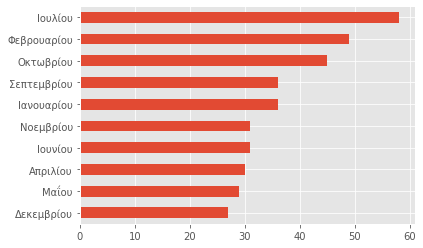

In [10]:
ΝΕΑ['Month'].value_counts().head(10).sort_values().plot(kind='barh')

In [11]:
Nd_df['text'] = Nd_df ['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


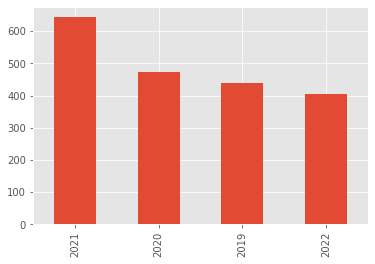

In [12]:
Nd_df['Year'].value_counts().plot(kind='bar')

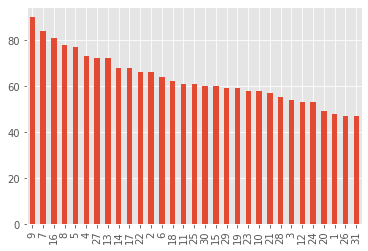

In [13]:
Nd_df['Day'].value_counts().plot(kind='bar')

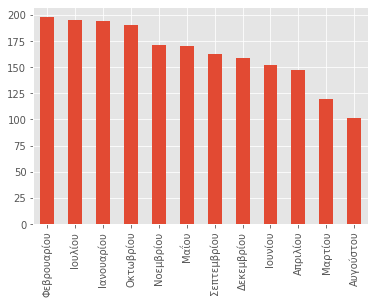

In [14]:

Nd_df['Month'].value_counts().plot(kind='bar')


In [15]:
Keywords_data = Nd_df.groupby(['Keywords']).count()['Title'].sort_values(ascending=False)


day_data = Nd_df.groupby(['Day']).count()['Keywords']
(day_data,Keywords_data)

(Day
 1     48
 2     66
 3     54
 4     73
 5     77
 6     64
 7     84
 8     78
 9     90
 10    58
 11    61
 12    53
 13    72
 14    68
 15    60
 16    81
 17    68
 18    62
 19    59
 20    49
 21    57
 22    66
 23    58
 24    53
 25    61
 26    47
 27    72
 28    55
 29    59
 30    60
 31    47
 Name: Keywords, dtype: int64, Keywords
 ΝΕΑ ΔΗΜΟΚΡΑΤΙΑ            415
 ΚΥΡΙΑΚΟΣ ΜΗΤΣΟΤΑΚΗΣ       237
 ΣΥ.ΡΙΖ.Α.                 180
 ΒΟΥΛΗ                     143
 ΚΥΒΕΡΝΗΣΗ                  75
                          ... 
 ΜΑΡΓΑΡΙΤΗΣ ΣΧΟΙΝΑΣ          1
 ΓΑΛΛΙΑ                      1
 ΒΡΥΞΕΛΛΕΣ                   1
 ΜΕΣΑ ΜΑΖΙΚΗΣ ΜΕΤΑΦΟΡΑΣ      1
 ΑΥΤΟΔΙΟΙΚΗΣΗ                1
 Name: Title, Length: 259, dtype: int64)

In [16]:
Keywords_data.head(13)
keywords_data = Keywords_data.head(13)
keywords_data


Keywords
ΝΕΑ ΔΗΜΟΚΡΑΤΙΑ         415
ΚΥΡΙΑΚΟΣ ΜΗΤΣΟΤΑΚΗΣ    237
ΣΥ.ΡΙΖ.Α.              180
ΒΟΥΛΗ                  143
ΚΥΒΕΡΝΗΣΗ               75
ΚΟΡΟΝΟΪΟΣ               47
ΑΛΕΞΗΣ ΤΣΙΠΡΑΣ          44
ΚΙΝΗΜΑ ΑΛΛΑΓΗΣ          35
NOVARTIS                26
ΝΑΣΟΣ ΗΛΙΟΠΟΥΛΟΣ        23
Κ.Κ.Ε                   22
ΑΝΤΩΝΗΣ ΣΑΜΑΡΑΣ         18
ΑΔΩΝΙΣ ΓΕΩΡΓΙΑΔΗΣ       17
Name: Title, dtype: int64

In [17]:
day_data.head(31)
Day_data = day_data.head(31)
Day_data


Day
1     48
2     66
3     54
4     73
5     77
6     64
7     84
8     78
9     90
10    58
11    61
12    53
13    72
14    68
15    60
16    81
17    68
18    62
19    59
20    49
21    57
22    66
23    58
24    53
25    61
26    47
27    72
28    55
29    59
30    60
31    47
Name: Keywords, dtype: int64

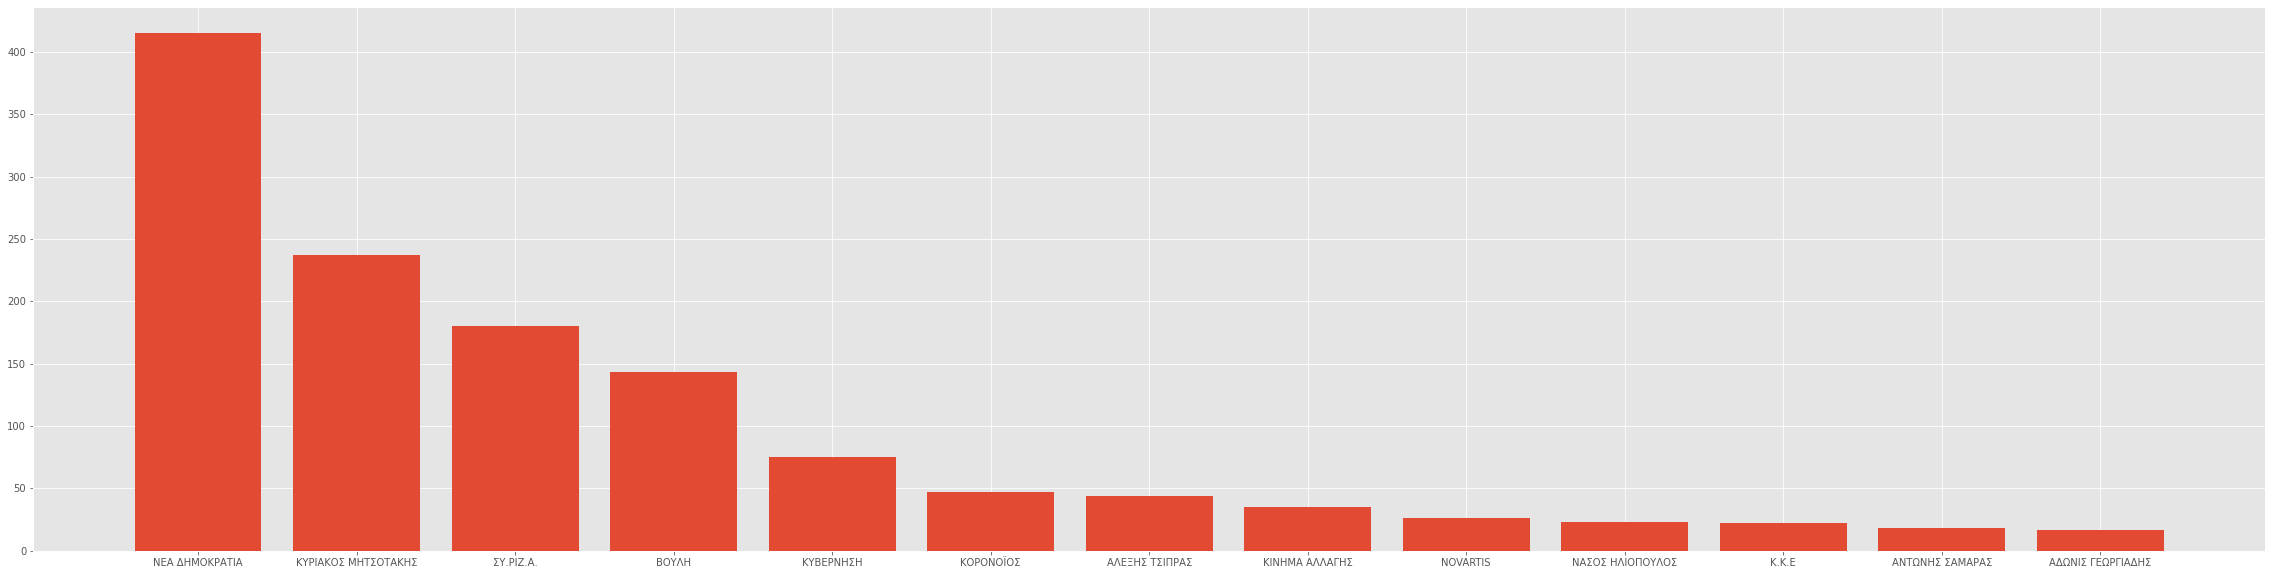

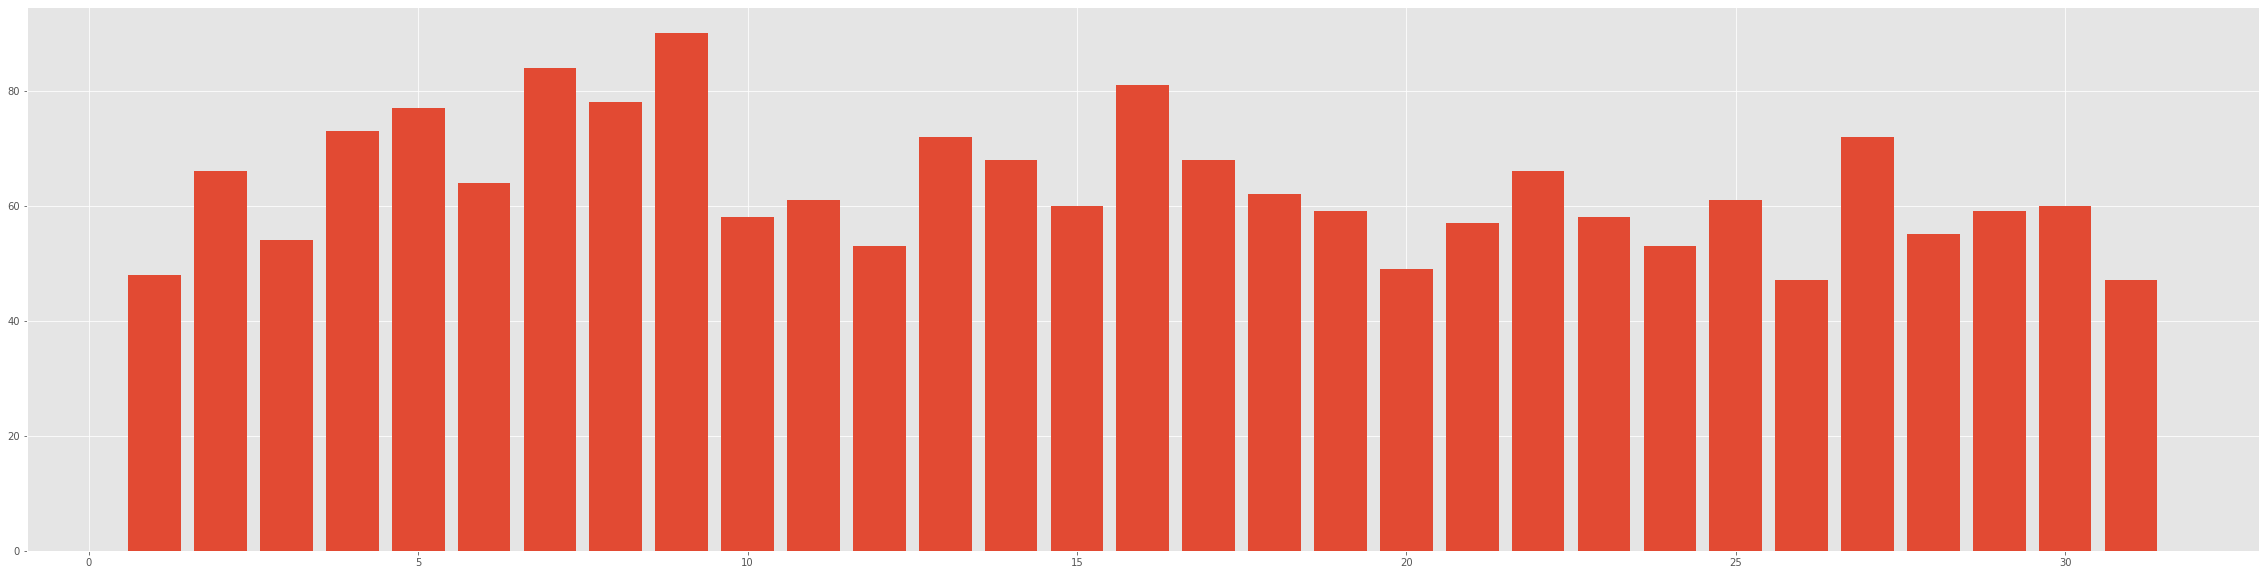

In [18]:
plt.figure(figsize=(40,10))
plt.bar(keywords_data.keys(),keywords_data,)
plt.show()

plt.figure(figsize=(40,10))
plt.bar(Day_data.keys(),Day_data,)
plt.show()

# Wordcloud Nea Dhmokratia

In [19]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter
from nltk.util import ngrams
import spacy
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [20]:
!python -m spacy download el_core_news_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.6 MB 4.2 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')


In [21]:
nlp = spacy.load('el_core_news_sm')
list(nlp.Defaults.stop_words)[0:20]

['αντίς',
 'προτού',
 'ετέρων',
 'τούτης',
 'πριν',
 'δικός',
 'μόνους',
 'δια',
 'όλες',
 'τάχατε',
 'έκανε',
 'οποιασδήποτε',
 'ποιοί',
 'έτερους',
 'κοντά',
 'τέτοια',
 'κάπου',
 'οσοιδήποτε',
 'ακόμη',
 'οποίες']

In [22]:
list(STOPWORDS)[0:20]

['who',
 'you',
 "who's",
 'which',
 'do',
 "can't",
 "hadn't",
 'both',
 'why',
 'i',
 'themselves',
 'am',
 'also',
 "won't",
 "we've",
 'himself',
 'yours',
 'herself',
 "couldn't",
 "he'd"]

In [23]:
text = Nd_df['text'].str.cat(sep = '.').replace('.','').strip()
text = text.replace('amp','').strip()
text = text.replace('rt','').strip()
text = text.replace('\n','').strip()
text = text.replace(':','').strip()
text

'Ποια καίρια ζητήματα έθιξαν τα κόμματα αυτή την εβδομάδα; Τι βρέθηκε στο επίκεντρο του πολιτικού ενδιαφέροντός τους;Δεν πείθει η επιχείρηση του πρωθυπουργού να συναρτήσει την εξάντληση της τετραετίας με την προσωπική του θεσμική συνέπειαΕμφύλιος στην φοιτητική παράταξη της Νέας Δημοκρατίας καθώς η ΔΑΠ διαχώρισε τη θέση της με τη ΔΑΠ Νομικής σχετικά με την ανακοίνωση εναντίον του νόμου Κεραμέως για τα Πανεπιστήμια Ο πρωθυπουργός χθες "έκαψε" ουσιαστικά τις πρόωρες εκλογές, αλλά ήδη έχει ξεκινήσει η φημολογία για αλλαγές στο κυβερνητικό σχήμαΔριμεία επίθεση ΔΑΠ-ΝΔΦΚ Νομικής Αθηνών κατά της υπουργού Παιδείας, Νίκης Κεραμέως αναφορικά με το ενιαίο ψηφοδέλτιο που προωθεί το νομοσχέδιο του υπουργείου για τα ΑΕΙΟ πρωθυπουργός δήλωσε ότι δεν ψάχνει δημοσκοπικό ξέφωτο για πρόωρες εκλογές, οι οποίες δήλωσε ότι δεν θα ήταν εθνικά υπεύθυνες με μία απρόβλεπτη Τουρκία απέναντι Γιατί ο πρωθυπουργός έβαλε φρένο χθες στη συζήτηση για πρόωρες εκλογές, εν μέσω νέων σεναρίων για αλλαγή του εκλογικού νόμο

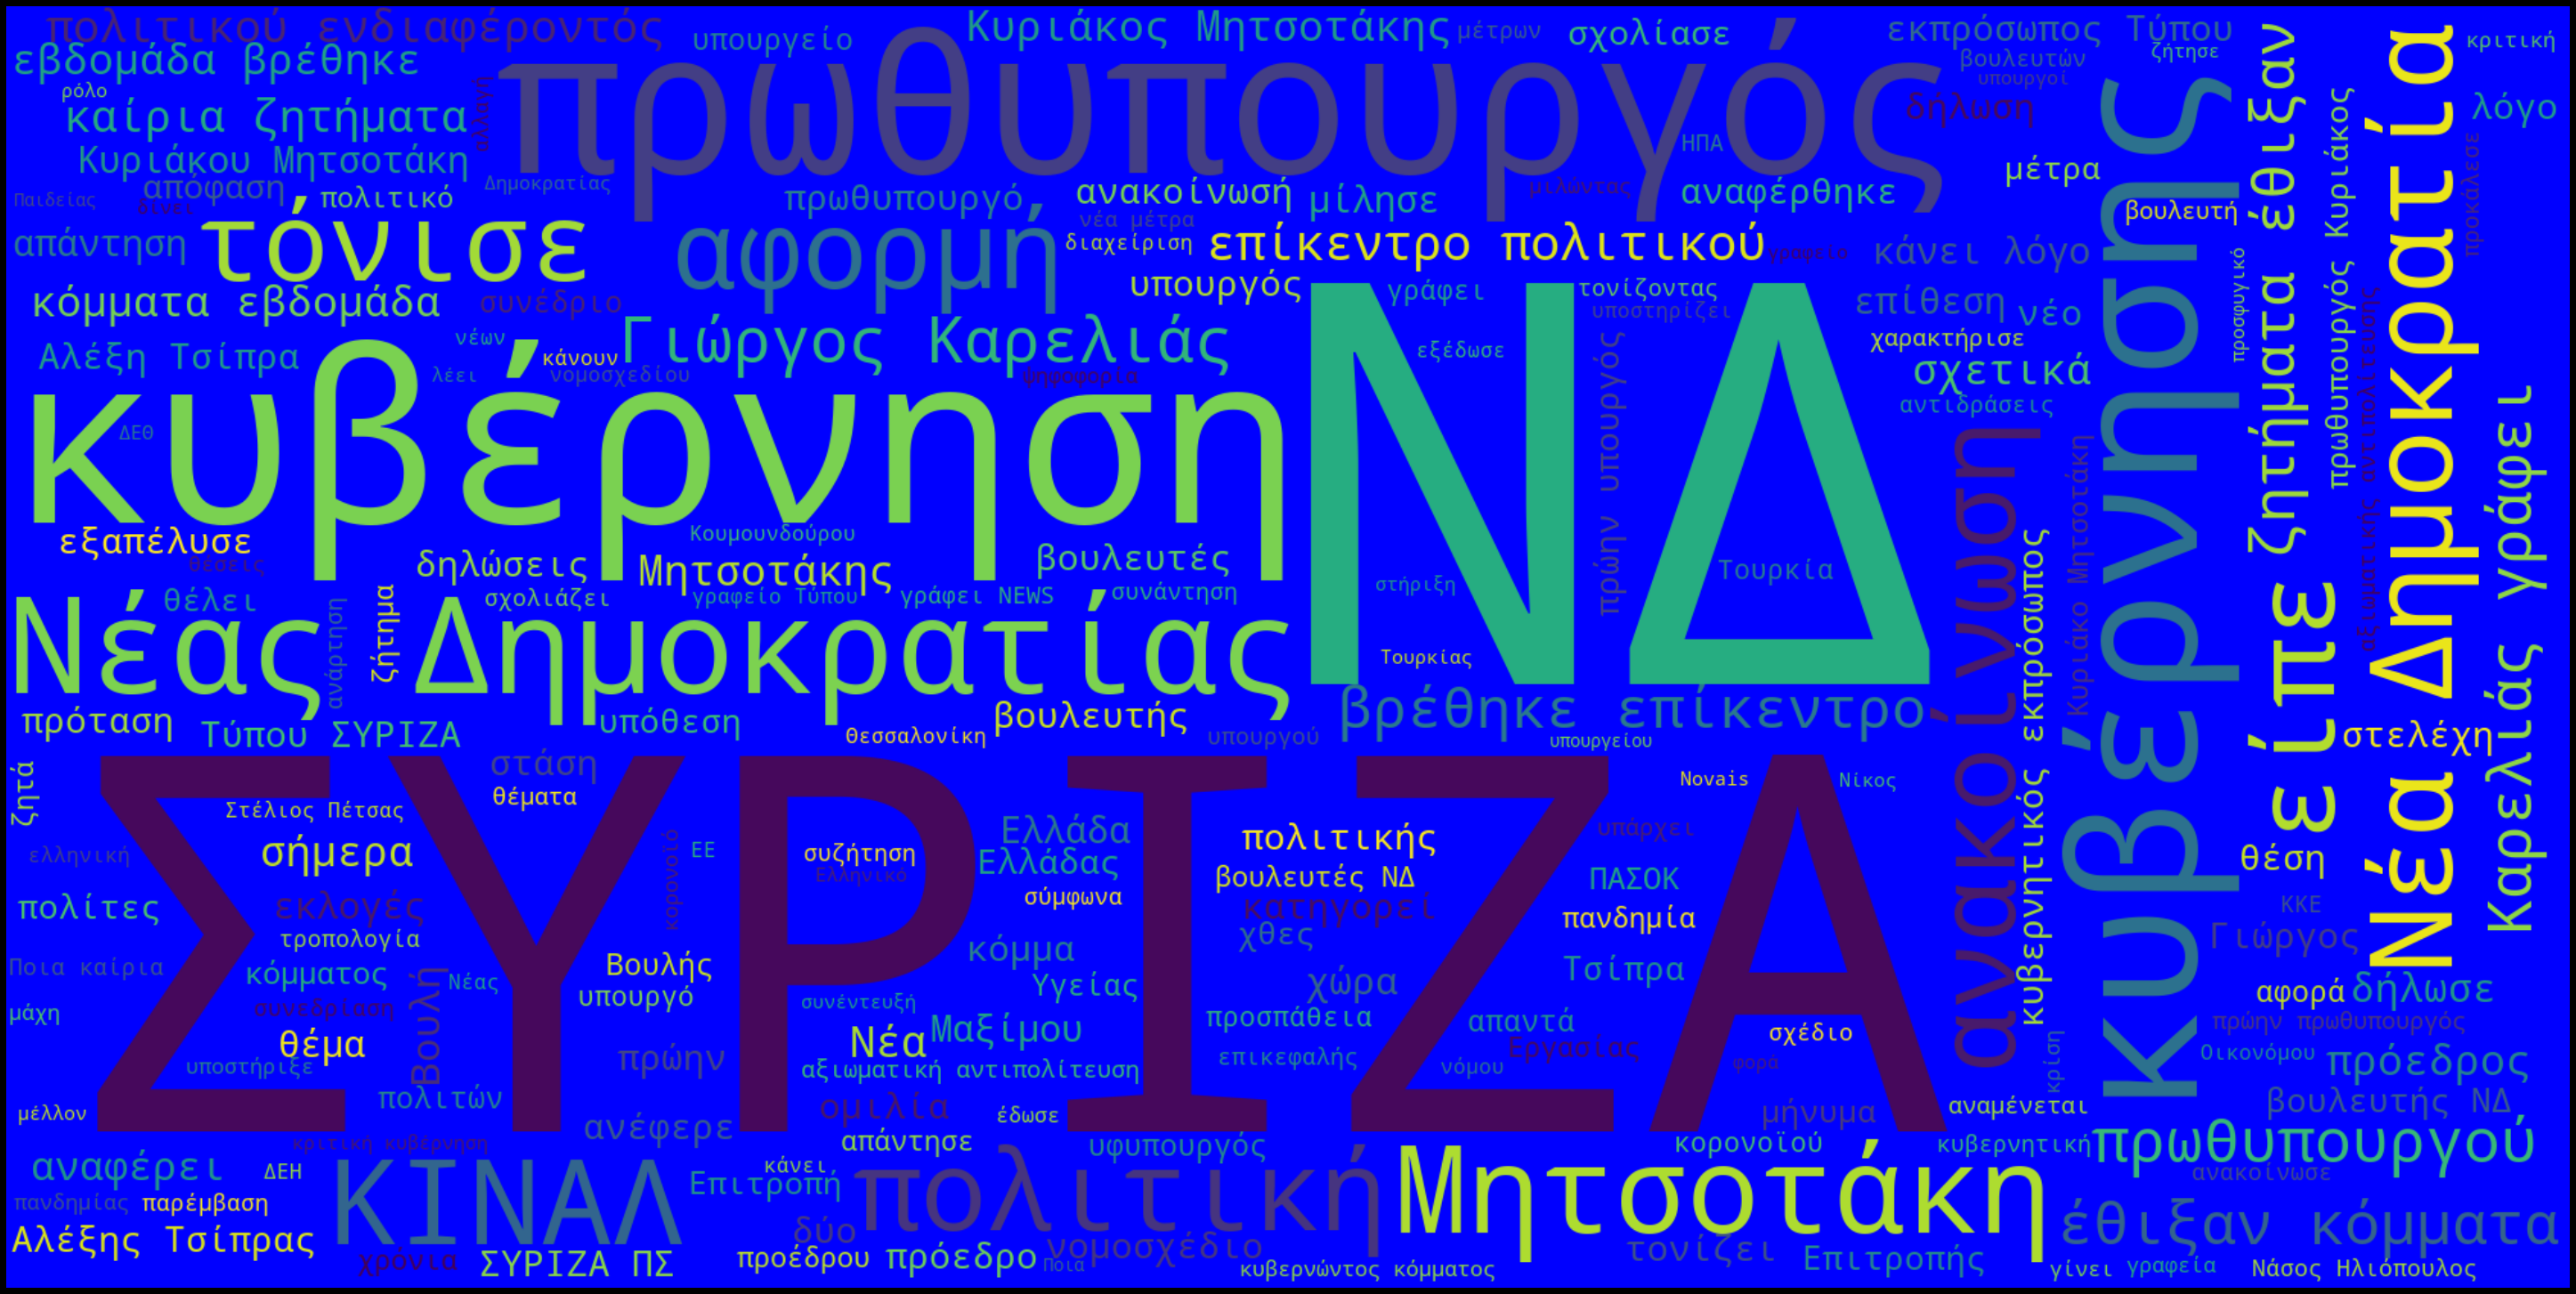

In [24]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'blue'
 ).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [25]:
word_count = Counter(" ".join(Nd_df["text"]).split())
word_count = {word.lower() : count for word, count in word_count.items() if not word.lower() in STOPWORDS}
word_count = pd.DataFrame(data={
    'word': word_count.keys(),
    'count': word_count.values()
})

word_count.sort_values('count',ascending=False).head(15)

word  count
13          του   1611
50            ο    822
114         των    475
19            η    302
213          νδ    283
338      συριζα    254
17          δεν    210
500        τους    196
75           το    137
128   μητσοτάκη    115
415    υπουργός    100
480         νέα     92
1327    γιώργος     92
48          για     89
879        λόγο     86

In [26]:
from collections import Counter
Counter(" ".join(Nd_df["text"]).split()).most_common(50)

[('του', 1611),
 ('της', 1538),
 ('και', 1474),
 ('για', 1219),
 ('την', 1119),
 ('το', 921),
 ('ο', 822),
 ('με', 705),
 ('η', 690),
 ('να', 602),
 ('που', 523),
 ('τον', 492),
 ('στο', 477),
 ('των', 475),
 ('στην', 463),
 ('τη', 463),
 ('από', 461),
 ('Ο', 417),
 ('τα', 405),
 ('σε', 381),
 ('τις', 326),
 ('θα', 305),
 ('Η', 302),
 ('ΝΔ', 283),
 ('ότι', 278),
 ('στη', 264),
 ('ΣΥΡΙΖΑ', 254),
 ('κυβέρνηση', 214),
 ('δεν', 210),
 ('οι', 197),
 ('τους', 196),
 ('είναι', 187),
 ('πρωθυπουργός', 165),
 ('κατά', 164),
 ('Τι', 147),
 ('στον', 143),
 ('στα', 142),
 ('Το', 137),
 ('αλλά', 122),
 ('Νέας', 117),
 ('Μητσοτάκη', 115),
 ('στις', 113),
 ('γράφει', 113),
 ('πρώην', 113),
 ('υπουργός', 100),
 ('κυβέρνησης', 99),
 ('Νέα', 92),
 ('Γιώργος', 92),
 ('έχει', 91),
 ('πως', 90)]

In [27]:
for word in nlp.Defaults.stop_words:
  print(word)
  break

αντίς


In [28]:
Nd_df['text_no_stopwords'] = Nd_df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (nlp.Defaults.stop_words) and word != ':' and word != '\n' and word != "amp" and word != 'rt' and word != ',']))
Nd_df['text_no_stopwords'] = Nd_df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (nlp.Defaults.stop_words)]))
Nd_df['clean_text_no_stopwords'] = Nd_df['text']
#for stopword in nlp.Defaults.stop_words:
Nd_df['clean_text_no_stopwords'] = Nd_df['clean_text_no_stopwords'].apply(lambda x: ' '.join([word for word in x.split() if word not in nlp.Defaults.stop_words and word != "ή" and word != "ία" and word != "κι"]))
Nd_df['clean_text_no_stopwords'] = Nd_df['clean_text_no_stopwords'].apply(lambda x: x.replace("amp", "").strip())
Nd_df['clean_text_no_stopwords'] = Nd_df['clean_text_no_stopwords'].apply(lambda x: x.replace("rt", "").strip())
Nd_df['clean_text_no_stopwords'] = Nd_df['clean_text_no_stopwords'].apply(lambda x: x.replace(":", "").strip())
Nd_df['clean_text_no_stopwords'] = Nd_df['clean_text_no_stopwords'].apply(lambda x: x.replace(",", "").strip())
Nd_df['clean_text_no_stopwords'] = Nd_df['clean_text_no_stopwords'].apply(lambda x: x.replace("\n", "").strip())
Nd_df['clean_text_no_stopwords'] = Nd_df['clean_text_no_stopwords'].apply(lambda x: x.replace(".", "").strip())

In [29]:
freq = Counter(" ".join(Nd_df["clean_text_no_stopwords"]).split()).most_common(16)
freq

[('ΝΔ', 443),
 ('Ο', 417),
 ('ΣΥΡΙΖΑ', 387),
 ('Η', 303),
 ('κυβέρνηση', 258),
 ('πρωθυπουργός', 203),
 ('Μητσοτάκη', 159),
 ('Τι', 147),
 ('Το', 137),
 ('Δημοκρατίας', 136),
 ('κυβέρνησης', 128),
 ('Νέας', 117),
 ('Μητσοτάκης', 114),
 ('γράφει', 113),
 ('πρώην', 113),
 ('υπουργός', 106)]

In [30]:
import numpy as np


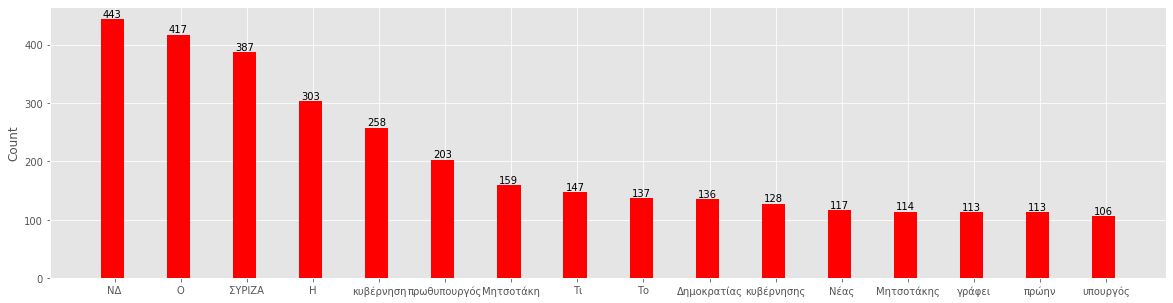

In [31]:
names, values = zip(*freq)
# names = [x[0] for x in data]  # These two lines are equivalent to the the zip-command.
# values = [x[1] for x in data] # These two lines are equivalent to the the zip-command.

ind = np.arange(len(freq))  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots(figsize=(20,5))
rects1 = ax.bar(ind, values, width, color='r')
# add some text for labels, title and axes ticks
ax.set_ylabel('Count')
ax.set_xticks(ind+width/10.)
ax.set_xticklabels(names)

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)

plt.show()

In [32]:
Nd_df['Date'] = pd.to_datetime(Nd_df['Date'])
Nd_df.resample(rule='D',on='Date').count()

Unnamed: 0  Title  Datetime  Href  text  Keywords  Year  Month  \
Date                                                                         
2019-07-08           3      3         3     3     3         3     3      3   
2019-07-09          23     23        23    23    23        23    23     23   
2019-07-10           2      2         2     2     2         2     2      2   
2019-07-11           2      2         2     2     2         2     2      2   
2019-07-12           5      5         5     5     5         5     5      5   
...                ...    ...       ...   ...   ...       ...   ...    ...   
2022-07-06           4      4         4     4     4         4     4      4   
2022-07-07           3      3         3     3     3         3     3      3   
2022-07-08           3      3         3     3     3         3     3      3   
2022-07-09           1      1         1     1     1         1     1      1   
2022-07-10           3      3         2     3     3         3     3      3   

            Day  Time  Date  text_no_stopwords  clean_text_no_stopwords  
Date                                                                     
2019-07-08    3     3     3                  3                        3  
2019-07-09   23    23    23                 23                       23  
2019-07-10    2     2     2                  2                        2  
2019-07-11    2     2     2                  2                        2  
2019-07-12    5     5     5                  5                        5  
...         ...   ...   ...                ...                      ...  
2022-07-06    4     4     4                  4                        4  
2022-07-07    3     3     3                  3                        3  
2022-07-08    3     3     3                  3                        3  
2022-07-09    1     1     1                  1                        1  
2022-07-10    3     3     3                  3                        3  

[1099 rows x 13 columns]

# Vectorizing Nea Dhmokratia

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [34]:
count_vector = cv.fit_transform(Nd_df['text'])

In [35]:
count_vector.shape

(1960, 9164)

In [36]:
cv.get_feature_names()

results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


00  000  04  10  100  101  10ετούς  11  115  12  ...  ύπαρξη  ύστατο  \
0   0    0   0   0    0    0        0   0    0   0  ...       0       0   
1   0    0   0   0    0    0        0   0    0   0  ...       0       0   
2   0    0   0   0    0    0        0   0    0   0  ...       0       0   
3   0    0   0   0    0    0        0   0    0   0  ...       0       0   
4   0    0   0   0    0    0        0   0    0   0  ...       0       0   

   ύφεση  ύφεσης  ύψαλα  ύψους  ώρα  ώρες  ώς  ώστε  
0      0       0      0      0    0     0   0     0  
1      0       0      0      0    0     0   0     0  
2      0       0      0      0    0     0   0     0  
3      0       0      0      0    0     0   0     0  
4      0       0      0      0    0     0   0     0  

[5 rows x 9164 columns]

In [37]:
#cv.vocabulary_

In [38]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95)

In [39]:
count_vector = cv.fit_transform(Nd_df['text'])

In [40]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


24  news  novartis  έδωσε  έθιξαν  ακρίβειας  αλέξη  αλέξης  αλλαγής  \
0   0     0         0      0       1          0      0       0        0   
1   0     0         0      0       0          0      0       0        0   
2   0     0         0      0       0          0      0       0        0   
3   0     0         0      0       0          0      0       0        0   
4   0     0         0      0       0          0      0       0        0   

   ανάπτυξης  ...  υγείας  υπουργείο  υπουργού  υπουργός  υπόθεση  υφυπουργός  \
0          0  ...       0          0         0         0        0           0   
1          0  ...       0          0         0         0        0           0   
2          0  ...       0          0         0         0        0           0   
3          0  ...       0          0         0         0        0           0   
4          0  ...       0          0         1         0        0           0   

   χθες  χρόνια  χώρα  ψήφο  
0     0       0     0     0  
1     0       0     0     0  
2     0       0     0     0  
3     1       0     0     0  
4     0       0     0     0  

[5 rows x 171 columns]

In [41]:
from html import unescape
def my_tokenizer(doc):
            
    # apply the preprocessing and tokenzation steps
    doc_clean = unescape(doc).lower()
    tokens = nlp(doc_clean)
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]
            
    # use CountVectorizer's _word_ngrams built in method
    # to remove stop words and extract n-grams
    return(lemmatized_tokens)

In [42]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(Nd_df['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έκασε ο', 'έτερα', 'έτερων', 'ήσω', 'ίσιος', 'αλλιώ', 'αλλιώτικος', 'αλλοιώ', 'αρκετός', 'γίνομαι', 'γρήγορο', 'διο', 'είχος', 'εαυτής', 'εαυτός', 'εκάστος', 'επόμενος', 'εσένος', 'ετέραις', 'ετού', 'ετούε ο', 'εχτής', 'ιδίο', 'κάνενς', 'κάνω', 'κανενό', 'λοιπός', 'μέλλω', 'μερικός', 'μπορώ', 'μόνας', 'ολωσδιόλος', 'ορισμένος', 'οριόμενσς', 'ποία', 'πολύς', 'προτός', 'προχτής', 'σε ο', 'ταύ', 'τουλάχισε ο', 'τρίτος', 'τός', 'χωριστό'] not in stop_words.
  % sorted(inconsistent)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


24/7  news  novartis  έθιξαν  έρευνα  έτος  ακρίβεια  αλέξη  αλέξης  \
0     0     0         0       1       0     0         0      0       0   
1     0     0         0       0       0     0         0      0       0   
2     0     0         0       0       0     0         0      0       0   
3     0     0         0       0       0     0         0      0       0   
4     0     0         0       0       0     0         0      0       0   

   αλλαγή  ...  υπόθεση  υφυπουργός  χαρακτηρίζω  χθες  χρήστος  χρόνος  χώρα  \
0       0  ...        0           0            0     0        0       0     0   
1       0  ...        0           0            0     0        0       0     0   
2       0  ...        0           0            0     0        0       0     0   
3       1  ...        0           0            0     1        0       0     0   
4       0  ...        0           0            0     0        0       0     0   

   χώρος  ψήφος  ψηφοφορία  
0      0      0          0  
1      0      0          0  
2      0      0          0  
3      0      0          0  
4      0      0          0  

[5 rows x 211 columns]

In [43]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20) #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(Nd_df['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


γιώργος  γράφει  δημοκρατία  δημοκρατίας  εκπρόσωπος  κιναλ  κυβέρνηση  \
0        0       0           0            0           0      0          0   
1        0       0           0            0           0      0          0   
2        0       0           0            1           0      0          0   
3        0       0           0            0           0      0          0   
4        0       0           0            0           0      0          0   

   κυβέρνησης  κόμματα  λόγο  μητσοτάκη  μητσοτάκης  νέα  νέας  νδ  \
0           0        1     0          0           0    0     0   0   
1           0        0     0          0           0    0     0   0   
2           0        0     0          0           0    0     1   0   
3           0        0     0          0           0    0     0   0   
4           0        0     0          0           0    0     0   0   

   πρωθυπουργού  πρωθυπουργός  πρώην  συριζα  υπουργός  
0             0             0      0       0         0  
1             1             0      0       0         0  
2             0             0      0       0         0  
3             0             1      0       0         0  
4             0             0      0       0         0

In [44]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, token_pattern = '\\bδημ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(Nd_df['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


δημήτρη  δημήτρης  δημιουργία  δημιουργεί  δημοκρατία  δημοκρατίας  \
0        0         0           0           0           0            0   
1        0         0           0           0           0            0   
2        0         0           0           0           0            1   
3        0         0           0           0           0            0   
4        0         0           0           0           0            0   

   δημοκρατική  δημοσίευμα  δημοσιεύματα  δημοσιογράφο  δημοσιογράφος  \
0            0           0             0             0              0   
1            0           0             0             0              0   
2            0           0             0             0              0   
3            0           0             0             0              0   
4            0           0             0             0              0   

   δημοσιογράφων  δημοσιότητα  δημοσκοπήσεις  δημοσκόπηση  δημόσια  δημόσιας  \
0              0            0              0            0        0         0   
1              0            0              0            0        0         0   
2              0            0              0            0        0         0   
3              0            0              0            0        0         0   
4              0            0              0            0        0         0   

   δημόσιες  δημόσιο  δημόσιου  
0         0        0         0  
1         0        0         0  
2         0        0         0  
3         0        0         0  
4         0        0         0

In [45]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, ngram_range=(2, 2) ) #token_pattern = '\\bδημ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(Nd_df['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


news 24  έθιξαν κόμματα  βρέθηκε επίκεντρο  γιώργος καρελιάς  \
0        0               1                  1                 0   
1        0               0                  0                 0   
2        0               0                  0                 0   
3        0               0                  0                 0   
4        0               0                  0                 0   

   εβδομάδα βρέθηκε  επίκεντρο πολιτικού  ζητήματα έθιξαν  κάνει λόγο  \
0                 1                    1                1           0   
1                 0                    0                0           0   
2                 0                    0                0           0   
3                 0                    0                0           0   
4                 0                    0                0           0   

   καίρια ζητήματα  καρελιάς γράφει  κυβερνητικός εκπρόσωπος  \
0                1                0                        0   
1                0                0                        0   
2                0                0                        0   
3                0                0                        0   
4                0                0                        0   

   κυριάκος μητσοτάκης  κυριάκου μητσοτάκη  κόμματα εβδομάδα  νέα δημοκρατία  \
0                    0                   0                 1               0   
1                    0                   0                 0               0   
2                    0                   0                 0               0   
3                    0                   0                 0               0   
4                    0                   0                 0               0   

   νέας δημοκρατίας  ποια καίρια  πολιτικού ενδιαφέροντός  συριζα πς  \
0                 0            1                        1          0   
1                 0            0                        0          0   
2                 1            0                        0          0   
3                 0            0                        0          0   
4                 0            0                        0          0   

   τύπου συριζα  
0             0  
1             0  
2             0  
3             0  
4             0

In [46]:
results.sum(axis =0).sort_values(ascending = False)


νέας δημοκρατίας           117
νέα δημοκρατία              81
γιώργος καρελιάς            68
κυριάκος μητσοτάκης         62
καρελιάς γράφει             61
κόμματα εβδομάδα            59
βρέθηκε επίκεντρο           59
εβδομάδα βρέθηκε            59
επίκεντρο πολιτικού         59
ζητήματα έθιξαν             59
πολιτικού ενδιαφέροντός     59
έθιξαν κόμματα              59
καίρια ζητήματα             58
ποια καίρια                 58
κυριάκου μητσοτάκη          47
κάνει λόγο                  42
κυβερνητικός εκπρόσωπος     41
news 24                     39
συριζα πς                   38
τύπου συριζα                37
dtype: int64

In [47]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head()

νέας δημοκρατίας       117
νέα δημοκρατία          81
γιώργος καρελιάς        68
κυριάκος μητσοτάκης     62
καρελιάς γράφει         61
dtype: int64

In [48]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, #ngram_range=(1, 2), 
 #                    token_pattern = '(\\bδ[οω]ρ[οω]ν[α-ωά-ώ]+\\b') )\| (\\bκ[α-ωά-ώ]\\b) #, tokenizer=my_tokenizer)
                     token_pattern = '\\bc[a-z0-9-_]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(Nd_df['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


camera  capital  cdp  center  china  cisco  click  columbia  consulting  \
0       0        0    0       0      0      0      0         0           0   
1       0        0    0       0      0      0      0         0           0   
2       0        0    0       0      0      0      0         0           0   
3       0        0    0       0      0      0      0         0           0   
4       0        0    0       0      0      0      0         0           0   

   controls  cosco  covid  crash  
0         0      0      0      0  
1         0      0      0      0  
2         0      0      0      0  
3         0      0      0      0  
4         0      0      0      0

In [49]:
results.sum(axis =0).sort_values(ascending = False)

capital       3
controls      3
covid         3
cosco         2
camera        1
cdp           1
center        1
china         1
cisco         1
click         1
columbia      1
consulting    1
crash         1
dtype: int64

In [50]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, #ngram_range=(1, 2), 
                     vocabulary = ['δημοκρατια', 'εκλογες', 'πολεμος']) #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(Nd_df['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


δημοκρατια  εκλογες  πολεμος
0           0        0        0
1           0        0        0
2           0        0        0
3           0        0        0
4           0        0        0

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [52]:
tfidf_vectorizer = TfidfVectorizer(stop_words= nlp.Defaults.stop_words, max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(Nd_df['text'])  #finds the tfidf score with normalization

In [53]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


000   20  2015  2019   24   25  aboutpeople  facebook  fake  news  ...  \
0  0.0  0.0   0.0   0.0  0.0  0.0          0.0       0.0   0.0   0.0  ...   
1  0.0  0.0   0.0   0.0  0.0  0.0          0.0       0.0   0.0   0.0  ...   
2  0.0  0.0   0.0   0.0  0.0  0.0          0.0       0.0   0.0   0.0  ...   
3  0.0  0.0   0.0   0.0  0.0  0.0          0.0       0.0   0.0   0.0  ...   
4  0.0  0.0   0.0   0.0  0.0  0.0          0.0       0.0   0.0   0.0  ...   

   χρόνια  χώρα  χώρας  χώρο  ψέματα  ψήφο  ψηφοφορία  ψηφοφόρους  όψει  ώρα  
0     0.0   0.0    0.0   0.0     0.0   0.0        0.0         0.0   0.0  0.0  
1     0.0   0.0    0.0   0.0     0.0   0.0        0.0         0.0   0.0  0.0  
2     0.0   0.0    0.0   0.0     0.0   0.0        0.0         0.0   0.0  0.0  
3     0.0   0.0    0.0   0.0     0.0   0.0        0.0         0.0   0.0  0.0  
4     0.0   0.0    0.0   0.0     0.0   0.0        0.0         0.0   0.0  0.0  

[5 rows x 500 columns]

In [54]:
from sklearn.metrics.pairwise import cosine_similarity

print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))  #here the first element of tfidf_matrix_train is matched with other three elements

cosine scores ==>  [[1. 0. 0. ... 0. 0. 0.]]


In [55]:
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train, tfidf_matrix_train))  #here the first element of tfidf_matrix_train is matched with other three elements

cosine scores ==>  [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


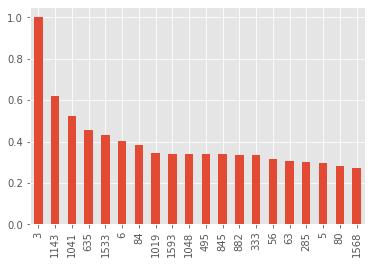

In [56]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)
pd.DataFrame(arr).loc[3].sort_values(ascending = False).head(20).plot(kind = 'bar')

In [57]:
Nd_df['text'].loc[3]

'Ο πρωθυπουργός χθες "έκαψε" ουσιαστικά τις πρόωρες εκλογές, αλλά ήδη έχει ξεκινήσει η φημολογία για αλλαγές στο κυβερνητικό σχήμα.'

In [58]:
Nd_df['text'].loc[253]

'Επίθεση κατά της κυβέρνησης για τους χειρισμούς της στο θέμα της ακρίβειας εξαπέλυσε ο εκπρόσωπος Τύπου του ΣΥΡΙΖΑ - ΠΣ Νάσος Ηλιόπουλος. Καλεί τον πρωθυπουργό να "σταματήσει την κοροϊδία".'

# Emolex Nea Dhmokratia

In [59]:
filepath = "https://raw.githubusercontent.com/datajour-gr/Data_journalism/master/week10/NRC_GREEK_Translated_6_2020.csv"
emolex_df = pd.read_csv(filepath)
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(drop = True, inplace = True)
emolex_df

word  Positive  Negative  Anger  Anticipation  Disgust  \
0                αφεση       1.0       0.0    0.0           0.0      0.0   
1      ενορκη βεβαιωση       0.0       0.0    0.0           0.0      0.0   
2              εχοντας       0.0       0.0    0.0           0.0      0.0   
3                  εχω       0.0       0.0    0.0           0.0      0.0   
4                 οριο       0.0       0.0    0.0           0.0      0.0   
...                ...       ...       ...    ...           ...      ...   
13156        ουρλιασμα       0.0       1.0    1.0           0.0      0.0   
13157     κροκος αυγου       0.0       0.0    0.0           0.0      0.0   
13158         νεοτερος       1.0       0.0    0.0           0.0      0.0   
13159          ζεφυρος       0.0       0.0    0.0           0.0      0.0   
13160             ζουμ       0.0       0.0    0.0           0.0      0.0   

       Fear  Joy  Sadness  Surprise  Trust  
0       0.0  0.0      0.0       0.0    0.0  
1       0.0  0.0      0.0       0.0    0.0  
2       0.0  0.0      0.0       0.0    0.0  
3       0.0  0.0      0.0       0.0    0.0  
4       0.0  0.0      0.0       0.0    0.0  
...     ...  ...      ...       ...    ...  
13156   1.0  0.0      0.0       1.0    0.0  
13157   0.0  0.0      0.0       0.0    0.0  
13158   0.0  0.0      0.0       0.0    0.0  
13159   0.0  0.0      0.0       0.0    0.0  
13160   0.0  0.0      0.0       0.0    0.0  

[13161 rows x 11 columns]

In [60]:
import spacy
nlp = spacy.load('el_core_news_sm')

In [61]:
Nd_df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/nea-dimokratia.tsv", sep='\t')
Nd_df

Unnamed: 0                                              Title  \
0              0  Μια ανασκόπηση όσων διαδραματίστηκαν την εβδομ...   
1              1                Ασκήσεις μικροπολιτικής ετοιμότητος   
2              2  "Μύλος": ΔΑΠ διαψεύδει ΔΑΠ Νομικής για την ανα...   
3              3  Το ρίσκο Μητσοτάκη και νέα σενάρια ανασχηματισμού   
4              4  ΔΑΠ κατά Κεραμέως για τις φοιτητικές εκλογές: ...   
...          ...                                                ...   
1955        1955  Η επικοινωνιακή "τριάδα" του Μητσοτάκη και το ...   
1956        1956  Η ακτινογραφία της κυβέρνησης Μητσοτάκη: Τεχνο...   
1957        1957  Τα νέα πρόσωπα στις κοινοβουλευτικές ομάδες τη...   
1958        1958  Συγχαρητήριο μήνυμα State Department στη νέα κ...   
1959        1959  Γιώργος Ζαββός, ο νέος Υφυπουργός αρμόδιος για...   

                   Datetime  \
0     09 Ιουλίου 2022 08:17   
1     08 Ιουλίου 2022 11:54   
2     08 Ιουλίου 2022 09:41   
3     08 Ιουλίου 2022 06:15   
4     07 Ιουλίου 2022 22:01   
...                     ...   
1955  09 Ιουλίου 2019 07:17   
1956  09 Ιουλίου 2019 07:11   
1957  08 Ιουλίου 2019 23:34   
1958  08 Ιουλίου 2019 22:16   
1959  08 Ιουλίου 2019 21:15   

                                                   Href  \
0     https://www.news247.gr/politiki/mia-anaskopisi...   
1     https://www.news247.gr/gnomes/giannhs-trianths...   
2     https://www.news247.gr/paideia/mylos-dap-diaps...   
3     https://www.news247.gr/politiki/to-risko-mitso...   
4     https://www.news247.gr/politiki/dap-kata-keram...   
...                                                 ...   
1955  https://www.news247.gr/politiki/to-epikoinonia...   
1956  https://www.news247.gr/politiki/i-aktinografia...   
1957  https://www.news247.gr/ekloges/nea-prosopa-koi...   
1958  https://www.news247.gr/politiki/sygcharitirio-...   
1959  https://www.news247.gr/politiki/giorgos-zavvos...   

                                               Leadtext                  Tag  \
0     Ποια καίρια ζητήματα έθιξαν τα κόμματα αυτή τη...                ΒΟΥΛΗ   
1     Δεν πείθει η επιχείρηση του πρωθυπουργού να συ...  ΚΥΡΙΑΚΟΣ ΜΗΤΣΟΤΑΚΗΣ   
2     Εμφύλιος στην φοιτητική παράταξη της Νέας Δημο...       ΝΕΑ ΔΗΜΟΚΡΑΤΙΑ   
3     Ο πρωθυπουργός χθες "έκαψε" ουσιαστικά τις πρό...  ΚΥΡΙΑΚΟΣ ΜΗΤΣΟΤΑΚΗΣ   
4     Δριμεία επίθεση ΔΑΠ-ΝΔΦΚ Νομικής Αθηνών κατά τ...       ΝΕΑ ΔΗΜΟΚΡΑΤΙΑ   
...                                                 ...                  ...   
1955  Πέτσας, Ζούλας και Κάπη στην επικοινωνιακή ομά...       ΝΕΑ ΔΗΜΟΚΡΑΤΙΑ   
1956  Είκοσι ένα εξωκοινοβουλευτικά μέλη έχει το νέο...         ΕΚΛΟΓΕΣ 2019   
1957  Στην κοινοβουλευτική ομάδα της ΝΔ ο αριθμός τω...                ΒΟΥΛΗ   
1958  "Θα συνεχίσουμε να εμβαθύνουμε τη συνεργασία μ...                  ΗΠΑ   
1959  Ο έμπειρος Γιώργος Ζαββός θα αναλάβει το δύσκο...       ΝΕΑ ΔΗΜΟΚΡΑΤΙΑ   

      Year    Month  Day   Time                 Date  
0     2022  Ιουλίου    9  08:17  2022-07-09 08:17:00  
1     2022  Ιουλίου    8  11:54  2022-07-08 11:54:00  
2     2022  Ιουλίου    8  09:41  2022-07-08 09:41:00  
3     2022  Ιουλίου    8  06:15  2022-07-08 06:15:00  
4     2022  Ιουλίου    7  22:01  2022-07-07 22:01:00  
...    ...      ...  ...    ...                  ...  
1955  2019  Ιουλίου    9  07:17  2019-07-09 07:17:00  
1956  2019  Ιουλίου    9  07:11  2019-07-09 07:11:00  
1957  2019  Ιουλίου    8  23:34  2019-07-08 23:34:00  
1958  2019  Ιουλίου    8  22:16  2019-07-08 22:16:00  
1959  2019  Ιουλίου    8  21:15  2019-07-08 21:15:00  

[1960 rows x 11 columns]

In [62]:
Nd_df['Date'] = pd.to_datetime(Nd_df['Date'])

In [63]:
Nd_df.dtypes

Unnamed: 0             int64
Title                 object
Datetime              object
Href                  object
Leadtext              object
Tag                   object
Year                   int64
Month                 object
Day                    int64
Time                  object
Date          datetime64[ns]
dtype: object

In [64]:
emolex_df['word'].head(3)

0              αφεση
1    ενορκη βεβαιωση
2            εχοντας
Name: word, dtype: object

In [65]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word, 
                      strip_accents = 'unicode',  
                      stop_words= nlp.Defaults.stop_words,
                      ngram_range=(1, 2))

In [66]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#CountVectorizer(stop_words='english', binary=True)
# Θέλω να ελέγξω μόνο τις λέξεις που υπάρχουν στο συναισθηματικό λεξικό

#CountVectorizer(analyzer = 'word', 
#              strip_accents = 'unicode', 
#               token_pattern='[Α-Ωα-ωΆ-Ώά-ώ]{2,}', 
#               stop_words= lc_stop_words_df['stop_w'].tolist())


matrix = vec.fit_transform(Nd_df['Leadtext'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:1323: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  "Upper case characters found in"
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια

αφεση  ενορκη βεβαιωση  εχοντας  εχω  οριο  ορμος  υδρα  αγια τραπεζα  \
0      0                0        0    0     0      0     0             0   
1      0                0        0    0     0      0     0             0   
2      0                0        0    0     0      0     0             0   
3      0                0        0    0     0      0     0             0   
4      0                0        0    0     0      0     0             0   

   αμην  απατσι  ...  κλητηριο ενταλμα  κατειργασμενος  μαγια  κιτρινο  \
0     0       0  ...                 0               0      0        0   
1     0       0  ...                 0               0      0        0   
2     0       0  ...                 0               0      0        0   
3     0       0  ...                 0               0      0        0   
4     0       0  ...                 0               0      0        0   

   κιτρινιζω  ουρλιασμα  κροκος αυγου  νεοτερος  ζεφυρος  ζουμ  
0          0          0             0         0        0     0  
1          0          0             0         0        0     0  
2          0          0             0         0        0     0  
3          0          0             0         0        0     0  
4          0          0             0         0        0     0  

[5 rows x 13161 columns]

In [67]:
wordcount_df.shape

(1960, 13161)

In [68]:
emolex_df.head()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
0            αφεση       1.0       0.0    0.0           0.0      0.0   0.0   
1  ενορκη βεβαιωση       0.0       0.0    0.0           0.0      0.0   0.0   
2          εχοντας       0.0       0.0    0.0           0.0      0.0   0.0   
3              εχω       0.0       0.0    0.0           0.0      0.0   0.0   
4             οριο       0.0       0.0    0.0           0.0      0.0   0.0   

   Joy  Sadness  Surprise  Trust  
0  0.0      0.0       0.0    0.0  
1  0.0      0.0       0.0    0.0  
2  0.0      0.0       0.0    0.0  
3  0.0      0.0       0.0    0.0  
4  0.0      0.0       0.0    0.0

In [69]:
emolex_df[emolex_df.Anger == 1].tail()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
13094      διεξοδος       0.0       0.0    1.0           0.0      0.0   0.0   
13096        ζωυφια       0.0       1.0    1.0           0.0      1.0   1.0   
13100    θυματοποιω       0.0       1.0    1.0           0.0      1.0   1.0   
13128  αποτυχημενος       0.0       1.0    1.0           0.0      1.0   0.0   
13156     ουρλιασμα       0.0       1.0    1.0           0.0      0.0   1.0   

       Joy  Sadness  Surprise  Trust  
13094  0.0      0.0       0.0    0.0  
13096  0.0      0.0       0.0    0.0  
13100  0.0      1.0       1.0    0.0  
13128  0.0      0.0       0.0    0.0  
13156  0.0      0.0       1.0    0.0

In [70]:
# Φτιάξε μια λίστα με positive words

angry_words = emolex_df[emolex_df.Anger == 1]['word']

positive_words = emolex_df[emolex_df.Positive == 1]['word']


# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']


# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']


# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']


# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']


# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']



# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']


# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']



# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']

In [71]:
Nd_df.head(3)

Unnamed: 0                                              Title  \
0           0  Μια ανασκόπηση όσων διαδραματίστηκαν την εβδομ...   
1           1                Ασκήσεις μικροπολιτικής ετοιμότητος   
2           2  "Μύλος": ΔΑΠ διαψεύδει ΔΑΠ Νομικής για την ανα...   

                Datetime                                               Href  \
0  09 Ιουλίου 2022 08:17  https://www.news247.gr/politiki/mia-anaskopisi...   
1  08 Ιουλίου 2022 11:54  https://www.news247.gr/gnomes/giannhs-trianths...   
2  08 Ιουλίου 2022 09:41  https://www.news247.gr/paideia/mylos-dap-diaps...   

                                            Leadtext                  Tag  \
0  Ποια καίρια ζητήματα έθιξαν τα κόμματα αυτή τη...                ΒΟΥΛΗ   
1  Δεν πείθει η επιχείρηση του πρωθυπουργού να συ...  ΚΥΡΙΑΚΟΣ ΜΗΤΣΟΤΑΚΗΣ   
2  Εμφύλιος στην φοιτητική παράταξη της Νέας Δημο...       ΝΕΑ ΔΗΜΟΚΡΑΤΙΑ   

   Year    Month  Day   Time                Date  
0  2022  Ιουλίου    9  08:17 2022-07-09 08:17:00  
1  2022  Ιουλίου    8  11:54 2022-07-08 11:54:00  
2  2022  Ιουλίου    8  09:41 2022-07-08 09:41:00

In [72]:
Nd_df['anger'] = wordcount_df[angry_words].sum(axis=1)
Nd_df['positivity'] = wordcount_df[positive_words].sum(axis=1)
Nd_df['joy'] = wordcount_df[joy_words].sum(axis=1)
Nd_df['disgust'] = wordcount_df[disgust_words].sum(axis=1)
Nd_df['surprise'] = wordcount_df[surprise_words].sum(axis=1)
Nd_df['trust'] = wordcount_df[trust_words].sum(axis=1)
Nd_df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)
Nd_df['sadness'] = wordcount_df[sadness_words].sum(axis=1)
Nd_df['negative'] = wordcount_df[negative_words].sum(axis=1)
Nd_df['fear'] = wordcount_df[fear_words].sum(axis=1)

In [73]:
Nd_df

Unnamed: 0                                              Title  \
0              0  Μια ανασκόπηση όσων διαδραματίστηκαν την εβδομ...   
1              1                Ασκήσεις μικροπολιτικής ετοιμότητος   
2              2  "Μύλος": ΔΑΠ διαψεύδει ΔΑΠ Νομικής για την ανα...   
3              3  Το ρίσκο Μητσοτάκη και νέα σενάρια ανασχηματισμού   
4              4  ΔΑΠ κατά Κεραμέως για τις φοιτητικές εκλογές: ...   
...          ...                                                ...   
1955        1955  Η επικοινωνιακή "τριάδα" του Μητσοτάκη και το ...   
1956        1956  Η ακτινογραφία της κυβέρνησης Μητσοτάκη: Τεχνο...   
1957        1957  Τα νέα πρόσωπα στις κοινοβουλευτικές ομάδες τη...   
1958        1958  Συγχαρητήριο μήνυμα State Department στη νέα κ...   
1959        1959  Γιώργος Ζαββός, ο νέος Υφυπουργός αρμόδιος για...   

                   Datetime  \
0     09 Ιουλίου 2022 08:17   
1     08 Ιουλίου 2022 11:54   
2     08 Ιουλίου 2022 09:41   
3     08 Ιουλίου 2022 06:15   
4     07 Ιουλίου 2022 22:01   
...                     ...   
1955  09 Ιουλίου 2019 07:17   
1956  09 Ιουλίου 2019 07:11   
1957  08 Ιουλίου 2019 23:34   
1958  08 Ιουλίου 2019 22:16   
1959  08 Ιουλίου 2019 21:15   

                                                   Href  \
0     https://www.news247.gr/politiki/mia-anaskopisi...   
1     https://www.news247.gr/gnomes/giannhs-trianths...   
2     https://www.news247.gr/paideia/mylos-dap-diaps...   
3     https://www.news247.gr/politiki/to-risko-mitso...   
4     https://www.news247.gr/politiki/dap-kata-keram...   
...                                                 ...   
1955  https://www.news247.gr/politiki/to-epikoinonia...   
1956  https://www.news247.gr/politiki/i-aktinografia...   
1957  https://www.news247.gr/ekloges/nea-prosopa-koi...   
1958  https://www.news247.gr/politiki/sygcharitirio-...   
1959  https://www.news247.gr/politiki/giorgos-zavvos...   

                                               Leadtext                  Tag  \
0     Ποια καίρια ζητήματα έθιξαν τα κόμματα αυτή τη...                ΒΟΥΛΗ   
1     Δεν πείθει η επιχείρηση του πρωθυπουργού να συ...  ΚΥΡΙΑΚΟΣ ΜΗΤΣΟΤΑΚΗΣ   
2     Εμφύλιος στην φοιτητική παράταξη της Νέας Δημο...       ΝΕΑ ΔΗΜΟΚΡΑΤΙΑ   
3     Ο πρωθυπουργός χθες "έκαψε" ουσιαστικά τις πρό...  ΚΥΡΙΑΚΟΣ ΜΗΤΣΟΤΑΚΗΣ   
4     Δριμεία επίθεση ΔΑΠ-ΝΔΦΚ Νομικής Αθηνών κατά τ...       ΝΕΑ ΔΗΜΟΚΡΑΤΙΑ   
...                                                 ...                  ...   
1955  Πέτσας, Ζούλας και Κάπη στην επικοινωνιακή ομά...       ΝΕΑ ΔΗΜΟΚΡΑΤΙΑ   
1956  Είκοσι ένα εξωκοινοβουλευτικά μέλη έχει το νέο...         ΕΚΛΟΓΕΣ 2019   
1957  Στην κοινοβουλευτική ομάδα της ΝΔ ο αριθμός τω...                ΒΟΥΛΗ   
1958  "Θα συνεχίσουμε να εμβαθύνουμε τη συνεργασία μ...                  ΗΠΑ   
1959  Ο έμπειρος Γιώργος Ζαββός θα αναλάβει το δύσκο...       ΝΕΑ ΔΗΜΟΚΡΑΤΙΑ   

      Year    Month  Day   Time  ... anger  positivity  joy  disgust  \
0     2022  Ιουλίου    9  08:17  ...     0           1    0        0   
1     2022  Ιουλίου    8  11:54  ...     1           1    0        1   
2     2022  Ιουλίου    8  09:41  ...     1           2    0        0   
3     2022  Ιουλίου    8  06:15  ...     0           1    0        1   
4     2022  Ιουλίου    7  22:01  ...     1           0    0        1   
...    ...      ...  ...    ...  ...   ...         ...  ...      ...   
1955  2019  Ιουλίου    9  07:17  ...     0           0    0        0   
1956  2019  Ιουλίου    9  07:11  ...     0           2    0        1   
1957  2019  Ιουλίου    8  23:34  ...     1           1    0        2   
1958  2019  Ιουλίου    8  22:16  ...     0           3    2        0   
1959  2019  Ιουλίου    8  21:15  ...     0           1    0        0   

      surprise  trust  anticipation  sadness  negative  fear  
0            0      1             0        0         0     0  
1            0      0             2        2         2     1  
2            0      0             1        0         1  

In [74]:
max = 0
happiest_tweet = ""
for i in range(0,len(Nd_df)):
  #print(Nd_df.iloc[i]['positivity'])
  if Nd_df.iloc[i]['positivity'] > max:
    happiest_tweet = Nd_df.iloc[i]['Leadtext']
    max = Nd_df.iloc[i]['positivity']


happiest_tweet

'"Γιατί η κυβέρνηση δεν έκανε σημαία της την πάταξη της ανομίας στους χώρους δουλειάς, της παραβίασης της εργατικής νομοθεσίας ή σε περιοχές της Αθήνας που δεν υπάρχει άσυλο;", ανέφερε μεταξύ άλλων ο γενικός γραμματέας του ΚΚΕ, μιλώντας στην ολομέλεια.'

In [75]:
max = 0
negative_tweet = ""
for i in range(0,len(Nd_df)):
  #print(Nd_df.iloc[i]['positivity'])
  if Nd_df.iloc[i]['negative'] > max:
    negative_tweet = Nd_df.iloc[i]['Leadtext']
    max = Nd_df.iloc[i]['negative']


negative_tweet

'Κριτική στην κυβέρνηση για «κατάργηση μέτρων που θέσπισε η κυβέρνηση ΣΥΡΙΖΑ υπέρ του κόσμου της εργασίας» ασκεί η τομεάρχης Εργασίας και Κοινωνικής Ασφάλισης του κόμματος της αξιωματικής αντιπολίτευσης Έφη Αχτσιόγλου.'

In [76]:
max = 0
saddest_tweet = ""
for i in range(0,len(Nd_df)):
  #print(Nd_df.iloc[i]['positivity'])
  if Nd_df.iloc[i]['sadness'] > max:
    saddest_tweet = Nd_df.iloc[i]['Leadtext']
    max = Nd_df.iloc[i]['sadness']

saddest_tweet

'Σε ανακοίνωσή του για το ναυάγιο της Πάρου το ΚΚΕ αναφέρει,  μεταξύ άλλων, οτι όσο συνεχίζεται η πολιτική του εγκλωβισμού σε βάρος των ξεριζωμένων τόσο η απελπισία θα τους οδηγεί στα νύχια των διακινητών.'

In [77]:
max = 0
disgust_tweet = ""
for i in range(0,len(Nd_df)):
  #print(Nd_df.iloc[i]['positivity'])
  if Nd_df.iloc[i]['disgust'] > max:
    disgust_tweet = Nd_df.iloc[i]['Leadtext']
    max = Nd_df.iloc[i]['disgust']


In [78]:
max = 0
trust_tweet = ""
for i in range(0,len(Nd_df)):
  #print(Nd_df.iloc[i]['positivity'])
  if Nd_df.iloc[i]['trust'] > max:
    trust_tweet = Nd_df.iloc[i]['Leadtext']
    max = Nd_df.iloc[i]['trust']

trust_tweet

'"Όσα χρόνια και αν περάσουν, η σοβαρότερη αξία στη ζωή των ανθρώπων είναι η ελευθερία. Κρατήστε την ελευθερία και την ανεξαρτησία σας" δήλωσε ο υπουργός Εσωτερικών μιλώντας στο 12ο συνέδριο της ΟΝΝΕΔ.'

In [79]:
Nd_df.set_index('Date' , inplace=True)

In [80]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

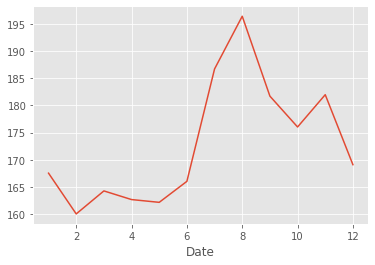

In [81]:
Nd_df['Leadtext'].str.len().groupby(by=Nd_df.index.month).mean().plot()

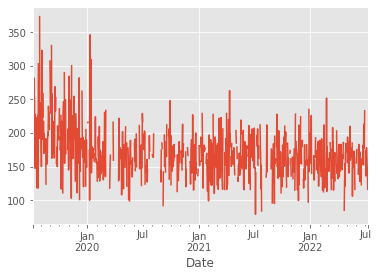

In [82]:
Nd_df['Leadtext'].str.len().resample('D').mean().plot() 

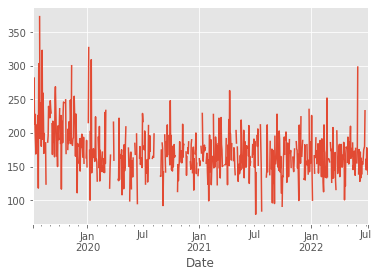

In [83]:
Nd_df['Leadtext'].str.len().resample('B').mean().plot() 

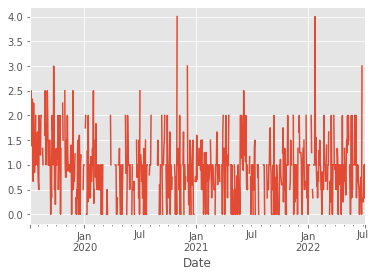

In [84]:
Nd_df['positivity'].resample('B').mean().plot() 

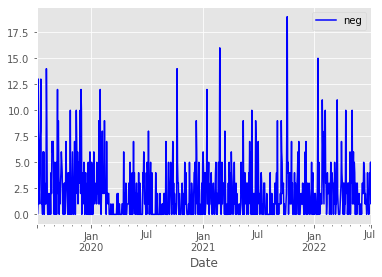

In [85]:
Nd_df['negative'].resample('B').sum().plot(color = 'b',label = 'neg').legend() 

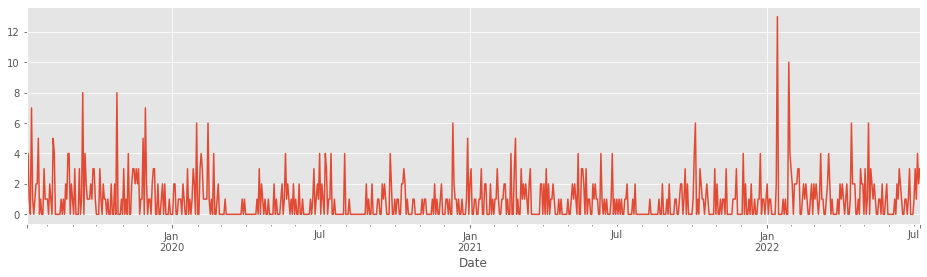

In [86]:
Nd_df['anger'].resample('B').sum().plot(figsize=(16,4))

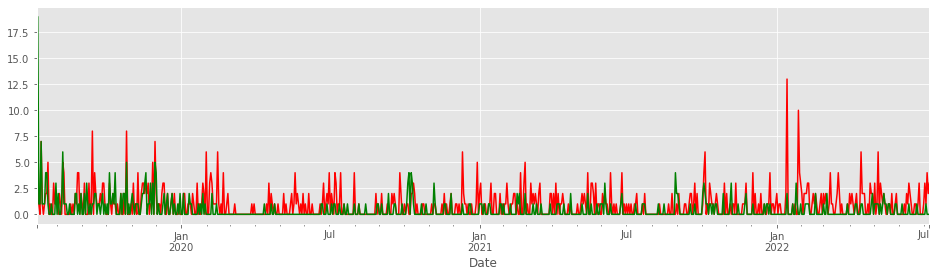

In [87]:
ax = Nd_df['anger'].resample('B').sum().plot(figsize=(16,4), color = 'red')
Nd_df['joy'].resample('B').sum().plot(figsize=(16,4), ax = ax, color = 'green')

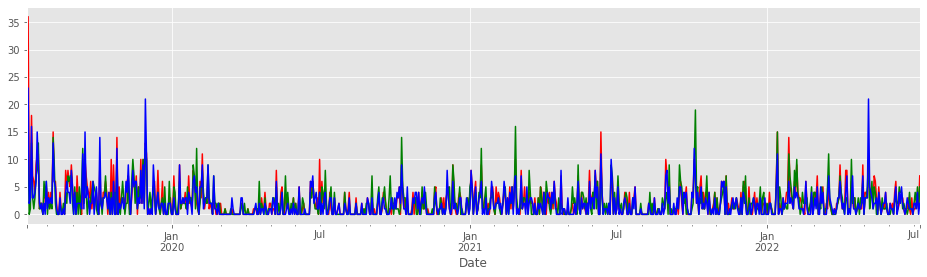

In [88]:
ax = Nd_df['positivity'].resample('B').sum().plot(figsize=(16,4), color = 'red')
Nd_df['negative'].resample('B').sum().plot(figsize=(16,4), ax = ax, color = 'green')
Nd_df['trust'].resample('B').sum().plot(figsize=(16,4), ax = ax, color = 'blue')

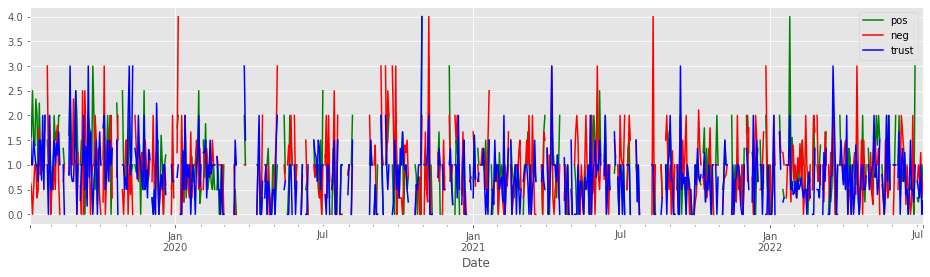

In [89]:
ax = Nd_df['positivity'].resample('B').mean().plot(figsize=(16,4), 
                                                          color = 'g', label='pos')
Nd_df['negative'].resample('B').mean().plot(figsize=(16,4), ax = ax, 
                                                   label = 'neg', color = 'r')
Nd_df['trust'].resample('B').mean().plot(figsize=(16,4), ax = ax, 
                                                label = 'trust',color = 'blue').legend()

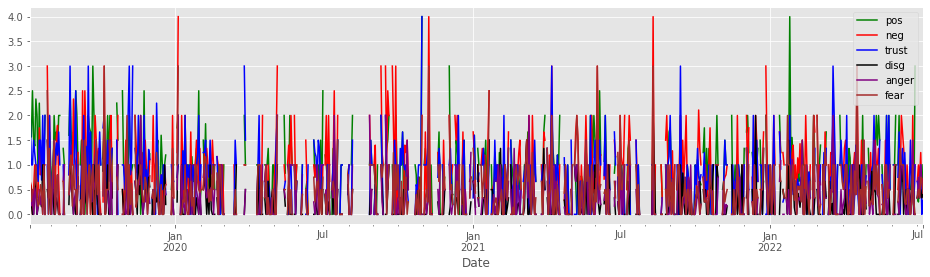

In [90]:
plt.style.use('ggplot')
ax = Nd_df['positivity'].resample('B').mean().plot(figsize=(16,4), 
                                                          color = 'g', label='pos')
Nd_df['negative'].resample('B').mean().plot(figsize=(16,4), ax = ax, 
                                                   label = 'neg', color = 'r')
Nd_df['trust'].resample('B').mean().plot(figsize=(16,4), ax = ax, 
                                                label = 'trust',color = 'blue').legend()

Nd_df['disgust'].resample('B').mean().plot(figsize=(16,4), ax = ax, 
                                                label = 'disg',color = 'black').legend() 

Nd_df['anger'].resample('B').mean().plot(figsize=(16,4), ax = ax, 
                                                label = 'anger',color = 'purple').legend() 

Nd_df['fear'].resample('B').mean().plot(figsize=(16,4), ax = ax, 
                                                label = 'fear',color = 'brown').legend()    

Text(0, 0.5, 'Years')

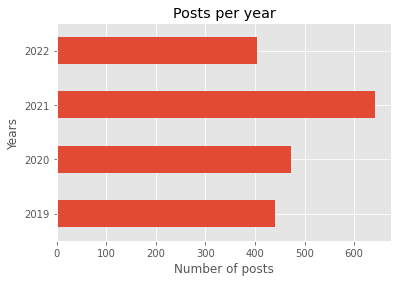

In [91]:
Nd_df['Leadtext'].groupby(by=Nd_df.index.year).count().plot(kind='barh')
plt.title("Posts per year")
plt.xlabel("Number of posts")
plt.ylabel("Years")

Text(0, 0.5, 'Hour of the day')

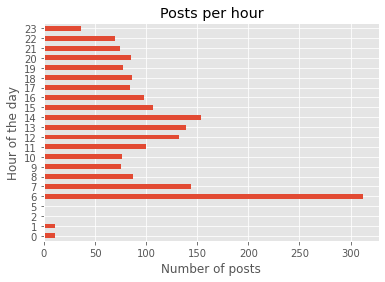

In [92]:
Nd_df['Leadtext'].groupby(by=Nd_df.index.hour).count().plot(kind='barh')
plt.title("Posts per hour")
plt.xlabel("Number of posts")
plt.ylabel("Hour of the day")

Text(0, 0.5, 'Months')

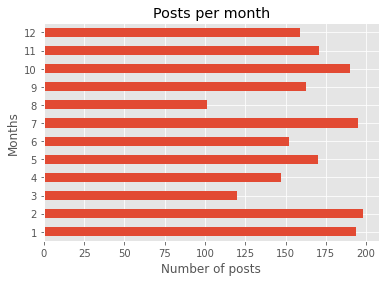

In [93]:
Nd_df['Leadtext'].groupby(by=Nd_df.index.month).count().plot(kind='barh')
plt.title("Posts per month")
plt.xlabel("Number of posts")
plt.ylabel("Months")

In [94]:
Nd_df

Unnamed: 0  \
Date                              
2022-07-09 08:17:00           0   
2022-07-08 11:54:00           1   
2022-07-08 09:41:00           2   
2022-07-08 06:15:00           3   
2022-07-07 22:01:00           4   
...                         ...   
2019-07-09 07:17:00        1955   
2019-07-09 07:11:00        1956   
2019-07-08 23:34:00        1957   
2019-07-08 22:16:00        1958   
2019-07-08 21:15:00        1959   

                                                                 Title  \
Date                                                                     
2022-07-09 08:17:00  Μια ανασκόπηση όσων διαδραματίστηκαν την εβδομ...   
2022-07-08 11:54:00                Ασκήσεις μικροπολιτικής ετοιμότητος   
2022-07-08 09:41:00  "Μύλος": ΔΑΠ διαψεύδει ΔΑΠ Νομικής για την ανα...   
2022-07-08 06:15:00  Το ρίσκο Μητσοτάκη και νέα σενάρια ανασχηματισμού   
2022-07-07 22:01:00  ΔΑΠ κατά Κεραμέως για τις φοιτητικές εκλογές: ...   
...                                                                ...   
2019-07-09 07:17:00  Η επικοινωνιακή "τριάδα" του Μητσοτάκη και το ...   
2019-07-09 07:11:00  Η ακτινογραφία της κυβέρνησης Μητσοτάκη: Τεχνο...   
2019-07-08 23:34:00  Τα νέα πρόσωπα στις κοινοβουλευτικές ομάδες τη...   
2019-07-08 22:16:00  Συγχαρητήριο μήνυμα State Department στη νέα κ...   
2019-07-08 21:15:00  Γιώργος Ζαββός, ο νέος Υφυπουργός αρμόδιος για...   

                                  Datetime  \
Date                                         
2022-07-09 08:17:00  09 Ιουλίου 2022 08:17   
2022-07-08 11:54:00  08 Ιουλίου 2022 11:54   
2022-07-08 09:41:00  08 Ιουλίου 2022 09:41   
2022-07-08 06:15:00  08 Ιουλίου 2022 06:15   
2022-07-07 22:01:00  07 Ιουλίου 2022 22:01   
...                                    ...   
2019-07-09 07:17:00  09 Ιουλίου 2019 07:17   
2019-07-09 07:11:00  09 Ιουλίου 2019 07:11   
2019-07-08 23:34:00  08 Ιουλίου 2019 23:34   
2019-07-08 22:16:00  08 Ιουλίου 2019 22:16   
2019-07-08 21:15:00  08 Ιουλίου 2019 21:15   

                                                                  Href  \
Date                                                                     
2022-07-09 08:17:00  https://www.news247.gr/politiki/mia-anaskopisi...   
2022-07-08 11:54:00  https://www.news247.gr/gnomes/giannhs-trianths...   
2022-07-08 09:41:00  https://www.news247.gr/paideia/mylos-dap-diaps...   
2022-07-08 06:15:00  https://www.news247.gr/politiki/to-risko-mitso...   
2022-07-07 22:01:00  https://www.news247.gr/politiki/dap-kata-keram...   
...                                                                ...   
2019-07-09 07:17:00  https://www.news247.gr/politiki/to-epikoinonia...   
2019-07-09 07:11:00  https://www.news247.gr/politiki/i-aktinografia...   
2019-07-08 23:34:00  https://www.news247.gr/ekloges/nea-prosopa-koi...   
2019-07-08 22:16:00  https://www.news247.gr/politiki/sygcharitirio-...   
2019-07-08 21:15:00  https://www.news247.gr/politiki/giorgos-zavvos...   

                                                              Leadtext  \
Date                                                                     
2022-07-09 08:17:00  Ποια καίρια ζητήματα έθιξαν τα κόμματα αυτή τη...   
2022-07-08 11:54:00  Δεν πείθει η επιχείρηση του πρωθυπουργού να συ...   
2022-07-08 09:41:00  Εμφύλιος στην φοιτητική παράταξη της Νέας Δημο...   
2022-07-08 06:15:00  Ο πρωθυπουργός χθες "έκαψε" ουσιαστικά τις πρό...   
2022-07-07 22:01:00  Δριμεία επίθεση ΔΑΠ-ΝΔΦΚ Νομικής Αθηνών κατά τ...   
...                                                                ...   
2019-07-09 07:17:00  Πέτσας, Ζούλας και Κάπη στην επικοινωνιακή ομά...   
2019-07-09 07:11:00  Είκοσι ένα εξωκοινοβουλευτικά μέλη έχει το νέο...   
2019-07-08 23:34:00  Στην κοινοβουλευτική ομάδα της ΝΔ ο αριθμός τω...   
2019-07-08 22:16:00  "Θα συνεχίσουμε να εμβαθύνουμε τη συνεργασία μ...   
2019-07-08 21:15:00  Ο έμπειρος Γιώργος Ζαββός θα αναλάβει το δύσκο...   

                                     Tag  Year    Month  Day   Time  anger  \

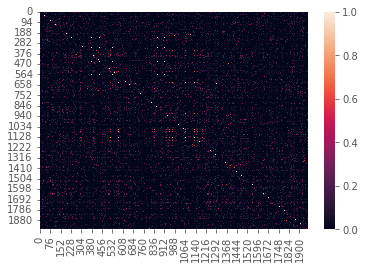

In [95]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

ax = sns.heatmap(arr)

# Άνοιγμα του Syriza_Doc

In [96]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [97]:
Syr_df =pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/syriza.tsv", sep='\t')
Syr_df

Unnamed: 0                                              Title  \
0              0  Ικαρία: Καταγγελίες για δραματικές ελλείψεις σ...   
1              1  ΣΥΡΙΖΑ: "Πολιτογράφηση πολίτη του ψευδοκράτους...   
2              2  Μια ανασκόπηση όσων διαδραματίστηκαν την εβδομ...   
3              3  Τσίπρας από Ικαρία: "Να απαλλαγούμε από το ζόφ...   
4              4  Κώστας Καραμανλής: "Διορθώνουμε την προβληματι...   
...          ...                                                ...   
1955        1955  Τσίπρας στο PES: Σαν να μην μάθαμε τίποτα από ...   
1956        1956  Τσίπρας στο PES: Αγωνιζόμαστε για μια Ευρώπη μ...   
1957        1957  Οι Ευρωβουλευτές της ΝΔ ψήφισαν κατά των αμβλώ...   
1958        1958  Σπίρτζης: "Να σταματήσει η χρησιμοποίηση της Ε...   
1959        1959  Κατρούγκαλος για Συμφωνία Πρεσπών: "Η καθυστέρ...   

                   Datetime  \
0     09 Ιουλίου 2022 17:19   
1     09 Ιουλίου 2022 09:35   
2     09 Ιουλίου 2022 08:17   
3     08 Ιουλίου 2022 21:19   
4     08 Ιουλίου 2022 17:06   
...                     ...   
1955  24 Ιουνίου 2021 16:47   
1956  24 Ιουνίου 2021 14:22   
1957  24 Ιουνίου 2021 11:59   
1958  24 Ιουνίου 2021 11:01   
1959  23 Ιουνίου 2021 21:38   

                                                   Href  \
0     https://www.news247.gr/politiki/ikaria-katagge...   
1     https://www.news247.gr/politiki/syriza-politog...   
2     https://www.news247.gr/politiki/mia-anaskopisi...   
3     https://www.news247.gr/politiki/tsipras-apo-ik...   
4     https://www.news247.gr/politiki/kostas-karaman...   
...                                                 ...   
1955  https://www.news247.gr/politiki/tsipras-sto-pe...   
1956  https://www.news247.gr/politiki/tsipras-sto-pe...   
1957  https://www.news247.gr/politiki/oi-eyrovoyleyt...   
1958  https://www.news247.gr/politiki/spirtzis-na-st...   
1959  https://www.news247.gr/politiki/katroygkalos-g...   

                                               Leadtext                Tag  \
0     Απουσία παθολόγου και αναισθησιολόγου κατήγγει...          ΣΥ.ΡΙΖ.Α.   
1     "Πολιτικό απατεώνα" χαρακτηρίζει ο ΣΥΡΙΖΑ τον ...          ΣΥ.ΡΙΖ.Α.   
2     Ποια καίρια ζητήματα έθιξαν τα κόμματα αυτή τη...              ΒΟΥΛΗ   
3     Νέα επίθεση του προέδρου του ΣΥΡΙΖΑ στον πρωθυ...          ΣΥ.ΡΙΖ.Α.   
4     Με τη νέα σύμβαση με ΤΡΑΙΝΟΣΕ, επιστρέφουν 453...  ΚΩΣΤΑΣ ΚΑΡΑΜΑΝΛΗΣ   
...                                                 ...                ...   
1955  Κατά της επιστροφής στην "δημοσιονομική ορθοδο...     ΑΛΕΞΗΣ ΤΣΙΠΡΑΣ   
1956  Οφείλουμε να μην αφήσουμε τις συντηρητικές δυν...     ΑΛΕΞΗΣ ΤΣΙΠΡΑΣ   
1957  Η κοινοβουλευτική ομάδα της ΝΔ ψήφισε στην Ευρ...     ΝΕΑ ΔΗΜΟΚΡΑΤΙΑ   
1958  Αιχμές κατά της ΕΛΑΣ αφήνει ο Χρήστος Σπίρτζης...   ΧΡΗΣΤΟΣ ΣΠΙΡΤΖΗΣ   
1959  "Η Κυβέρνηση πρέπει να παρακολουθεί στενά την ...          ΣΥ.ΡΙΖ.Α.   

      Year    Month  Day   Time                 Date  
0     2022  Ιουλίου    9  17:19  2022-07-09 17:19:00  
1     2022  Ιουλίου    9  09:35  2022-07-09 09:35:00  
2     2022  Ιουλίου    9  08:17  2022-07-09 08:17:00  
3     2022  Ιουλίου    8  21:19  2022-07-08 21:19:00  
4     2022  Ιουλίου    8  17:06  2022-07-08 17:06:00  
...    ...      ...  ...    ...                  ...  
1955  2021  Ιουνίου   24  16:47  2021-06-24 16:47:00  
1956  2021  Ιουνίου   24  14:22  2021-06-24 14:22:00  
1957  2021  Ιουνίου   24  11:59  2021-06-24 11:59:00  
1958  2021  Ιουνίου   24  11:01  2021-06-24 11:01:00  
1959  2021  Ιουνίου   23  21:38  2021-06-23 21:38:00  

[1960 rows x 11 columns]

In [98]:
Syr_df.dtypes

Unnamed: 0     int64
Title         object
Datetime      object
Href          object
Leadtext      object
Tag           object
Year           int64
Month         object
Day            int64
Time          object
Date          object
dtype: object

In [99]:
Syr_df['Date'] = pd.to_datetime(Syr_df['Date'])


Syr_df

Unnamed: 0                                              Title  \
0              0  Ικαρία: Καταγγελίες για δραματικές ελλείψεις σ...   
1              1  ΣΥΡΙΖΑ: "Πολιτογράφηση πολίτη του ψευδοκράτους...   
2              2  Μια ανασκόπηση όσων διαδραματίστηκαν την εβδομ...   
3              3  Τσίπρας από Ικαρία: "Να απαλλαγούμε από το ζόφ...   
4              4  Κώστας Καραμανλής: "Διορθώνουμε την προβληματι...   
...          ...                                                ...   
1955        1955  Τσίπρας στο PES: Σαν να μην μάθαμε τίποτα από ...   
1956        1956  Τσίπρας στο PES: Αγωνιζόμαστε για μια Ευρώπη μ...   
1957        1957  Οι Ευρωβουλευτές της ΝΔ ψήφισαν κατά των αμβλώ...   
1958        1958  Σπίρτζης: "Να σταματήσει η χρησιμοποίηση της Ε...   
1959        1959  Κατρούγκαλος για Συμφωνία Πρεσπών: "Η καθυστέρ...   

                   Datetime  \
0     09 Ιουλίου 2022 17:19   
1     09 Ιουλίου 2022 09:35   
2     09 Ιουλίου 2022 08:17   
3     08 Ιουλίου 2022 21:19   
4     08 Ιουλίου 2022 17:06   
...                     ...   
1955  24 Ιουνίου 2021 16:47   
1956  24 Ιουνίου 2021 14:22   
1957  24 Ιουνίου 2021 11:59   
1958  24 Ιουνίου 2021 11:01   
1959  23 Ιουνίου 2021 21:38   

                                                   Href  \
0     https://www.news247.gr/politiki/ikaria-katagge...   
1     https://www.news247.gr/politiki/syriza-politog...   
2     https://www.news247.gr/politiki/mia-anaskopisi...   
3     https://www.news247.gr/politiki/tsipras-apo-ik...   
4     https://www.news247.gr/politiki/kostas-karaman...   
...                                                 ...   
1955  https://www.news247.gr/politiki/tsipras-sto-pe...   
1956  https://www.news247.gr/politiki/tsipras-sto-pe...   
1957  https://www.news247.gr/politiki/oi-eyrovoyleyt...   
1958  https://www.news247.gr/politiki/spirtzis-na-st...   
1959  https://www.news247.gr/politiki/katroygkalos-g...   

                                               Leadtext                Tag  \
0     Απουσία παθολόγου και αναισθησιολόγου κατήγγει...          ΣΥ.ΡΙΖ.Α.   
1     "Πολιτικό απατεώνα" χαρακτηρίζει ο ΣΥΡΙΖΑ τον ...          ΣΥ.ΡΙΖ.Α.   
2     Ποια καίρια ζητήματα έθιξαν τα κόμματα αυτή τη...              ΒΟΥΛΗ   
3     Νέα επίθεση του προέδρου του ΣΥΡΙΖΑ στον πρωθυ...          ΣΥ.ΡΙΖ.Α.   
4     Με τη νέα σύμβαση με ΤΡΑΙΝΟΣΕ, επιστρέφουν 453...  ΚΩΣΤΑΣ ΚΑΡΑΜΑΝΛΗΣ   
...                                                 ...                ...   
1955  Κατά της επιστροφής στην "δημοσιονομική ορθοδο...     ΑΛΕΞΗΣ ΤΣΙΠΡΑΣ   
1956  Οφείλουμε να μην αφήσουμε τις συντηρητικές δυν...     ΑΛΕΞΗΣ ΤΣΙΠΡΑΣ   
1957  Η κοινοβουλευτική ομάδα της ΝΔ ψήφισε στην Ευρ...     ΝΕΑ ΔΗΜΟΚΡΑΤΙΑ   
1958  Αιχμές κατά της ΕΛΑΣ αφήνει ο Χρήστος Σπίρτζης...   ΧΡΗΣΤΟΣ ΣΠΙΡΤΖΗΣ   
1959  "Η Κυβέρνηση πρέπει να παρακολουθεί στενά την ...          ΣΥ.ΡΙΖ.Α.   

      Year    Month  Day   Time                Date  
0     2022  Ιουλίου    9  17:19 2022-07-09 17:19:00  
1     2022  Ιουλίου    9  09:35 2022-07-09 09:35:00  
2     2022  Ιουλίου    9  08:17 2022-07-09 08:17:00  
3     2022  Ιουλίου    8  21:19 2022-07-08 21:19:00  
4     2022  Ιουλίου    8  17:06 2022-07-08 17:06:00  
...    ...      ...  ...    ...                 ...  
1955  2021  Ιουνίου   24  16:47 2021-06-24 16:47:00  
1956  2021  Ιουνίου   24  14:22 2021-06-24 14:22:00  
1957  2021  Ιουνίου   24  11:59 2021-06-24 11:59:00  
1958  2021  Ιουνίου   24  11:01 2021-06-24 11:01:00  
1959  2021  Ιουνίου   23  21:38 2021-06-23 21:38:00  

[1960 rows x 11 columns]

In [100]:
#Syr_df.dtypes

In [101]:
Syr_df = Syr_df.rename(columns= {'Tag': 'Keywords', 'Leadtext': 'text'})
Syr_df

Unnamed: 0                                              Title  \
0              0  Ικαρία: Καταγγελίες για δραματικές ελλείψεις σ...   
1              1  ΣΥΡΙΖΑ: "Πολιτογράφηση πολίτη του ψευδοκράτους...   
2              2  Μια ανασκόπηση όσων διαδραματίστηκαν την εβδομ...   
3              3  Τσίπρας από Ικαρία: "Να απαλλαγούμε από το ζόφ...   
4              4  Κώστας Καραμανλής: "Διορθώνουμε την προβληματι...   
...          ...                                                ...   
1955        1955  Τσίπρας στο PES: Σαν να μην μάθαμε τίποτα από ...   
1956        1956  Τσίπρας στο PES: Αγωνιζόμαστε για μια Ευρώπη μ...   
1957        1957  Οι Ευρωβουλευτές της ΝΔ ψήφισαν κατά των αμβλώ...   
1958        1958  Σπίρτζης: "Να σταματήσει η χρησιμοποίηση της Ε...   
1959        1959  Κατρούγκαλος για Συμφωνία Πρεσπών: "Η καθυστέρ...   

                   Datetime  \
0     09 Ιουλίου 2022 17:19   
1     09 Ιουλίου 2022 09:35   
2     09 Ιουλίου 2022 08:17   
3     08 Ιουλίου 2022 21:19   
4     08 Ιουλίου 2022 17:06   
...                     ...   
1955  24 Ιουνίου 2021 16:47   
1956  24 Ιουνίου 2021 14:22   
1957  24 Ιουνίου 2021 11:59   
1958  24 Ιουνίου 2021 11:01   
1959  23 Ιουνίου 2021 21:38   

                                                   Href  \
0     https://www.news247.gr/politiki/ikaria-katagge...   
1     https://www.news247.gr/politiki/syriza-politog...   
2     https://www.news247.gr/politiki/mia-anaskopisi...   
3     https://www.news247.gr/politiki/tsipras-apo-ik...   
4     https://www.news247.gr/politiki/kostas-karaman...   
...                                                 ...   
1955  https://www.news247.gr/politiki/tsipras-sto-pe...   
1956  https://www.news247.gr/politiki/tsipras-sto-pe...   
1957  https://www.news247.gr/politiki/oi-eyrovoyleyt...   
1958  https://www.news247.gr/politiki/spirtzis-na-st...   
1959  https://www.news247.gr/politiki/katroygkalos-g...   

                                                   text           Keywords  \
0     Απουσία παθολόγου και αναισθησιολόγου κατήγγει...          ΣΥ.ΡΙΖ.Α.   
1     "Πολιτικό απατεώνα" χαρακτηρίζει ο ΣΥΡΙΖΑ τον ...          ΣΥ.ΡΙΖ.Α.   
2     Ποια καίρια ζητήματα έθιξαν τα κόμματα αυτή τη...              ΒΟΥΛΗ   
3     Νέα επίθεση του προέδρου του ΣΥΡΙΖΑ στον πρωθυ...          ΣΥ.ΡΙΖ.Α.   
4     Με τη νέα σύμβαση με ΤΡΑΙΝΟΣΕ, επιστρέφουν 453...  ΚΩΣΤΑΣ ΚΑΡΑΜΑΝΛΗΣ   
...                                                 ...                ...   
1955  Κατά της επιστροφής στην "δημοσιονομική ορθοδο...     ΑΛΕΞΗΣ ΤΣΙΠΡΑΣ   
1956  Οφείλουμε να μην αφήσουμε τις συντηρητικές δυν...     ΑΛΕΞΗΣ ΤΣΙΠΡΑΣ   
1957  Η κοινοβουλευτική ομάδα της ΝΔ ψήφισε στην Ευρ...     ΝΕΑ ΔΗΜΟΚΡΑΤΙΑ   
1958  Αιχμές κατά της ΕΛΑΣ αφήνει ο Χρήστος Σπίρτζης...   ΧΡΗΣΤΟΣ ΣΠΙΡΤΖΗΣ   
1959  "Η Κυβέρνηση πρέπει να παρακολουθεί στενά την ...          ΣΥ.ΡΙΖ.Α.   

      Year    Month  Day   Time                Date  
0     2022  Ιουλίου    9  17:19 2022-07-09 17:19:00  
1     2022  Ιουλίου    9  09:35 2022-07-09 09:35:00  
2     2022  Ιουλίου    9  08:17 2022-07-09 08:17:00  
3     2022  Ιουλίου    8  21:19 2022-07-08 21:19:00  
4     2022  Ιουλίου    8  17:06 2022-07-08 17:06:00  
...    ...      ...  ...    ...                 ...  
1955  2021  Ιουνίου   24  16:47 2021-06-24 16:47:00  
1956  2021  Ιουνίου   24  14:22 2021-06-24 14:22:00  
1957  2021  Ιουνίου   24  11:59 2021-06-24 11:59:00  
1958  2021  Ιουνίου   24  11:01 2021-06-24 11:01:00  
1959  2021  Ιουνίου   23  21:38 2021-06-23 21:38:00  

[1960 rows x 11 columns]

In [102]:
Syriza	= Syr_df[Syr_df['Keywords']=='ΣΥ.ΡΙΖ.Α.']
Syriza	

Unnamed: 0                                              Title  \
0              0  Ικαρία: Καταγγελίες για δραματικές ελλείψεις σ...   
1              1  ΣΥΡΙΖΑ: "Πολιτογράφηση πολίτη του ψευδοκράτους...   
3              3  Τσίπρας από Ικαρία: "Να απαλλαγούμε από το ζόφ...   
6              6  Αχτσιόγλου - Χαρίτσης: "Η κυβέρνηση επιδοτεί τ...   
8              8  Αλέξης Τσίπρας στον Economist: "Αναγκαία η πολ...   
...          ...                                                ...   
1949        1949  ΣΥΡΙΖΑ: "Τα αντιφατικά μηνύματα του Μητσοτάκη ...   
1950        1950  ΣΥΡΙΖΑ: Η κυβέρνηση ζητάει τα ρέστα από τους ν...   
1953        1953  Το ασφαλιστικό φέρνει πιο κοντά ΣΥΡΙΖΑ και ΚΙΝ.ΑΛ   
1954        1954  ΣΥΡΙΖΑ: Με καθυστέρηση δύο ετών και "καπέλο" 3...   
1959        1959  Κατρούγκαλος για Συμφωνία Πρεσπών: "Η καθυστέρ...   

                   Datetime  \
0     09 Ιουλίου 2022 17:19   
1     09 Ιουλίου 2022 09:35   
3     08 Ιουλίου 2022 21:19   
6     08 Ιουλίου 2022 15:08   
8     07 Ιουλίου 2022 21:18   
...                     ...   
1949  25 Ιουνίου 2021 17:47   
1950  25 Ιουνίου 2021 15:47   
1953  25 Ιουνίου 2021 06:11   
1954  24 Ιουνίου 2021 22:16   
1959  23 Ιουνίου 2021 21:38   

                                                   Href  \
0     https://www.news247.gr/politiki/ikaria-katagge...   
1     https://www.news247.gr/politiki/syriza-politog...   
3     https://www.news247.gr/politiki/tsipras-apo-ik...   
6     https://www.news247.gr/politiki/achtsiogloy-ch...   
8     https://www.news247.gr/politiki/live-eikona-i-...   
...                                                 ...   
1949  https://www.news247.gr/politiki/syriza-antifat...   
1950  https://www.news247.gr/politiki/syriza-i-kyver...   
1953  https://www.news247.gr/politiki/to-asfalistiko...   
1954  https://www.news247.gr/politiki/syriza-me-kath...   
1959  https://www.news247.gr/politiki/katroygkalos-g...   

                                                   text   Keywords  Year  \
0     Απουσία παθολόγου και αναισθησιολόγου κατήγγει...  ΣΥ.ΡΙΖ.Α.  2022   
1     "Πολιτικό απατεώνα" χαρακτηρίζει ο ΣΥΡΙΖΑ τον ...  ΣΥ.ΡΙΖ.Α.  2022   
3     Νέα επίθεση του προέδρου του ΣΥΡΙΖΑ στον πρωθυ...  ΣΥ.ΡΙΖ.Α.  2022   
6     Εφη Αχτσιόγλου και Αλέξης Χαρίτσης ασκούν κριτ...  ΣΥ.ΡΙΖ.Α.  2022   
8     Για έλλειμμα σοβαρότητας και ευθύνης του πρωθυ...  ΣΥ.ΡΙΖ.Α.  2022   
...                                                 ...        ...   ...   
1949  Επίθεση προς την Κυβέρνηση Μητσοτάκη για τα "α...  ΣΥ.ΡΙΖ.Α.  2021   
1950  Τις δηλώσεις του "γαλάζιου" βουλευτή Μαραβέγια...  ΣΥ.ΡΙΖ.Α.  2021   
1953  Για μία ακόμη φορά "στήνεται" αντιπολιτευτικό ...  ΣΥ.ΡΙΖ.Α.  2021   
1954  Επίθεση στη Νέα Δημοκρατία για την καθυστέρηση...  ΣΥ.ΡΙΖ.Α.  2021   
1959  "Η Κυβέρνηση πρέπει να παρακολουθεί στενά την ...  ΣΥ.ΡΙΖ.Α.  2021   

        Month  Day   Time                Date  
0     Ιουλίου    9  17:19 2022-07-09 17:19:00  
1     Ιουλίου    9  09:35 2022-07-09 09:35:00  
3     Ιουλίου    8  21:19 2022-07-08 21:19:00  
6     Ιουλίου    8  15:08 2022-07-08 15:08:00  
8     Ιουλίου    7  21:18 2022-07-07 21:18:00  
...       ...  ...    ...                 ...  
1949  Ιουνίου   25  17:47 2021-06-25 17:47:00  
1950  Ιουνίου   25  15:47 2021-06-25 15:47:00  
1953  Ιουνίου   25  06:11 2021-06-25 06:11:00  
1954  Ιουνίου   24  22:16 2021-06-24 22:16:00  
1959  Ιουνίου   23  21:38 2021-06-23 21:38:00  

[746 rows x 11 columns]

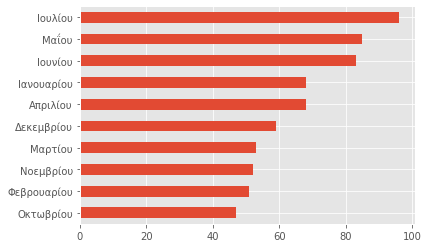

In [103]:
Syriza['Month'].value_counts().head(10).sort_values().plot(kind='barh')

In [104]:
Syr_df['text'] = Syr_df ['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


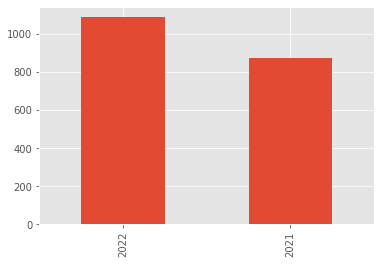

In [105]:
Syr_df['Year'].value_counts().plot(kind='bar')

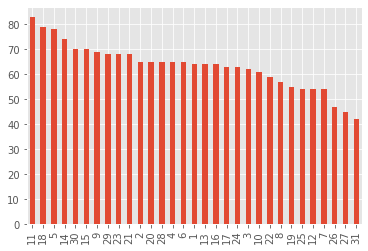

In [106]:
Syr_df['Day'].value_counts().plot(kind='bar')

In [107]:
Syr_df[Syr_df['Month'] == 'δημοσκοπική']

Empty DataFrame
Columns: [Unnamed: 0, Title, Datetime, Href, text, Keywords, Year, Month, Day, Time, Date]
Index: []

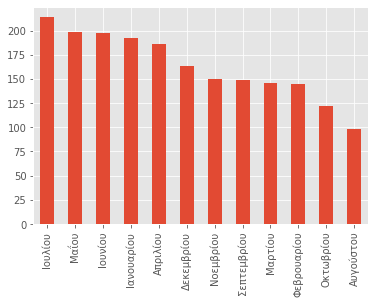

In [108]:

Syr_df['Month'].value_counts().plot(kind='bar')


In [109]:
Keywords_data = Syr_df.groupby(['Keywords']).count()['Title'].sort_values(ascending=False)


day_data = Syr_df.groupby(['Day']).count()['Keywords']
(day_data,Keywords_data)

(Day
 1     64
 2     65
 3     62
 4     65
 5     78
 6     65
 7     54
 8     57
 9     69
 10    61
 11    83
 12    54
 13    64
 14    74
 15    70
 16    64
 17    63
 18    79
 19    55
 20    65
 21    68
 22    59
 23    68
 24    63
 25    54
 26    47
 27    45
 28    65
 29    68
 30    70
 31    42
 Name: Keywords, dtype: int64, Keywords
 ΣΥ.ΡΙΖ.Α.               746
 ΑΛΕΞΗΣ ΤΣΙΠΡΑΣ          269
 ΝΑΣΟΣ ΗΛΙΟΠΟΥΛΟΣ        116
 ΒΟΥΛΗ                    72
 ΚΥΡΙΑΚΟΣ ΜΗΤΣΟΤΑΚΗΣ      42
                        ... 
 ΚΑΚΟΚΑΙΡΙΑ ΜΠΑΛΛΟΣ        1
 ΙΩΑΝΝΗΣ ΜΠΟΥΡΝΟΥΣ         1
 ΘΕΟΦΙΛΟΣ ΞΑΝΘΟΠΟΥΛΟΣ      1
 ΘΕΟΔΩΡΟΣ ΛΙΒΑΝΙΟΣ         1
 ΧΡΥΣΗ ΑΥΓΗ                1
 Name: Title, Length: 201, dtype: int64)

In [110]:
Keywords_data.head(13)
keywords_data = Keywords_data.head(13)
keywords_data


Keywords
ΣΥ.ΡΙΖ.Α.              746
ΑΛΕΞΗΣ ΤΣΙΠΡΑΣ         269
ΝΑΣΟΣ ΗΛΙΟΠΟΥΛΟΣ       116
ΒΟΥΛΗ                   72
ΚΥΡΙΑΚΟΣ ΜΗΤΣΟΤΑΚΗΣ     42
ΝΕΑ ΔΗΜΟΚΡΑΤΙΑ          38
ΕΦΗ ΑΧΤΣΙΟΓΛΟΥ          27
ΓΙΑΝΝΗΣ ΟΙΚΟΝΟΜΟΥ       24
ΝΙΚΟΛΑΟΣ ΦΙΛΗΣ          24
ΑΛΕΞΗΣ ΧΑΡΙΤΣΗΣ         24
ΣΥΝΕΔΡΙΟ ΣΥΡΙΖΑ         23
ΑΚΡΙΒΕΙΑ                23
ΚΥΒΕΡΝΗΣΗ               21
Name: Title, dtype: int64

In [111]:
day_data.head(31)
Day_data = day_data.head(31)
Day_data


Day
1     64
2     65
3     62
4     65
5     78
6     65
7     54
8     57
9     69
10    61
11    83
12    54
13    64
14    74
15    70
16    64
17    63
18    79
19    55
20    65
21    68
22    59
23    68
24    63
25    54
26    47
27    45
28    65
29    68
30    70
31    42
Name: Keywords, dtype: int64

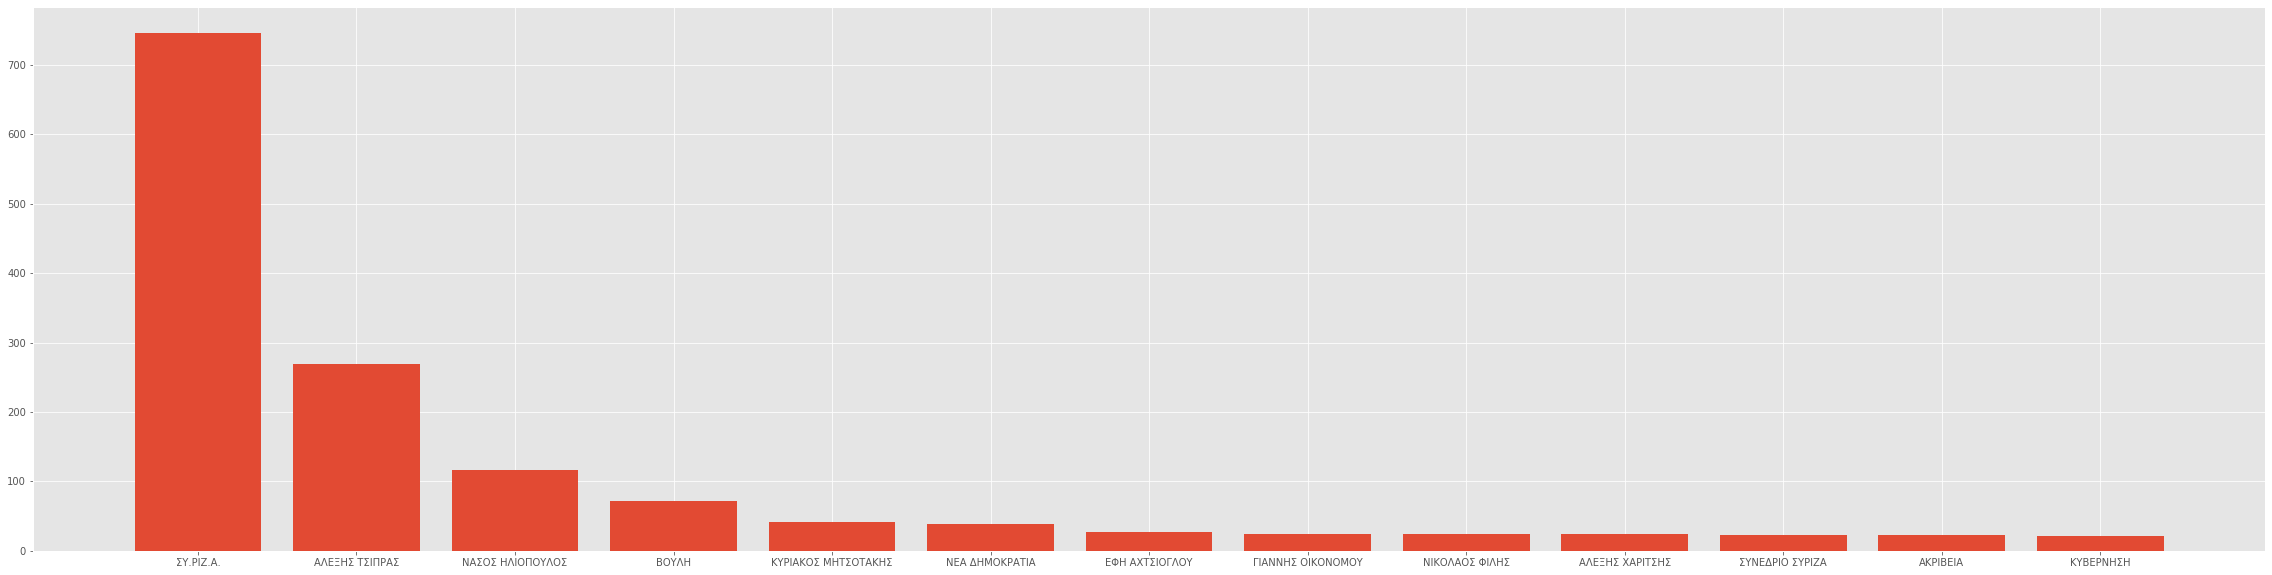

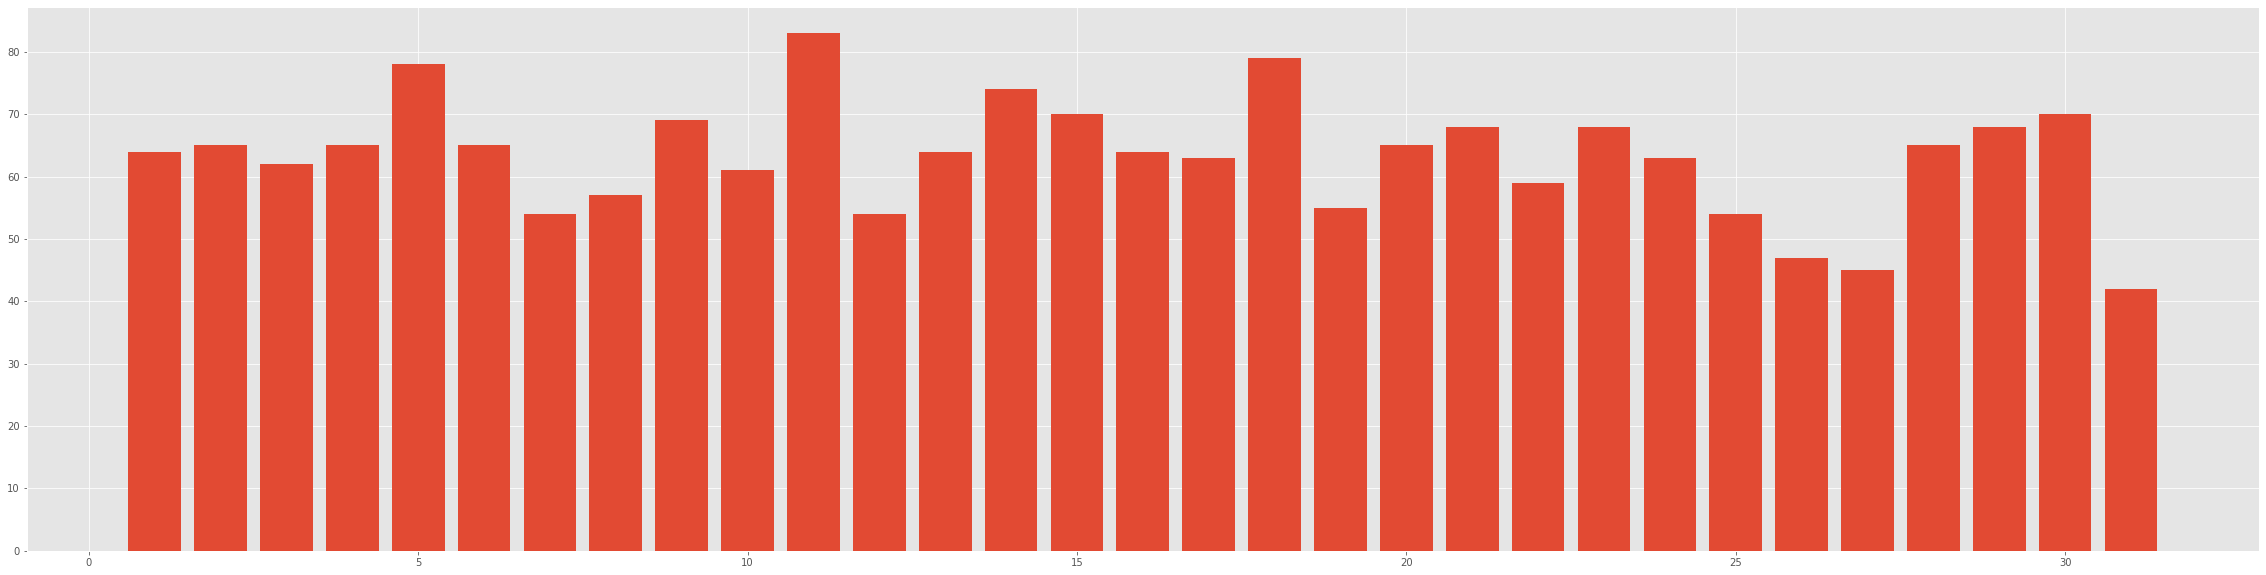

In [112]:
plt.figure(figsize=(40,10))
plt.bar(keywords_data.keys(),keywords_data,)
plt.show()

plt.figure(figsize=(40,10))
plt.bar(Day_data.keys(),Day_data,)
plt.show()

# Wordcloud Syriza

In [113]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from wordcloud import WordCloud
from collections import Counter
from nltk.util import ngrams
import spacy
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [114]:
!python -m spacy download el_core_news_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/explosion/spacy-models/releases/download/el_core_news_sm-3.3.0/el_core_news_sm-3.3.0-py3-none-any.whl (12.6 MB)
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')


In [115]:
nlp = spacy.load('el_core_news_sm')
list(nlp.Defaults.stop_words)[0:20]

['αντίς',
 'προτού',
 'ετέρων',
 'τούτης',
 'πριν',
 'δικός',
 'μόνους',
 'δια',
 'όλες',
 'τάχατε',
 'έκανε',
 'οποιασδήποτε',
 'ποιοί',
 'έτερους',
 'κοντά',
 'τέτοια',
 'κάπου',
 'οσοιδήποτε',
 'ακόμη',
 'οποίες']

In [116]:
list(STOPWORDS)[0:20]

['who',
 'you',
 "who's",
 'which',
 'do',
 "can't",
 "hadn't",
 'both',
 'why',
 'i',
 'themselves',
 'am',
 'also',
 "won't",
 "we've",
 'himself',
 'yours',
 'herself',
 "couldn't",
 "he'd"]

In [117]:
text = Syr_df['text'].str.cat(sep = '.').replace('.','').strip()
text = text.replace('amp','').strip()
text = text.replace('rt','').strip()
text = text.replace('\n','').strip()
text = text.replace(':','').strip()
text

'Απουσία παθολόγου και αναισθησιολόγου κατήγγειλαν οι εργαζόμενοι του νοσοκομείου της Ικαρίας στον πρόεδρο του ΣΥΡΙΖΑ-ΠΣ “Αν ήσασταν κάτοικος εδώ στο νησί θα περιμένατε για συνταγογράφηση πολύ καιρό""Πολιτικό απατεώνα" χαρακτηρίζει ο ΣΥΡΙΖΑ τον υπουργό Ανάπτυξης με αφορμή την τιμητική πολιτογράφηση πολίτη του ψευδοκράτους με συστατική επιστολή τουΠοια καίρια ζητήματα έθιξαν τα κόμματα αυτή την εβδομάδα; Τι βρέθηκε στο επίκεντρο του πολιτικού ενδιαφέροντός τους;Νέα επίθεση του προέδρου του ΣΥΡΙΖΑ στον πρωθυπουργό Τον κατηγόρησε για "σχέδιο εξαπάτησης των πολιτών" και ότι παριστάνει τον υπεύθυνοΜε τη νέα σύμβαση με ΤΡΑΙΝΟΣΕ, επιστρέφουν 453 εκ ευρώ στο Δημόσιο ως επενδύσεις- Στα 2 δισ ευρώ το συνολικό όφελος, σημειώνει ο υπουργός Υποδομών και ΜεταφορώνΣτην τελική ευθεία η εξυγίανση των Ναυπηγείων Ελευσίνας καθώς από χθες είναι σε διαβούλευση το σχέδιο νόμου Για το "δυσκολότερο πράγμα που έχει κάνει ποτέ" στο υπουργείο Ανάπτυξης έκανε λόγο Άδωνις ΓεωργιάδηςΕφη Αχτσιόγλου και Αλέξης Χαρίτσ

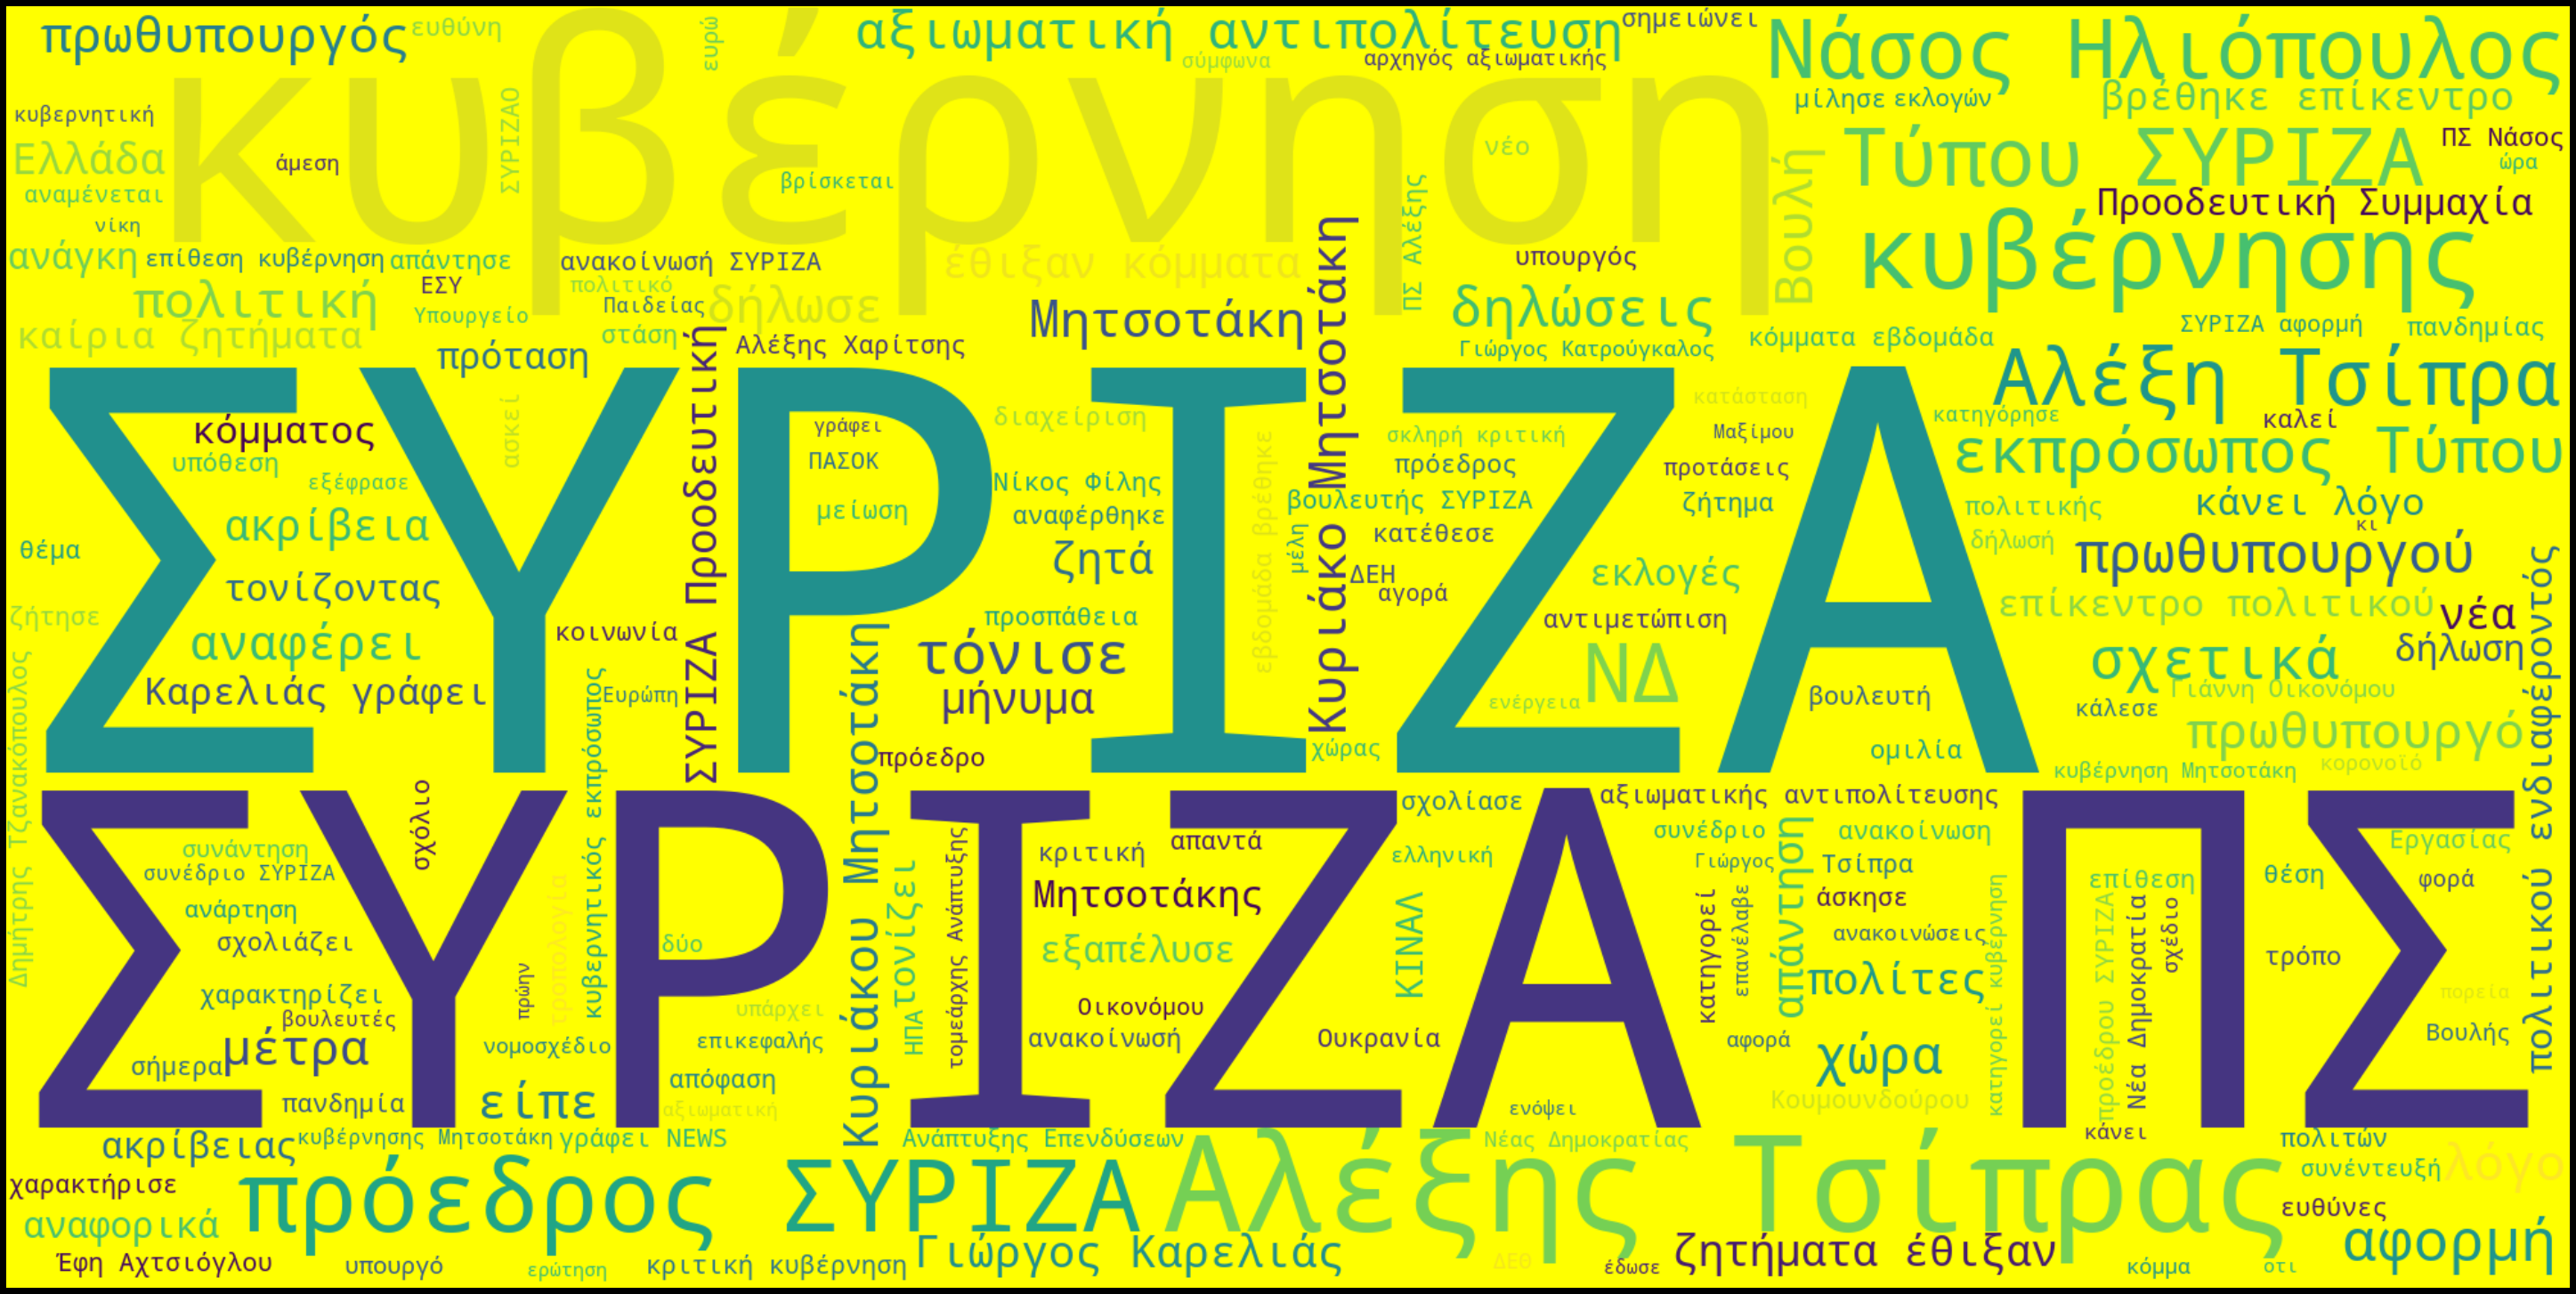

In [118]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'yellow'
 ).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [119]:
word_count = Counter(" ".join(Syr_df["text"]).split())
word_count = {word.lower() : count for word, count in word_count.items() if not word.lower() in STOPWORDS}
word_count = pd.DataFrame(data={
    'word': word_count.keys(),
    'count': word_count.values()
})

word_count.sort_values('count',ascending=False).head(15)

word  count
7          του   2066
9          της   1254
90        στην    602
30      συριζα    526
107        που    471
65         των    442
29           ο    412
93           η    178
261    τσίπρας    156
137    συριζα.    151
131  μητσοτάκη    142
420    συριζα,    128
22         για    125
487      νάσος    121
224      τύπου    111

In [120]:
from collections import Counter
Counter(" ".join(Syr_df["text"]).split()).most_common(50)

[('του', 2066),
 ('της', 1254),
 ('την', 1218),
 ('για', 1210),
 ('και', 1110),
 ('ο', 1075),
 ('το', 657),
 ('με', 639),
 ('στην', 602),
 ('η', 556),
 ('ΣΥΡΙΖΑ', 526),
 ('να', 520),
 ('τον', 486),
 ('που', 471),
 ('των', 442),
 ('από', 427),
 ('Ο', 412),
 ('στο', 380),
 ('τη', 378),
 ('τις', 355),
 ('τα', 346),
 ('σε', 333),
 ('κυβέρνηση', 283),
 ('Αλέξης', 267),
 ('στη', 216),
 ('στον', 206),
 ('ότι', 194),
 ('τους', 190),
 ('θα', 181),
 ('Η', 178),
 ('κατά', 174),
 ('δεν', 162),
 ('Τσίπρας', 156),
 ('οι', 155),
 ('ΣΥΡΙΖΑ.', 151),
 ('Μητσοτάκη', 142),
 ('κυβέρνησης', 136),
 ('στις', 129),
 ('πρόεδρος', 128),
 ('ΣΥΡΙΖΑ,', 128),
 ('Για', 125),
 ('Νάσος', 121),
 ('είναι', 118),
 ('Τι', 112),
 ('Τύπου', 111),
 ('Αλέξη', 109),
 ('ΣΥΡΙΖΑ-ΠΣ', 105),
 ('λόγο', 103),
 ('πως', 100),
 ('μετά', 100)]

In [121]:
for word in nlp.Defaults.stop_words:
  print(word)
  break

αντίς


In [122]:
Syr_df['text_no_stopwords'] = Syr_df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (nlp.Defaults.stop_words) and word != ':' and word != '\n' and word != "amp" and word != 'rt' and word != ',']))
Syr_df['text_no_stopwords'] = Syr_df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (nlp.Defaults.stop_words)]))
Syr_df['clean_text_no_stopwords'] = Syr_df['text']
#for stopword in nlp.Defaults.stop_words:
Syr_df['clean_text_no_stopwords'] = Syr_df['clean_text_no_stopwords'].apply(lambda x: ' '.join([word for word in x.split() if word not in nlp.Defaults.stop_words and word != "ή" and word != "ία" and word != "κι"]))
Syr_df['clean_text_no_stopwords'] = Syr_df['clean_text_no_stopwords'].apply(lambda x: x.replace("amp", "").strip())
Syr_df['clean_text_no_stopwords'] = Syr_df['clean_text_no_stopwords'].apply(lambda x: x.replace("rt", "").strip())
Syr_df['clean_text_no_stopwords'] = Syr_df['clean_text_no_stopwords'].apply(lambda x: x.replace(":", "").strip())
Syr_df['clean_text_no_stopwords'] = Syr_df['clean_text_no_stopwords'].apply(lambda x: x.replace(",", "").strip())
Syr_df['clean_text_no_stopwords'] = Syr_df['clean_text_no_stopwords'].apply(lambda x: x.replace("\n", "").strip())
Syr_df['clean_text_no_stopwords'] = Syr_df['clean_text_no_stopwords'].apply(lambda x: x.replace(".", "").strip())

In [123]:
freq = Counter(" ".join(Syr_df["clean_text_no_stopwords"]).split()).most_common(16)
freq

[('ΣΥΡΙΖΑ', 806),
 ('Ο', 412),
 ('κυβέρνηση', 327),
 ('Αλέξης', 267),
 ('Τσίπρας', 249),
 ('ΣΥΡΙΖΑ-ΠΣ', 202),
 ('Μητσοτάκη', 188),
 ('Η', 178),
 ('κυβέρνησης', 166),
 ('πρόεδρος', 128),
 ('Ηλιόπουλος', 128),
 ('Τσίπρα', 128),
 ('Για', 125),
 ('Νάσος', 121),
 ('Τύπου', 113),
 ('Τι', 112)]

In [124]:
import numpy as np


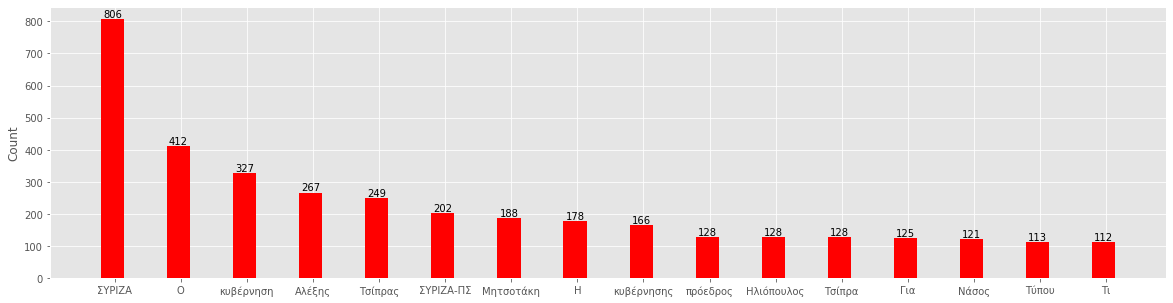

In [125]:
names, values = zip(*freq)
# names = [x[0] for x in data]  # These two lines are equivalent to the the zip-command.
# values = [x[1] for x in data] # These two lines are equivalent to the the zip-command.

ind = np.arange(len(freq))  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots(figsize=(20,5))
rects1 = ax.bar(ind, values, width, color='r')
# add some text for labels, title and axes ticks
ax.set_ylabel('Count')
ax.set_xticks(ind+width/10.)
ax.set_xticklabels(names)

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)

plt.show()

In [126]:
Syr_df.resample(rule='D',on='Date').count()

Unnamed: 0  Title  Datetime  Href  text  Keywords  Year  Month  \
Date                                                                         
2021-06-23           1      1         1     1     1         1     1      1   
2021-06-24           5      5         5     5     5         5     5      5   
2021-06-25           6      6         6     6     6         6     6      6   
2021-06-26           3      3         3     3     3         3     3      3   
2021-06-27           1      1         1     1     1         1     1      1   
...                ...    ...       ...   ...   ...       ...   ...    ...   
2022-07-06          10     10        10    10    10        10    10     10   
2022-07-07           5      5         5     5     5         5     5      5   
2022-07-08           5      5         5     5     5         5     5      5   
2022-07-09           3      3         3     3     3         3     3      3   
2022-07-10           1      1         1     1     1         1     1      1   

            Day  Time  Date  text_no_stopwords  clean_text_no_stopwords  
Date                                                                     
2021-06-23    1     1     1                  1                        1  
2021-06-24    5     5     5                  5                        5  
2021-06-25    6     6     6                  6                        6  
2021-06-26    3     3     3                  3                        3  
2021-06-27    1     1     1                  1                        1  
...         ...   ...   ...                ...                      ...  
2022-07-06   10    10    10                 10                       10  
2022-07-07    5     5     5                  5                        5  
2022-07-08    5     5     5                  5                        5  
2022-07-09    3     3     3                  3                        3  
2022-07-10    1     1     1                  1                        1  

[383 rows x 13 columns]

# Vectorizing Syriza

In [127]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [128]:
count_vector = cv.fit_transform(Syr_df['text'])

In [129]:
count_vector.shape

(1960, 7742)

In [130]:
cv.get_feature_names()

results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


00  000  05  10  100  101  110  115  11μήνου  12  ...  ύλη  ύλης  ύποπτος  \
0   0    0   0   0    0    0    0    0        0   0  ...    0     0        0   
1   0    0   0   0    0    0    0    0        0   0  ...    0     0        0   
2   0    0   0   0    0    0    0    0        0   0  ...    0     0        0   
3   0    0   0   0    0    0    0    0        0   0  ...    0     0        0   
4   0    0   0   0    0    0    0    0        0   0  ...    0     0        0   

   ύστερης  ύψη  ώθηση  ώρα  ώρες  ώς  ώστε  
0        0    0      0    0     0   0     0  
1        0    0      0    0     0   0     0  
2        0    0      0    0     0   0     0  
3        0    0      0    0     0   0     0  
4        0    0      0    0     0   0     0  

[5 rows x 7742 columns]

In [131]:
#cv.vocabulary_

In [132]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95)

In [133]:
count_vector = cv.fit_transform(Nd_df['Leadtext'])

In [134]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


24  news  novartis  έδωσε  έθιξαν  ακρίβειας  αλέξη  αλέξης  αλλαγής  \
0   0     0         0      0       1          0      0       0        0   
1   0     0         0      0       0          0      0       0        0   
2   0     0         0      0       0          0      0       0        0   
3   0     0         0      0       0          0      0       0        0   
4   0     0         0      0       0          0      0       0        0   

   ανάπτυξης  ...  υγείας  υπουργείο  υπουργού  υπουργός  υπόθεση  υφυπουργός  \
0          0  ...       0          0         0         0        0           0   
1          0  ...       0          0         0         0        0           0   
2          0  ...       0          0         0         0        0           0   
3          0  ...       0          0         0         0        0           0   
4          0  ...       0          0         1         0        0           0   

   χθες  χρόνια  χώρα  ψήφο  
0     0       0     0     0  
1     0       0     0     0  
2     0       0     0     0  
3     1       0     0     0  
4     0       0     0     0  

[5 rows x 171 columns]

In [135]:
from html import unescape
def my_tokenizer(doc):
            
    # apply the preprocessing and tokenzation steps
    doc_clean = unescape(doc).lower()
    tokens = nlp(doc_clean)
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]
            
    # use CountVectorizer's _word_ngrams built in method
    # to remove stop words and extract n-grams
    return(lemmatized_tokens)

In [136]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(Syr_df['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έκασε ο', 'έτερα', 'έτερων', 'ήσω', 'ίσιος', 'αλλιώ', 'αλλιώτικος', 'αλλοιώ', 'αρκετός', 'γίνομαι', 'γρήγορο', 'διο', 'είχος', 'εαυτής', 'εαυτός', 'εκάστος', 'επόμενος', 'εσένος', 'ετέραις', 'ετού', 'ετούε ο', 'εχτής', 'ιδίο', 'κάνενς', 'κάνω', 'κανενό', 'λοιπός', 'μέλλω', 'μερικός', 'μπορώ', 'μόνας', 'ολωσδιόλος', 'ορισμένος', 'οριόμενσς', 'ποία', 'πολύς', 'προτός', 'προχτής', 'σε ο', 'ταύ', 'τουλάχισε ο', 'τρίτος', 'τός', 'χωριστό'] not in stop_words.
  % sorted(inconsistent)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


24/7  news  ΗΠΑ  άμεσος  άσκησε  έθιξαν  έφη  αγορά  αιχμή  ακρίβεια  ...  \
0     0     0    0       0       0       0    0      0      0         0  ...   
1     0     0    0       0       0       0    0      0      0         0  ...   
2     0     0    0       0       0       1    0      0      0         0  ...   
3     0     0    0       0       0       0    0      0      0         0  ...   
4     0     0    0       0       0       0    0      0      0         0  ...   

   υπάρχω  υπουργείο  υπουργός  υπόθεση  φίλη  χαρίτση  χαρακτηρίζω  χρήστος  \
0       0          0         0        0     0        0            0        0   
1       0          0         1        0     0        0            1        0   
2       0          0         0        0     0        0            0        0   
3       0          0         0        0     0        0            0        0   
4       0          0         1        0     0        0            0        0   

   χρόνος  χώρα  
0       0     0  
1       0     0  
2       0     0  
3       0     0  
4       0     0  

[5 rows x 208 columns]

In [137]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20) #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(Syr_df['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


αλέξη  αλέξης  ανακοίνωσή  γράφει  εκπρόσωπος  επίθεση  ηλιόπουλος  \
0      0       0           0       0           0        0           0   
1      0       0           0       0           0        0           0   
2      0       0           0       0           0        0           0   
3      0       0           0       0           0        1           0   
4      0       0           0       0           0        0           0   

   κριτική  κυβέρνηση  κυβέρνησης  λόγο  μητσοτάκη  νάσος  νδ  πρόεδρος  πς  \
0        0          0           0     0          0      0   0         0   1   
1        0          0           0     0          0      0   0         0   0   
2        0          0           0     0          0      0   0         0   0   
3        0          0           0     0          0      0   0         0   0   
4        0          0           0     0          0      0   0         0   0   

   συριζα  τσίπρα  τσίπρας  τύπου  
0       1       0        0      0  
1       1       0        0      0  
2       0       0        0      0  
3       1       0        0      0  
4       0       0        0      0

In [138]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, token_pattern = '\\bσυρ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(Syr_df['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


συρίγου  συρεγγέλα  συρζα  συριζα  συρρίκνωσή  συρρίκνωση
0        0          0      0       1           0           0
1        0          0      0       1           0           0
2        0          0      0       0           0           0
3        0          0      0       1           0           0
4        0          0      0       0           0           0

In [139]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, ngram_range=(2, 2) ) #token_pattern = '\\bσυρ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(Syr_df['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


έθιξαν κόμματα  αλέξη τσίπρα  αλέξης τσίπρας  αλέξης χαρίτσης  \
0               0             0               0                0   
1               0             0               0                0   
2               1             0               0                0   
3               0             0               0                0   
4               0             0               0                0   

   αξιωματική αντιπολίτευση  αξιωματικής αντιπολίτευσης  βρέθηκε επίκεντρο  \
0                         0                           0                  0   
1                         0                           0                  0   
2                         0                           0                  1   
3                         0                           0                  0   
4                         0                           0                  0   

   γιώργος καρελιάς  εκπρόσωπος τύπου  επίκεντρο πολιτικού  κάνει λόγο  \
0                 0                 0                    0           0   
1                 0                 0                    0           0   
2                 0                 0                    1           0   
3                 0                 0                    0           0   
4                 0                 0                    0           0   

   κυριάκο μητσοτάκη  κυριάκου μητσοτάκη  νάσος ηλιόπουλος  \
0                  0                   0                 0   
1                  0                   0                 0   
2                  0                   0                 0   
3                  0                   0                 0   
4                  0                   0                 0   

   πολιτικού ενδιαφέροντός  προοδευτική συμμαχία  πρόεδρος συριζα  \
0                        0                     0                0   
1                        0                     0                0   
2                        1                     0                0   
3                        0                     0                0   
4                        0                     0                0   

   συριζα προοδευτική  συριζα πς  τύπου συριζα  
0                   0          1             0  
1                   0          0             0  
2                   0          0             0  
3                   0          0             0  
4                   0          0             0

In [140]:
results.sum(axis =0).sort_values(ascending = False)


συριζα πς                     241
αλέξης τσίπρας                226
νάσος ηλιόπουλος              121
πρόεδρος συριζα               116
αλέξη τσίπρα                  103
τύπου συριζα                   97
εκπρόσωπος τύπου               82
αξιωματική αντιπολίτευση       70
κυριάκο μητσοτάκη              56
αξιωματικής αντιπολίτευσης     49
κυριάκου μητσοτάκη             48
γιώργος καρελιάς               45
προοδευτική συμμαχία           43
συριζα προοδευτική             43
αλέξης χαρίτσης                41
έθιξαν κόμματα                 40
πολιτικού ενδιαφέροντός        40
επίκεντρο πολιτικού            40
βρέθηκε επίκεντρο              40
κάνει λόγο                     40
dtype: int64

In [141]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head()

συριζα πς           241
αλέξης τσίπρας      226
νάσος ηλιόπουλος    121
πρόεδρος συριζα     116
αλέξη τσίπρα        103
dtype: int64

In [142]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, #ngram_range=(1, 2), 
 #                    token_pattern = '(\\bδ[οω]ρ[οω]ν[α-ωά-ώ]+\\b') )\| (\\bκ[α-ωά-ώ]\\b) #, tokenizer=my_tokenizer)
                     token_pattern = '\\bn[a-z0-9-_]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(Syr_df['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


news  novartis
0     0         0
1     0         0
2     0         0
3     0         0
4     0         0

In [143]:
results.sum(axis =0).sort_values(ascending = False)

news        36
novartis    20
dtype: int64

In [144]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, #ngram_range=(1, 2), 
                     vocabulary = ['συριζα', 'εκλογες', 'πολεμος']) #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(Syr_df['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


συριζα  εκλογες  πολεμος
0       1        0        0
1       1        0        0
2       0        0        0
3       1        0        0
4       0        0        0

In [145]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [146]:
tfidf_vectorizer = TfidfVectorizer(stop_words= nlp.Defaults.stop_words, max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(Syr_df['text'])  #finds the tfidf score with normalization

In [147]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


000  15ης  2015   24   3ο   50  800  facebook  lockdown  news  ...  \
0  0.0   0.0   0.0  0.0  0.0  0.0  0.0       0.0       0.0   0.0  ...   
1  0.0   0.0   0.0  0.0  0.0  0.0  0.0       0.0       0.0   0.0  ...   
2  0.0   0.0   0.0  0.0  0.0  0.0  0.0       0.0       0.0   0.0  ...   
3  0.0   0.0   0.0  0.0  0.0  0.0  0.0       0.0       0.0   0.0  ...   
4  0.0   0.0   0.0  0.0  0.0  0.0  0.0       0.0       0.0   0.0  ...   

   χατζηδάκη  χειρισμούς  χθες  χρήστος  χρόνια  χώρα  χώρας  ψέματα  \
0        0.0         0.0   0.0      0.0     0.0   0.0    0.0     0.0   
1        0.0         0.0   0.0      0.0     0.0   0.0    0.0     0.0   
2        0.0         0.0   0.0      0.0     0.0   0.0    0.0     0.0   
3        0.0         0.0   0.0      0.0     0.0   0.0    0.0     0.0   
4        0.0         0.0   0.0      0.0     0.0   0.0    0.0     0.0   

   ψηφοφορία  ώρα  
0        0.0  0.0  
1        0.0  0.0  
2        0.0  0.0  
3        0.0  0.0  
4        0.0  0.0  

[5 rows x 500 columns]

In [148]:
from sklearn.metrics.pairwise import cosine_similarity

print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))  #here the first element of tfidf_matrix_train is matched with other three elements

cosine scores ==>  [[1.         0.01896428 0.         ... 0.01831592 0.         0.02043889]]


In [149]:
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train, tfidf_matrix_train))  #here the first element of tfidf_matrix_train is matched with other three elements

cosine scores ==>  [[1.         0.01896428 0.         ... 0.01831592 0.         0.02043889]
 [0.01896428 1.         0.         ... 0.01585395 0.         0.01769155]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.01831592 0.01585395 0.         ... 1.         0.         0.01708671]
 [0.         0.         0.         ... 0.         1.         0.04610108]
 [0.02043889 0.01769155 0.         ... 0.01708671 0.04610108 1.        ]]


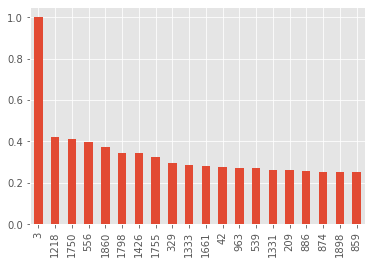

In [150]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)
pd.DataFrame(arr).loc[3].sort_values(ascending = False).head(20).plot(kind = 'bar')

In [151]:
Syr_df['text'].loc[3]

'Νέα επίθεση του προέδρου του ΣΥΡΙΖΑ στον πρωθυπουργό. Τον κατηγόρησε για "σχέδιο εξαπάτησης των πολιτών" και ότι παριστάνει τον υπεύθυνο.'

In [152]:
Syr_df['text'].loc[253]

'Ο Νίκος Φίλης επανέλαβε-με αφορμή τα επεισόδια στο Αριστοτέλειο Πανεπιστήμιο-ότι μία πιθανή μελλοντική κυβέρνηση θα επαναφέρει το κυβερνητικό άσυλο. '

# Emolex Syriza

In [153]:
filepath = "https://raw.githubusercontent.com/datajour-gr/Data_journalism/master/week10/NRC_GREEK_Translated_6_2020.csv"
emolex_df = pd.read_csv(filepath)
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(drop = True, inplace = True)
emolex_df

word  Positive  Negative  Anger  Anticipation  Disgust  \
0                αφεση       1.0       0.0    0.0           0.0      0.0   
1      ενορκη βεβαιωση       0.0       0.0    0.0           0.0      0.0   
2              εχοντας       0.0       0.0    0.0           0.0      0.0   
3                  εχω       0.0       0.0    0.0           0.0      0.0   
4                 οριο       0.0       0.0    0.0           0.0      0.0   
...                ...       ...       ...    ...           ...      ...   
13156        ουρλιασμα       0.0       1.0    1.0           0.0      0.0   
13157     κροκος αυγου       0.0       0.0    0.0           0.0      0.0   
13158         νεοτερος       1.0       0.0    0.0           0.0      0.0   
13159          ζεφυρος       0.0       0.0    0.0           0.0      0.0   
13160             ζουμ       0.0       0.0    0.0           0.0      0.0   

       Fear  Joy  Sadness  Surprise  Trust  
0       0.0  0.0      0.0       0.0    0.0  
1       0.0  0.0      0.0       0.0    0.0  
2       0.0  0.0      0.0       0.0    0.0  
3       0.0  0.0      0.0       0.0    0.0  
4       0.0  0.0      0.0       0.0    0.0  
...     ...  ...      ...       ...    ...  
13156   1.0  0.0      0.0       1.0    0.0  
13157   0.0  0.0      0.0       0.0    0.0  
13158   0.0  0.0      0.0       0.0    0.0  
13159   0.0  0.0      0.0       0.0    0.0  
13160   0.0  0.0      0.0       0.0    0.0  

[13161 rows x 11 columns]

In [154]:
import spacy
nlp = spacy.load('el_core_news_sm')

In [155]:
Syr_df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/syriza.tsv", sep='\t')
Syr_df

Unnamed: 0                                              Title  \
0              0  Ικαρία: Καταγγελίες για δραματικές ελλείψεις σ...   
1              1  ΣΥΡΙΖΑ: "Πολιτογράφηση πολίτη του ψευδοκράτους...   
2              2  Μια ανασκόπηση όσων διαδραματίστηκαν την εβδομ...   
3              3  Τσίπρας από Ικαρία: "Να απαλλαγούμε από το ζόφ...   
4              4  Κώστας Καραμανλής: "Διορθώνουμε την προβληματι...   
...          ...                                                ...   
1955        1955  Τσίπρας στο PES: Σαν να μην μάθαμε τίποτα από ...   
1956        1956  Τσίπρας στο PES: Αγωνιζόμαστε για μια Ευρώπη μ...   
1957        1957  Οι Ευρωβουλευτές της ΝΔ ψήφισαν κατά των αμβλώ...   
1958        1958  Σπίρτζης: "Να σταματήσει η χρησιμοποίηση της Ε...   
1959        1959  Κατρούγκαλος για Συμφωνία Πρεσπών: "Η καθυστέρ...   

                   Datetime  \
0     09 Ιουλίου 2022 17:19   
1     09 Ιουλίου 2022 09:35   
2     09 Ιουλίου 2022 08:17   
3     08 Ιουλίου 2022 21:19   
4     08 Ιουλίου 2022 17:06   
...                     ...   
1955  24 Ιουνίου 2021 16:47   
1956  24 Ιουνίου 2021 14:22   
1957  24 Ιουνίου 2021 11:59   
1958  24 Ιουνίου 2021 11:01   
1959  23 Ιουνίου 2021 21:38   

                                                   Href  \
0     https://www.news247.gr/politiki/ikaria-katagge...   
1     https://www.news247.gr/politiki/syriza-politog...   
2     https://www.news247.gr/politiki/mia-anaskopisi...   
3     https://www.news247.gr/politiki/tsipras-apo-ik...   
4     https://www.news247.gr/politiki/kostas-karaman...   
...                                                 ...   
1955  https://www.news247.gr/politiki/tsipras-sto-pe...   
1956  https://www.news247.gr/politiki/tsipras-sto-pe...   
1957  https://www.news247.gr/politiki/oi-eyrovoyleyt...   
1958  https://www.news247.gr/politiki/spirtzis-na-st...   
1959  https://www.news247.gr/politiki/katroygkalos-g...   

                                               Leadtext                Tag  \
0     Απουσία παθολόγου και αναισθησιολόγου κατήγγει...          ΣΥ.ΡΙΖ.Α.   
1     "Πολιτικό απατεώνα" χαρακτηρίζει ο ΣΥΡΙΖΑ τον ...          ΣΥ.ΡΙΖ.Α.   
2     Ποια καίρια ζητήματα έθιξαν τα κόμματα αυτή τη...              ΒΟΥΛΗ   
3     Νέα επίθεση του προέδρου του ΣΥΡΙΖΑ στον πρωθυ...          ΣΥ.ΡΙΖ.Α.   
4     Με τη νέα σύμβαση με ΤΡΑΙΝΟΣΕ, επιστρέφουν 453...  ΚΩΣΤΑΣ ΚΑΡΑΜΑΝΛΗΣ   
...                                                 ...                ...   
1955  Κατά της επιστροφής στην "δημοσιονομική ορθοδο...     ΑΛΕΞΗΣ ΤΣΙΠΡΑΣ   
1956  Οφείλουμε να μην αφήσουμε τις συντηρητικές δυν...     ΑΛΕΞΗΣ ΤΣΙΠΡΑΣ   
1957  Η κοινοβουλευτική ομάδα της ΝΔ ψήφισε στην Ευρ...     ΝΕΑ ΔΗΜΟΚΡΑΤΙΑ   
1958  Αιχμές κατά της ΕΛΑΣ αφήνει ο Χρήστος Σπίρτζης...   ΧΡΗΣΤΟΣ ΣΠΙΡΤΖΗΣ   
1959  "Η Κυβέρνηση πρέπει να παρακολουθεί στενά την ...          ΣΥ.ΡΙΖ.Α.   

      Year    Month  Day   Time                 Date  
0     2022  Ιουλίου    9  17:19  2022-07-09 17:19:00  
1     2022  Ιουλίου    9  09:35  2022-07-09 09:35:00  
2     2022  Ιουλίου    9  08:17  2022-07-09 08:17:00  
3     2022  Ιουλίου    8  21:19  2022-07-08 21:19:00  
4     2022  Ιουλίου    8  17:06  2022-07-08 17:06:00  
...    ...      ...  ...    ...                  ...  
1955  2021  Ιουνίου   24  16:47  2021-06-24 16:47:00  
1956  2021  Ιουνίου   24  14:22  2021-06-24 14:22:00  
1957  2021  Ιουνίου   24  11:59  2021-06-24 11:59:00  
1958  2021  Ιουνίου   24  11:01  2021-06-24 11:01:00  
1959  2021  Ιουνίου   23  21:38  2021-06-23 21:38:00  

[1960 rows x 11 columns]

In [156]:
Syr_df.dtypes

Unnamed: 0     int64
Title         object
Datetime      object
Href          object
Leadtext      object
Tag           object
Year           int64
Month         object
Day            int64
Time          object
Date          object
dtype: object

In [157]:
# Syr_df['Year'] = Syr_df.Datetime.apply(lambda dt: dt.split(' ')[2])
# Syr_df['Month'] = Syr_df.Datetime.apply(lambda dt: dt.split(' ')[1])
# Syr_df['Day'] = Syr_df.Datetime.apply(lambda dt: dt.split(' ')[0])
# Syr_df['Time'] = Syr_df.Datetime.apply(lambda dt: dt.split(' ')[3])

# months = {
#     'Ιανουαρίου' : '01',
#     'Φεβρουαρίου' : '02', 
#     'Μαρτίου' : '03',
#     'Απριλίου' : '04',
#     'Μαΐου' : '05',
#     'Ιουνίου': '06',
#     'Ιουλίου' : '07',
#     'Αυγούστου' : '08',
#     'Σεπτεμβρίου' : '09',
#     'Οκτωβρίου' : '10',
#     'Νοεμβρίου' : '11',
#     'Δεκεμβρίου' : '12',
     
# }

# Syr_df['Date'] = Syr_df.apply(lambda row: f'{months[row.Month]}/{row.Day}/{row.Year} {row.Time}', axis='columns',result_type='expand')
Syr_df['Date'] = pd.to_datetime(Syr_df['Date'])


Syr_df

Unnamed: 0                                              Title  \
0              0  Ικαρία: Καταγγελίες για δραματικές ελλείψεις σ...   
1              1  ΣΥΡΙΖΑ: "Πολιτογράφηση πολίτη του ψευδοκράτους...   
2              2  Μια ανασκόπηση όσων διαδραματίστηκαν την εβδομ...   
3              3  Τσίπρας από Ικαρία: "Να απαλλαγούμε από το ζόφ...   
4              4  Κώστας Καραμανλής: "Διορθώνουμε την προβληματι...   
...          ...                                                ...   
1955        1955  Τσίπρας στο PES: Σαν να μην μάθαμε τίποτα από ...   
1956        1956  Τσίπρας στο PES: Αγωνιζόμαστε για μια Ευρώπη μ...   
1957        1957  Οι Ευρωβουλευτές της ΝΔ ψήφισαν κατά των αμβλώ...   
1958        1958  Σπίρτζης: "Να σταματήσει η χρησιμοποίηση της Ε...   
1959        1959  Κατρούγκαλος για Συμφωνία Πρεσπών: "Η καθυστέρ...   

                   Datetime  \
0     09 Ιουλίου 2022 17:19   
1     09 Ιουλίου 2022 09:35   
2     09 Ιουλίου 2022 08:17   
3     08 Ιουλίου 2022 21:19   
4     08 Ιουλίου 2022 17:06   
...                     ...   
1955  24 Ιουνίου 2021 16:47   
1956  24 Ιουνίου 2021 14:22   
1957  24 Ιουνίου 2021 11:59   
1958  24 Ιουνίου 2021 11:01   
1959  23 Ιουνίου 2021 21:38   

                                                   Href  \
0     https://www.news247.gr/politiki/ikaria-katagge...   
1     https://www.news247.gr/politiki/syriza-politog...   
2     https://www.news247.gr/politiki/mia-anaskopisi...   
3     https://www.news247.gr/politiki/tsipras-apo-ik...   
4     https://www.news247.gr/politiki/kostas-karaman...   
...                                                 ...   
1955  https://www.news247.gr/politiki/tsipras-sto-pe...   
1956  https://www.news247.gr/politiki/tsipras-sto-pe...   
1957  https://www.news247.gr/politiki/oi-eyrovoyleyt...   
1958  https://www.news247.gr/politiki/spirtzis-na-st...   
1959  https://www.news247.gr/politiki/katroygkalos-g...   

                                               Leadtext                Tag  \
0     Απουσία παθολόγου και αναισθησιολόγου κατήγγει...          ΣΥ.ΡΙΖ.Α.   
1     "Πολιτικό απατεώνα" χαρακτηρίζει ο ΣΥΡΙΖΑ τον ...          ΣΥ.ΡΙΖ.Α.   
2     Ποια καίρια ζητήματα έθιξαν τα κόμματα αυτή τη...              ΒΟΥΛΗ   
3     Νέα επίθεση του προέδρου του ΣΥΡΙΖΑ στον πρωθυ...          ΣΥ.ΡΙΖ.Α.   
4     Με τη νέα σύμβαση με ΤΡΑΙΝΟΣΕ, επιστρέφουν 453...  ΚΩΣΤΑΣ ΚΑΡΑΜΑΝΛΗΣ   
...                                                 ...                ...   
1955  Κατά της επιστροφής στην "δημοσιονομική ορθοδο...     ΑΛΕΞΗΣ ΤΣΙΠΡΑΣ   
1956  Οφείλουμε να μην αφήσουμε τις συντηρητικές δυν...     ΑΛΕΞΗΣ ΤΣΙΠΡΑΣ   
1957  Η κοινοβουλευτική ομάδα της ΝΔ ψήφισε στην Ευρ...     ΝΕΑ ΔΗΜΟΚΡΑΤΙΑ   
1958  Αιχμές κατά της ΕΛΑΣ αφήνει ο Χρήστος Σπίρτζης...   ΧΡΗΣΤΟΣ ΣΠΙΡΤΖΗΣ   
1959  "Η Κυβέρνηση πρέπει να παρακολουθεί στενά την ...          ΣΥ.ΡΙΖ.Α.   

      Year    Month  Day   Time                Date  
0     2022  Ιουλίου    9  17:19 2022-07-09 17:19:00  
1     2022  Ιουλίου    9  09:35 2022-07-09 09:35:00  
2     2022  Ιουλίου    9  08:17 2022-07-09 08:17:00  
3     2022  Ιουλίου    8  21:19 2022-07-08 21:19:00  
4     2022  Ιουλίου    8  17:06 2022-07-08 17:06:00  
...    ...      ...  ...    ...                 ...  
1955  2021  Ιουνίου   24  16:47 2021-06-24 16:47:00  
1956  2021  Ιουνίου   24  14:22 2021-06-24 14:22:00  
1957  2021  Ιουνίου   24  11:59 2021-06-24 11:59:00  
1958  2021  Ιουνίου   24  11:01 2021-06-24 11:01:00  
1959  2021  Ιουνίου   23  21:38 2021-06-23 21:38:00  

[1960 rows x 11 columns]

In [158]:
Syr_df.dtypes

Unnamed: 0             int64
Title                 object
Datetime              object
Href                  object
Leadtext              object
Tag                   object
Year                   int64
Month                 object
Day                    int64
Time                  object
Date          datetime64[ns]
dtype: object

In [159]:
emolex_df['word'].head(3)

0              αφεση
1    ενορκη βεβαιωση
2            εχοντας
Name: word, dtype: object

In [160]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word, 
                      strip_accents = 'unicode',  
                      stop_words= nlp.Defaults.stop_words,
                      ngram_range=(1, 2))

In [161]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#CountVectorizer(stop_words='english', binary=True)
# Θέλω να ελέγξω μόνο τις λέξεις που υπάρχουν στο συναισθηματικό λεξικό

#CountVectorizer(analyzer = 'word', 
#              strip_accents = 'unicode', 
#               token_pattern='[Α-Ωα-ωΆ-Ώά-ώ]{2,}', 
#               stop_words= lc_stop_words_df['stop_w'].tolist())


matrix = vec.fit_transform(Syr_df['Leadtext'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:1323: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  "Upper case characters found in"
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια

αφεση  ενορκη βεβαιωση  εχοντας  εχω  οριο  ορμος  υδρα  αγια τραπεζα  \
0      0                0        0    0     0      0     0             0   
1      0                0        0    0     0      0     0             0   
2      0                0        0    0     0      0     0             0   
3      0                0        0    0     0      0     0             0   
4      0                0        0    0     0      0     0             0   

   αμην  απατσι  ...  κλητηριο ενταλμα  κατειργασμενος  μαγια  κιτρινο  \
0     0       0  ...                 0               0      0        0   
1     0       0  ...                 0               0      0        0   
2     0       0  ...                 0               0      0        0   
3     0       0  ...                 0               0      0        0   
4     0       0  ...                 0               0      0        0   

   κιτρινιζω  ουρλιασμα  κροκος αυγου  νεοτερος  ζεφυρος  ζουμ  
0          0          0             0         0        0     0  
1          0          0             0         0        0     0  
2          0          0             0         0        0     0  
3          0          0             0         0        0     0  
4          0          0             0         0        0     0  

[5 rows x 13161 columns]

In [162]:
wordcount_df.shape

(1960, 13161)

In [163]:
emolex_df.head()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
0            αφεση       1.0       0.0    0.0           0.0      0.0   0.0   
1  ενορκη βεβαιωση       0.0       0.0    0.0           0.0      0.0   0.0   
2          εχοντας       0.0       0.0    0.0           0.0      0.0   0.0   
3              εχω       0.0       0.0    0.0           0.0      0.0   0.0   
4             οριο       0.0       0.0    0.0           0.0      0.0   0.0   

   Joy  Sadness  Surprise  Trust  
0  0.0      0.0       0.0    0.0  
1  0.0      0.0       0.0    0.0  
2  0.0      0.0       0.0    0.0  
3  0.0      0.0       0.0    0.0  
4  0.0      0.0       0.0    0.0

In [164]:
emolex_df[emolex_df.Anger == 1].tail()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
13094      διεξοδος       0.0       0.0    1.0           0.0      0.0   0.0   
13096        ζωυφια       0.0       1.0    1.0           0.0      1.0   1.0   
13100    θυματοποιω       0.0       1.0    1.0           0.0      1.0   1.0   
13128  αποτυχημενος       0.0       1.0    1.0           0.0      1.0   0.0   
13156     ουρλιασμα       0.0       1.0    1.0           0.0      0.0   1.0   

       Joy  Sadness  Surprise  Trust  
13094  0.0      0.0       0.0    0.0  
13096  0.0      0.0       0.0    0.0  
13100  0.0      1.0       1.0    0.0  
13128  0.0      0.0       0.0    0.0  
13156  0.0      0.0       1.0    0.0

In [165]:
# Φτιάξε μια λίστα με positive words

angry_words = emolex_df[emolex_df.Anger == 1]['word']

positive_words = emolex_df[emolex_df.Positive == 1]['word']


# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']


# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']


# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']


# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']


# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']



# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']


# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']



# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']

In [166]:
Syr_df.head(3)

Unnamed: 0                                              Title  \
0           0  Ικαρία: Καταγγελίες για δραματικές ελλείψεις σ...   
1           1  ΣΥΡΙΖΑ: "Πολιτογράφηση πολίτη του ψευδοκράτους...   
2           2  Μια ανασκόπηση όσων διαδραματίστηκαν την εβδομ...   

                Datetime                                               Href  \
0  09 Ιουλίου 2022 17:19  https://www.news247.gr/politiki/ikaria-katagge...   
1  09 Ιουλίου 2022 09:35  https://www.news247.gr/politiki/syriza-politog...   
2  09 Ιουλίου 2022 08:17  https://www.news247.gr/politiki/mia-anaskopisi...   

                                            Leadtext        Tag  Year  \
0  Απουσία παθολόγου και αναισθησιολόγου κατήγγει...  ΣΥ.ΡΙΖ.Α.  2022   
1  "Πολιτικό απατεώνα" χαρακτηρίζει ο ΣΥΡΙΖΑ τον ...  ΣΥ.ΡΙΖ.Α.  2022   
2  Ποια καίρια ζητήματα έθιξαν τα κόμματα αυτή τη...      ΒΟΥΛΗ  2022   

     Month  Day   Time                Date  
0  Ιουλίου    9  17:19 2022-07-09 17:19:00  
1  Ιουλίου    9  09:35 2022-07-09 09:35:00  
2  Ιουλίου    9  08:17 2022-07-09 08:17:00

In [167]:
Syr_df['anger'] = wordcount_df[angry_words].sum(axis=1)
Syr_df['positivity'] = wordcount_df[positive_words].sum(axis=1)
Syr_df['joy'] = wordcount_df[joy_words].sum(axis=1)
Syr_df['disgust'] = wordcount_df[disgust_words].sum(axis=1)
Syr_df['surprise'] = wordcount_df[surprise_words].sum(axis=1)
Syr_df['trust'] = wordcount_df[trust_words].sum(axis=1)
Syr_df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)
Syr_df['sadness'] = wordcount_df[sadness_words].sum(axis=1)
Syr_df['negative'] = wordcount_df[negative_words].sum(axis=1)
Syr_df['fear'] = wordcount_df[fear_words].sum(axis=1)

In [168]:
Syr_df

Unnamed: 0                                              Title  \
0              0  Ικαρία: Καταγγελίες για δραματικές ελλείψεις σ...   
1              1  ΣΥΡΙΖΑ: "Πολιτογράφηση πολίτη του ψευδοκράτους...   
2              2  Μια ανασκόπηση όσων διαδραματίστηκαν την εβδομ...   
3              3  Τσίπρας από Ικαρία: "Να απαλλαγούμε από το ζόφ...   
4              4  Κώστας Καραμανλής: "Διορθώνουμε την προβληματι...   
...          ...                                                ...   
1955        1955  Τσίπρας στο PES: Σαν να μην μάθαμε τίποτα από ...   
1956        1956  Τσίπρας στο PES: Αγωνιζόμαστε για μια Ευρώπη μ...   
1957        1957  Οι Ευρωβουλευτές της ΝΔ ψήφισαν κατά των αμβλώ...   
1958        1958  Σπίρτζης: "Να σταματήσει η χρησιμοποίηση της Ε...   
1959        1959  Κατρούγκαλος για Συμφωνία Πρεσπών: "Η καθυστέρ...   

                   Datetime  \
0     09 Ιουλίου 2022 17:19   
1     09 Ιουλίου 2022 09:35   
2     09 Ιουλίου 2022 08:17   
3     08 Ιουλίου 2022 21:19   
4     08 Ιουλίου 2022 17:06   
...                     ...   
1955  24 Ιουνίου 2021 16:47   
1956  24 Ιουνίου 2021 14:22   
1957  24 Ιουνίου 2021 11:59   
1958  24 Ιουνίου 2021 11:01   
1959  23 Ιουνίου 2021 21:38   

                                                   Href  \
0     https://www.news247.gr/politiki/ikaria-katagge...   
1     https://www.news247.gr/politiki/syriza-politog...   
2     https://www.news247.gr/politiki/mia-anaskopisi...   
3     https://www.news247.gr/politiki/tsipras-apo-ik...   
4     https://www.news247.gr/politiki/kostas-karaman...   
...                                                 ...   
1955  https://www.news247.gr/politiki/tsipras-sto-pe...   
1956  https://www.news247.gr/politiki/tsipras-sto-pe...   
1957  https://www.news247.gr/politiki/oi-eyrovoyleyt...   
1958  https://www.news247.gr/politiki/spirtzis-na-st...   
1959  https://www.news247.gr/politiki/katroygkalos-g...   

                                               Leadtext                Tag  \
0     Απουσία παθολόγου και αναισθησιολόγου κατήγγει...          ΣΥ.ΡΙΖ.Α.   
1     "Πολιτικό απατεώνα" χαρακτηρίζει ο ΣΥΡΙΖΑ τον ...          ΣΥ.ΡΙΖ.Α.   
2     Ποια καίρια ζητήματα έθιξαν τα κόμματα αυτή τη...              ΒΟΥΛΗ   
3     Νέα επίθεση του προέδρου του ΣΥΡΙΖΑ στον πρωθυ...          ΣΥ.ΡΙΖ.Α.   
4     Με τη νέα σύμβαση με ΤΡΑΙΝΟΣΕ, επιστρέφουν 453...  ΚΩΣΤΑΣ ΚΑΡΑΜΑΝΛΗΣ   
...                                                 ...                ...   
1955  Κατά της επιστροφής στην "δημοσιονομική ορθοδο...     ΑΛΕΞΗΣ ΤΣΙΠΡΑΣ   
1956  Οφείλουμε να μην αφήσουμε τις συντηρητικές δυν...     ΑΛΕΞΗΣ ΤΣΙΠΡΑΣ   
1957  Η κοινοβουλευτική ομάδα της ΝΔ ψήφισε στην Ευρ...     ΝΕΑ ΔΗΜΟΚΡΑΤΙΑ   
1958  Αιχμές κατά της ΕΛΑΣ αφήνει ο Χρήστος Σπίρτζης...   ΧΡΗΣΤΟΣ ΣΠΙΡΤΖΗΣ   
1959  "Η Κυβέρνηση πρέπει να παρακολουθεί στενά την ...          ΣΥ.ΡΙΖ.Α.   

      Year    Month  Day   Time  ... anger  positivity  joy  disgust  \
0     2022  Ιουλίου    9  17:19  ...     0           0    0        0   
1     2022  Ιουλίου    9  09:35  ...     0           0    0        0   
2     2022  Ιουλίου    9  08:17  ...     0           1    0        0   
3     2022  Ιουλίου    8  21:19  ...     1           0    0        1   
4     2022  Ιουλίου    8  17:06  ...     0           3    0        1   
...    ...      ...  ...    ...  ...   ...         ...  ...      ...   
1955  2021  Ιουνίου   24  16:47  ...     0           0    0        0   
1956  2021  Ιουνίου   24  14:22  ...     0           0    0        0   
1957  2021  Ιουνίου   24  11:59  ...     0           0    0        1   
1958  2021  Ιουνίου   24  11:01  ...     0           3    0        0   
1959  2021  Ιουνίου   23  21:38  ...     0           2    2        0   

      surprise  trust  anticipation  sadness  negative  fear  
0            0      0             0        1         1     1  
1            0      0             0        0         0     0  
2            0      1             0        0         0     0  
3            1   

In [169]:
max = 0
happiest_tweet = ""
for i in range(0,len(Syr_df)):
  #print(Syr_df.iloc[i]['positivity'])
  if Syr_df.iloc[i]['positivity'] > max:
    happiest_tweet = Syr_df.iloc[i]['Leadtext']
    max = Syr_df.iloc[i]['positivity']


happiest_tweet

'Επίσκεψη του Αλέξη Τσίπρα στο κέντρο "Θετική Φωνή-Οροθετικοί" με αφορμή την Παγκόσμια Ημέρα κατά του AIDS. Εξήρε το έργο του κέντρου τόσο στην πρόληψη όσο και τη φροντίδα των οροθετικών.'

In [170]:
max = 0
negative_tweet = ""
for i in range(0,len(Syr_df)):
  #print(Syr_df.iloc[i]['positivity'])
  if Syr_df.iloc[i]['negative'] > max:
    negative_tweet = Syr_df.iloc[i]['Leadtext']
    max = Syr_df.iloc[i]['negative']


negative_tweet

'Αγωγή - φιάσκο χαρακτηρίζει την αγωγή που κατέθεσε το ελληνικό δημόσιο κατά της εταιρίας Novartis για ηθική βλάβη σε ανακοίνωσή του ο ΣΥΡΙΖΑ-ΠΣ, κάνοντας λόγο για "άρον άρον κλείσιμο της υπόθεσης υπό το βάρος αποκαλύψεων". '

In [171]:
max = 0
saddest_tweet = ""
for i in range(0,len(Syr_df)):
  #print(Syr_df.iloc[i]['positivity'])
  if Syr_df.iloc[i]['sadness'] > max:
    saddest_tweet = Syr_df.iloc[i]['Leadtext']
    max = Syr_df.iloc[i]['sadness']

saddest_tweet

'Αγωγή - φιάσκο χαρακτηρίζει την αγωγή που κατέθεσε το ελληνικό δημόσιο κατά της εταιρίας Novartis για ηθική βλάβη σε ανακοίνωσή του ο ΣΥΡΙΖΑ-ΠΣ, κάνοντας λόγο για "άρον άρον κλείσιμο της υπόθεσης υπό το βάρος αποκαλύψεων". '

In [172]:
max = 0
disgust_tweet = ""
for i in range(0,len(Syr_df)):
  #print(Syr_df.iloc[i]['positivity'])
  if Syr_df.iloc[i]['disgust'] > max:
    disgust_tweet = Syr_df.iloc[i]['Leadtext']
    max = Syr_df.iloc[i]['disgust']


In [173]:
max = 0
trust_tweet = ""
for i in range(0,len(Syr_df)):
  #print(Syr_df.iloc[i]['positivity'])
  if Syr_df.iloc[i]['trust'] > max:
    trust_tweet = Syr_df.iloc[i]['Leadtext']
    max = Syr_df.iloc[i]['trust']

trust_tweet

'Ο πρόεδρος του ΣΥΡΙΖΑ-ΠΣ υπογράμμισε ότι "μόνο με καθαρή πρωτιά ΣΥΡΙΖΑ και ισχυρή εντολή από τους ψηφοφόρους για πολιτική αλλαγή μπορούμε να έχουμε προοδευτική κυβέρνηση".'

In [174]:
Syr_df.set_index('Date' , inplace=True)

In [175]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

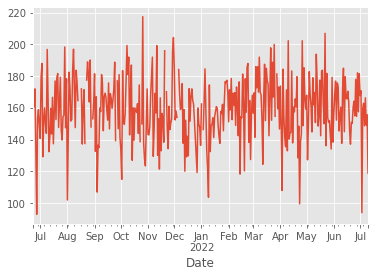

In [176]:
Syr_df['Leadtext'].str.len().resample('D').mean().plot() 

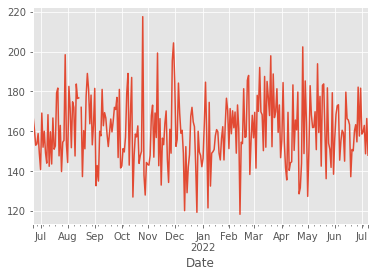

In [177]:
Syr_df['Leadtext'].str.len().resample('B').mean().plot() 

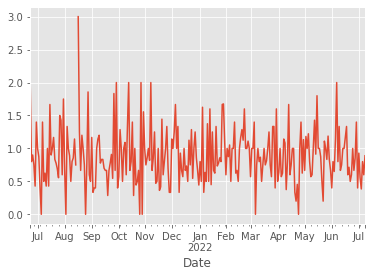

In [178]:
Syr_df['positivity'].resample('B').mean().plot() 

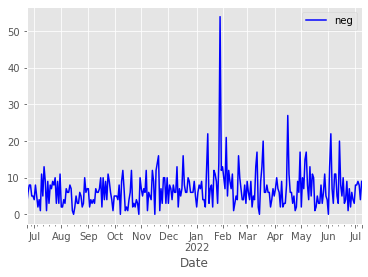

In [179]:
Syr_df['negative'].resample('B').sum().plot(color = 'b',label = 'neg').legend() 

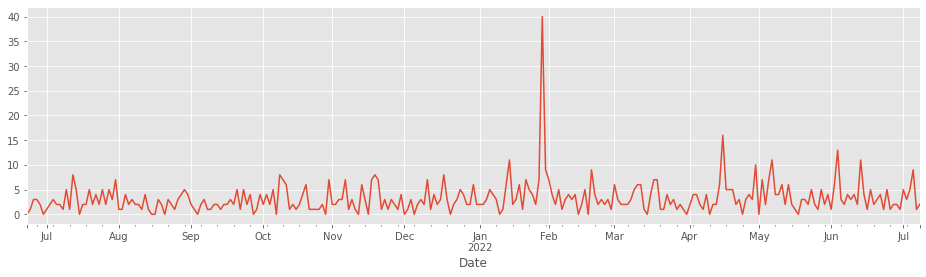

In [180]:
Syr_df['anger'].resample('B').sum().plot(figsize=(16,4))

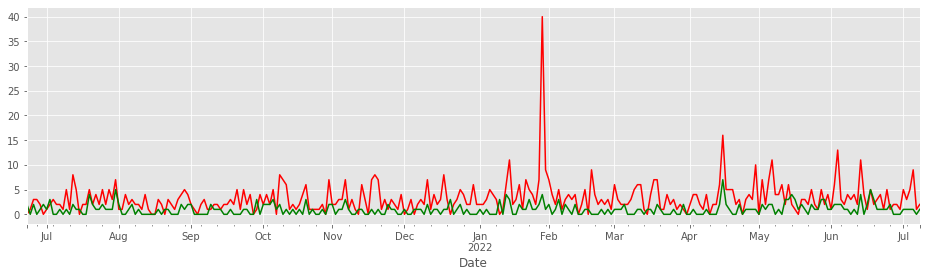

In [181]:
ax = Syr_df['anger'].resample('B').sum().plot(figsize=(16,4), color = 'red')
Syr_df['joy'].resample('B').sum().plot(figsize=(16,4), ax = ax, color = 'green')

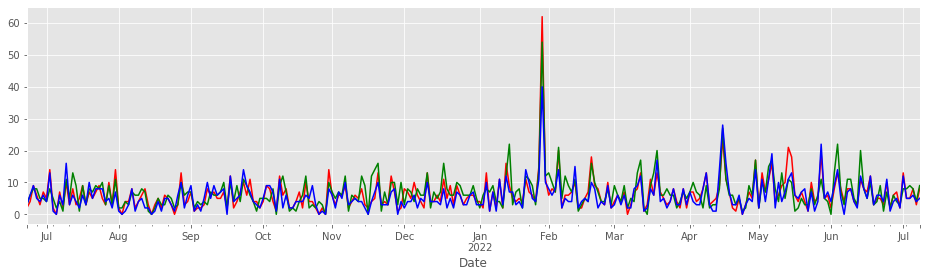

In [182]:
ax = Syr_df['positivity'].resample('B').sum().plot(figsize=(16,4), color = 'red')
Syr_df['negative'].resample('B').sum().plot(figsize=(16,4), ax = ax, color = 'green')
Syr_df['trust'].resample('B').sum().plot(figsize=(16,4), ax = ax, color = 'blue')

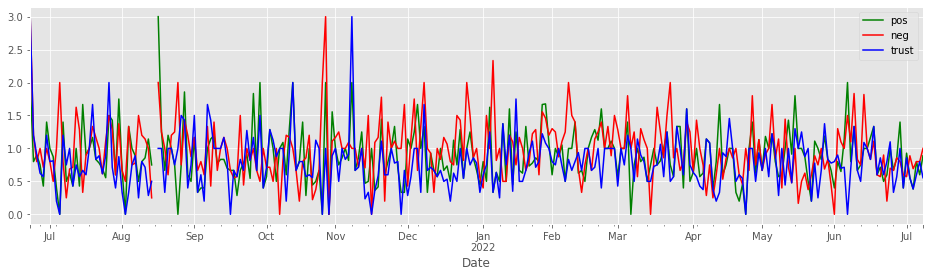

In [183]:
ax = Syr_df['positivity'].resample('B').mean().plot(figsize=(16,4), 
                                                          color = 'g', label='pos')
Syr_df['negative'].resample('B').mean().plot(figsize=(16,4), ax = ax, 
                                                   label = 'neg', color = 'r')
Syr_df['trust'].resample('B').mean().plot(figsize=(16,4), ax = ax, 
                                                label = 'trust',color = 'blue').legend()

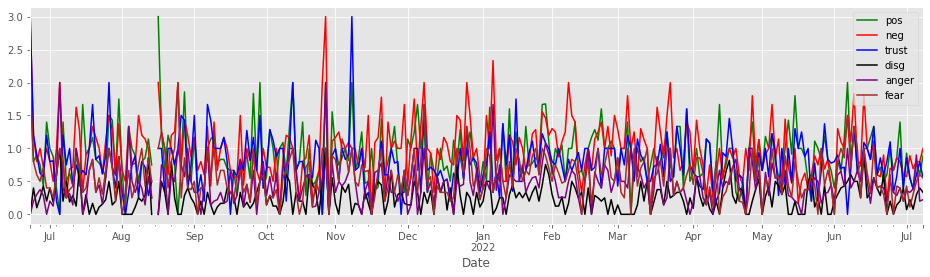

In [184]:
plt.style.use('ggplot')
ax = Syr_df['positivity'].resample('B').mean().plot(figsize=(16,4), 
                                                          color = 'g', label='pos')
Syr_df['negative'].resample('B').mean().plot(figsize=(16,4), ax = ax, 
                                                   label = 'neg', color = 'r')
Syr_df['trust'].resample('B').mean().plot(figsize=(16,4), ax = ax, 
                                                label = 'trust',color = 'blue').legend()

Syr_df['disgust'].resample('B').mean().plot(figsize=(16,4), ax = ax, 
                                                label = 'disg',color = 'black').legend() 

Syr_df['anger'].resample('B').mean().plot(figsize=(16,4), ax = ax, 
                                                label = 'anger',color = 'purple').legend() 

Syr_df['fear'].resample('B').mean().plot(figsize=(16,4), ax = ax, 
                                                label = 'fear',color = 'brown').legend()    

Text(0, 0.5, 'Years')

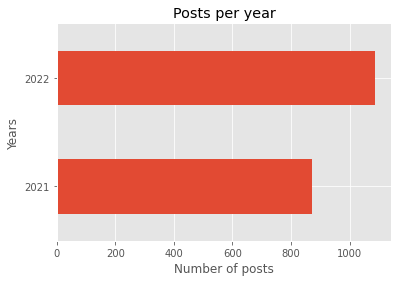

In [185]:
Syr_df['Leadtext'].groupby(by=Syr_df.index.year).count().plot(kind='barh')
plt.title("Posts per year")
plt.xlabel("Number of posts")
plt.ylabel("Years")

Text(0, 0.5, 'Hour of the day')

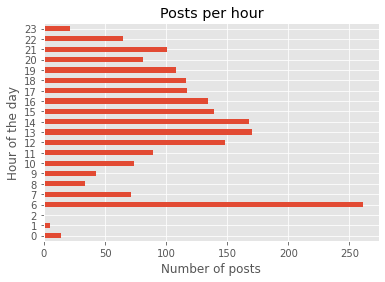

In [186]:
Syr_df['Leadtext'].groupby(by=Syr_df.index.hour).count().plot(kind='barh')
plt.title("Posts per hour")
plt.xlabel("Number of posts")
plt.ylabel("Hour of the day")

Text(0, 0.5, 'Months')

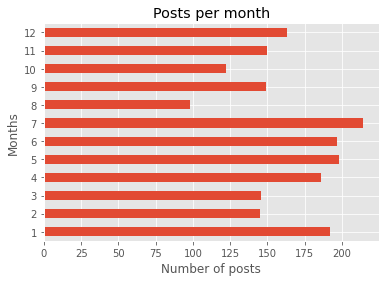

In [187]:
Syr_df['Leadtext'].groupby(by=Syr_df.index.month).count().plot(kind='barh')
plt.title("Posts per month")
plt.xlabel("Number of posts")
plt.ylabel("Months")

In [188]:
Syr_df

Unnamed: 0  \
Date                              
2022-07-09 17:19:00           0   
2022-07-09 09:35:00           1   
2022-07-09 08:17:00           2   
2022-07-08 21:19:00           3   
2022-07-08 17:06:00           4   
...                         ...   
2021-06-24 16:47:00        1955   
2021-06-24 14:22:00        1956   
2021-06-24 11:59:00        1957   
2021-06-24 11:01:00        1958   
2021-06-23 21:38:00        1959   

                                                                 Title  \
Date                                                                     
2022-07-09 17:19:00  Ικαρία: Καταγγελίες για δραματικές ελλείψεις σ...   
2022-07-09 09:35:00  ΣΥΡΙΖΑ: "Πολιτογράφηση πολίτη του ψευδοκράτους...   
2022-07-09 08:17:00  Μια ανασκόπηση όσων διαδραματίστηκαν την εβδομ...   
2022-07-08 21:19:00  Τσίπρας από Ικαρία: "Να απαλλαγούμε από το ζόφ...   
2022-07-08 17:06:00  Κώστας Καραμανλής: "Διορθώνουμε την προβληματι...   
...                                                                ...   
2021-06-24 16:47:00  Τσίπρας στο PES: Σαν να μην μάθαμε τίποτα από ...   
2021-06-24 14:22:00  Τσίπρας στο PES: Αγωνιζόμαστε για μια Ευρώπη μ...   
2021-06-24 11:59:00  Οι Ευρωβουλευτές της ΝΔ ψήφισαν κατά των αμβλώ...   
2021-06-24 11:01:00  Σπίρτζης: "Να σταματήσει η χρησιμοποίηση της Ε...   
2021-06-23 21:38:00  Κατρούγκαλος για Συμφωνία Πρεσπών: "Η καθυστέρ...   

                                  Datetime  \
Date                                         
2022-07-09 17:19:00  09 Ιουλίου 2022 17:19   
2022-07-09 09:35:00  09 Ιουλίου 2022 09:35   
2022-07-09 08:17:00  09 Ιουλίου 2022 08:17   
2022-07-08 21:19:00  08 Ιουλίου 2022 21:19   
2022-07-08 17:06:00  08 Ιουλίου 2022 17:06   
...                                    ...   
2021-06-24 16:47:00  24 Ιουνίου 2021 16:47   
2021-06-24 14:22:00  24 Ιουνίου 2021 14:22   
2021-06-24 11:59:00  24 Ιουνίου 2021 11:59   
2021-06-24 11:01:00  24 Ιουνίου 2021 11:01   
2021-06-23 21:38:00  23 Ιουνίου 2021 21:38   

                                                                  Href  \
Date                                                                     
2022-07-09 17:19:00  https://www.news247.gr/politiki/ikaria-katagge...   
2022-07-09 09:35:00  https://www.news247.gr/politiki/syriza-politog...   
2022-07-09 08:17:00  https://www.news247.gr/politiki/mia-anaskopisi...   
2022-07-08 21:19:00  https://www.news247.gr/politiki/tsipras-apo-ik...   
2022-07-08 17:06:00  https://www.news247.gr/politiki/kostas-karaman...   
...                                                                ...   
2021-06-24 16:47:00  https://www.news247.gr/politiki/tsipras-sto-pe...   
2021-06-24 14:22:00  https://www.news247.gr/politiki/tsipras-sto-pe...   
2021-06-24 11:59:00  https://www.news247.gr/politiki/oi-eyrovoyleyt...   
2021-06-24 11:01:00  https://www.news247.gr/politiki/spirtzis-na-st...   
2021-06-23 21:38:00  https://www.news247.gr/politiki/katroygkalos-g...   

                                                              Leadtext  \
Date                                                                     
2022-07-09 17:19:00  Απουσία παθολόγου και αναισθησιολόγου κατήγγει...   
2022-07-09 09:35:00  "Πολιτικό απατεώνα" χαρακτηρίζει ο ΣΥΡΙΖΑ τον ...   
2022-07-09 08:17:00  Ποια καίρια ζητήματα έθιξαν τα κόμματα αυτή τη...   
2022-07-08 21:19:00  Νέα επίθεση του προέδρου του ΣΥΡΙΖΑ στον πρωθυ...   
2022-07-08 17:06:00  Με τη νέα σύμβαση με ΤΡΑΙΝΟΣΕ, επιστρέφουν 453...   
...                                                                ...   
2021-06-24 16:47:00  Κατά της επιστροφής στην "δημοσιονομική ορθοδο...   
2021-06-24 14:22:00  Οφείλουμε να μην αφήσουμε τις συντηρητικές δυν...   
2021-06-24 11:59:00  Η κοινοβουλευτική ομάδα της ΝΔ ψήφισε στην Ευρ...   
2021-06-24 11:01:00  Αιχμές κατά της ΕΛΑΣ αφήνει ο Χρήστος Σπίρτζης...   
2021-06-23 21:38:00  "Η Κυβέρνηση πρέπει να παρακολουθεί στενά την ...   

                                   Tag  Year    Month  Day   Time  anger  \
D

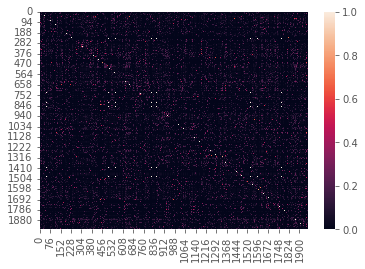

In [189]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

ax = sns.heatmap(arr)

# NDdf - Syrdf

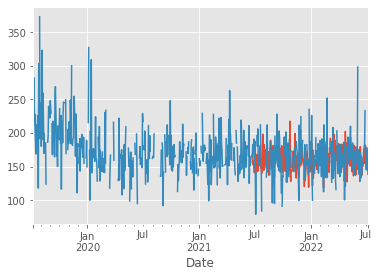

In [190]:
Syr_df['Leadtext'].str.len().resample('B').mean().plot() 
Nd_df['Leadtext'].str.len().resample('B').mean().plot() 

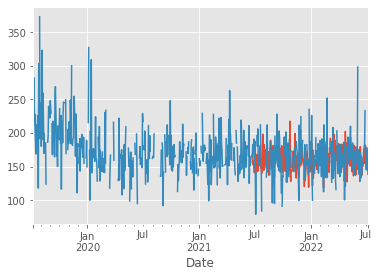

In [191]:
Syr_df['Leadtext'].str.len().resample('B').mean().plot() 
Nd_df['Leadtext'].str.len().resample('B').mean().plot() 

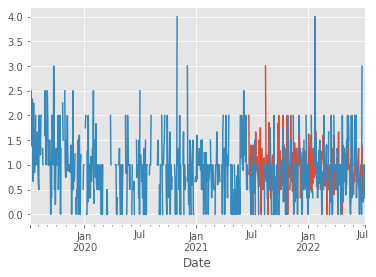

In [192]:
Syr_df['positivity'].resample('B').mean().plot() 
Nd_df['positivity'].resample('B').mean().plot() 

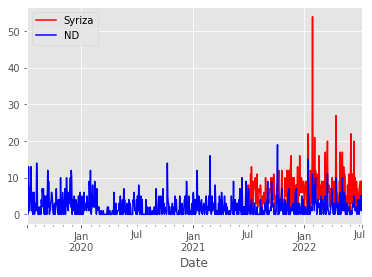

In [193]:
Syr_df['negative'].resample('B').sum().plot(color = 'r',label = 'Syriza').legend() 
Nd_df['negative'].resample('B').sum().plot(color = 'b',label = 'ND').legend() 

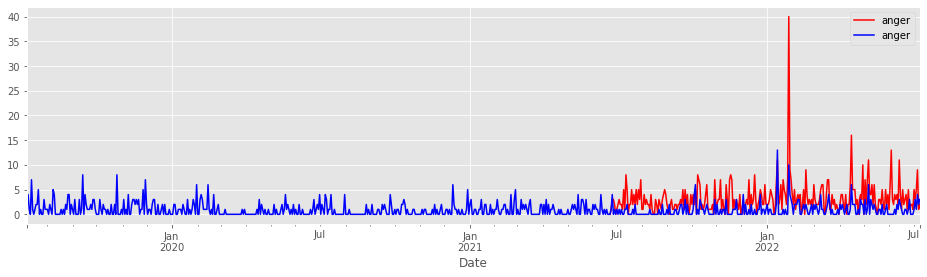

In [194]:
Syr_df['anger'].resample('B').sum().plot(figsize=(16,4), color = 'red').legend() 
Nd_df['anger'].resample('B').sum().plot(figsize=(16,4), color = 'blue').legend()

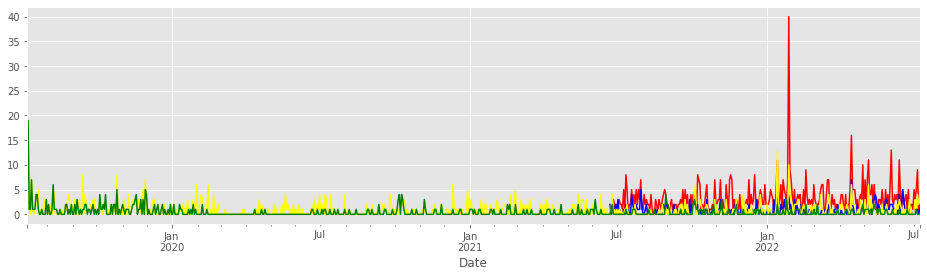

In [195]:
ax = Syr_df['anger'].resample('B').sum().plot(figsize=(16,4), color = 'red')
Syr_df['joy'].resample('B').sum().plot(figsize=(16,4), ax = ax, color = 'blue')
ax = Nd_df['anger'].resample('B').sum().plot(figsize=(16,4), color = 'yellow')
Nd_df['joy'].resample('B').sum().plot(figsize=(16,4), ax = ax, color = 'green')

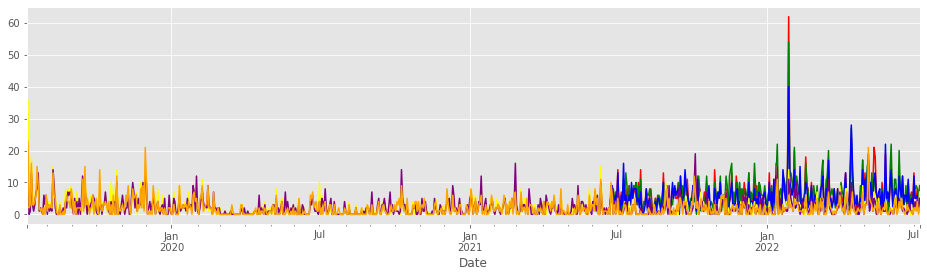

In [196]:
ax = Syr_df['positivity'].resample('B').sum().plot(figsize=(16,4), color = 'red')
Syr_df['negative'].resample('B').sum().plot(figsize=(16,4), ax = ax, color = 'green')
Syr_df['trust'].resample('B').sum().plot(figsize=(16,4), ax = ax, color = 'blue')
ax = Nd_df['positivity'].resample('B').sum().plot(figsize=(16,4), color = 'yellow')
Nd_df['negative'].resample('B').sum().plot(figsize=(16,4), ax = ax, color = 'purple')
Nd_df['trust'].resample('B').sum().plot(figsize=(16,4), ax = ax, color = 'orange')

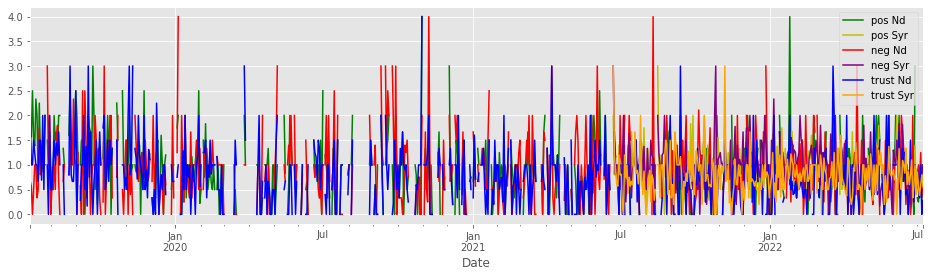

In [197]:
ax = Nd_df['positivity'].resample('B').mean().plot(figsize=(16,4), 
                                                          color = 'g', label='pos Nd')
ax = Syr_df['positivity'].resample('B').mean().plot(figsize=(16,4), 
                                                          color = 'y', label='pos Syr')
Nd_df['negative'].resample('B').mean().plot(figsize=(16,4), ax = ax, 
                                                   label = 'neg Nd', color = 'r')
Syr_df['negative'].resample('B').mean().plot(figsize=(16,4), ax = ax, 
                                                   label = 'neg Syr', color = 'purple')
Nd_df['trust'].resample('B').mean().plot(figsize=(16,4), ax = ax, 
                                                label = 'trust Nd',color = 'blue').legend()
Syr_df['trust'].resample('B').mean().plot(figsize=(16,4), ax = ax, 
                                                label = 'trust Syr',color = 'orange').legend()

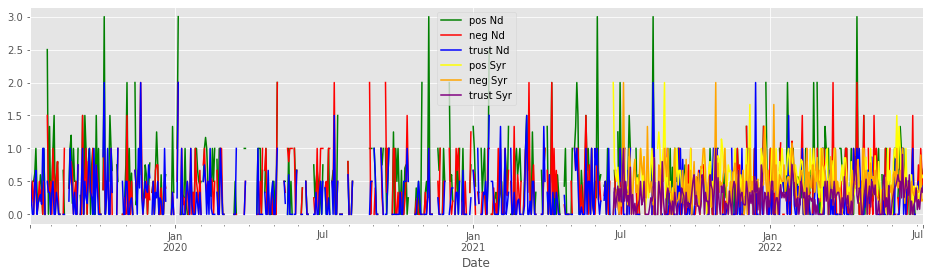

In [198]:
plt.style.use('ggplot')
ax = Nd_df['fear'].resample('B').mean().plot(figsize=(16,4), 
                                                          color = 'g', label='pos Nd')
Nd_df['anger'].resample('B').mean().plot(figsize=(16,4), ax = ax, 
                                                   label = 'neg Nd', color = 'r')
Nd_df['disgust'].resample('B').mean().plot(figsize=(16,4), ax = ax, 
                                                label = 'trust Nd',color = 'blue').legend()    
Syr_df['fear'].resample('B').mean().plot(figsize=(16,4), 
                                                          color = 'yellow', label='pos Syr')
Syr_df['anger'].resample('B').mean().plot(figsize=(16,4), ax = ax, 
                                                   label = 'neg Syr', color = 'orange')
Syr_df['disgust'].resample('B').mean().plot(figsize=(16,4), ax = ax, 
                                                label = 'trust Syr',color = 'purple').legend()                                                